In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aus-head-gaze-affecnet-for-edaic/AffectNet-Extract Feature by OpenFace (AUs Head Gaze for EDAIC).csv
/kaggle/input/aus-head-gaze-affecnet-for-edaic/AffectNet val set-Extract Feature by OpenFace (AUs Head Gaze for EDAIC).csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_013.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_008.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_003.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_020.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_018.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_021.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_026.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_019.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_017.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segment/335_P/335_segment_025.csv
/kaggle/input/edaic-aus-pose-gaze-30s-segm

2025-12-10 06:19:28.323168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765347568.489903      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765347568.536430      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Multi-Stream DNN for Valence & Arousal (AU + Gaze + Head Pose)
Dataset shape: (275912, 715)
Columns: ['index', 'valence', 'arousal', 'file_name', 'face', 'confidence', 'gaze_0_x', 'gaze_0_y', 'gaze_0_z', 'gaze_1_x']...

=== Feature Groups ===
aus: 35 features
gaze: 8 features
head_pose: 6 features

Train samples: 193138
Val samples: 41387
Test samples: 41387

=== Input Dimensions ===
aus: 35
gaze: 8
head_pose: 6

=== Building Model ===


I0000 00:00:1765347608.996326      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765347608.996909      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "MultiStream_DNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_aus           │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_gaze          │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_head_pose     │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aus_dense1 (Dense)  │ (None, 128)       │      4,608 │ input_aus[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gaze_dense1 (Dense) │ (None, 64)        │        576 │ input_gaze[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_pose_dense1    │ (None, 32)        │        224 │ input_head_pose[… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aus_bn1             │ (None, 128)       │        512 │ aus_dense1[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gaze_bn1            │ (None, 64)        │        256 │ gaze_dense1[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_pose_bn1       │ (None, 32)        │        128 │ head_pose_dense1… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aus_dropout1        │ (None, 128)       │          0 │ aus_bn1[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gaze_dropout1       │ (None, 64)        │          0 │ gaze_bn1[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_pose_dropout1  │ (None, 32)        │          0 │ head_pose_bn1[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aus_dense2 (Dense)  │ (None, 64)        │      8,256 │ aus_dropout1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gaze_dense2 (Dense) │ (None, 32)        │      2,080 │ gaze_dropout1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_pose_dense2    │ (None, 16)        │        528 │ head_pose_dropou… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aus_bn2             │ (None, 64)        │        256 │ aus_dense2[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gaze_bn2            │ (None, 32)        │        128 │ gaze_dense2[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head_pose_bn2       │ (None, 16)        │         64 │ head_pose_dense2… │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 41,234 (161.07 KB)

 Trainable params: 40,178 (156.95 KB)

 Non-trainable params: 1,056 (4.12 KB)


=== Preparing Data ===

=== Training Model ===
Epoch 1/100


I0000 00:00:1765347618.282818      64 service.cc:148] XLA service 0x42bb87c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765347618.283227      64 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765347618.283249      64 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765347619.068076      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


  45/6036 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - concordance_correlation_coefficient: 0.0233 - loss: 3.0053 - mae: 1.3595

I0000 00:00:1765347624.376837      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6036/6036 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - concordance_correlation_coefficient: 0.2293 - loss: 0.4076 - mae: 0.4220 - val_concordance_correlation_coefficient: 0.4402 - val_loss: 0.1073 - val_mae: 0.2390 - learning_rate: 0.0010
Epoch 2/100
6036/6036 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - concordance_correlation_coefficient: 0.3945 - loss: 0.1155 - mae: 0.2530 - val_concordance_correlation_coefficient: 0.4606 - val_loss: 0.1050 - val_mae: 0.2360 - learning_rate: 0.0010
Epoch 3/100
6036/6036 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - concordance_correlation_coefficient: 0.4125 - loss: 0.1125 - mae: 0.2491 - val_concordance_correlation_coefficient: 0.4582 - val_loss: 0.1041 - val_mae: 0.2353 - learning_rate: 0.0010
Epoch 4/100
6036/6036 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - concordance_correlation_coefficient: 0.4208 - loss: 0.1110 - mae: 0.2471 - val_concordance_correlation_coefficient: 0.4606 - val_loss: 0.1032 - val_mae: 0.2355 - learning_rate: 0.0010
Epoch 5/100
6036/6036 ━━━━━━━━━━━━━━━━━━━━ 2

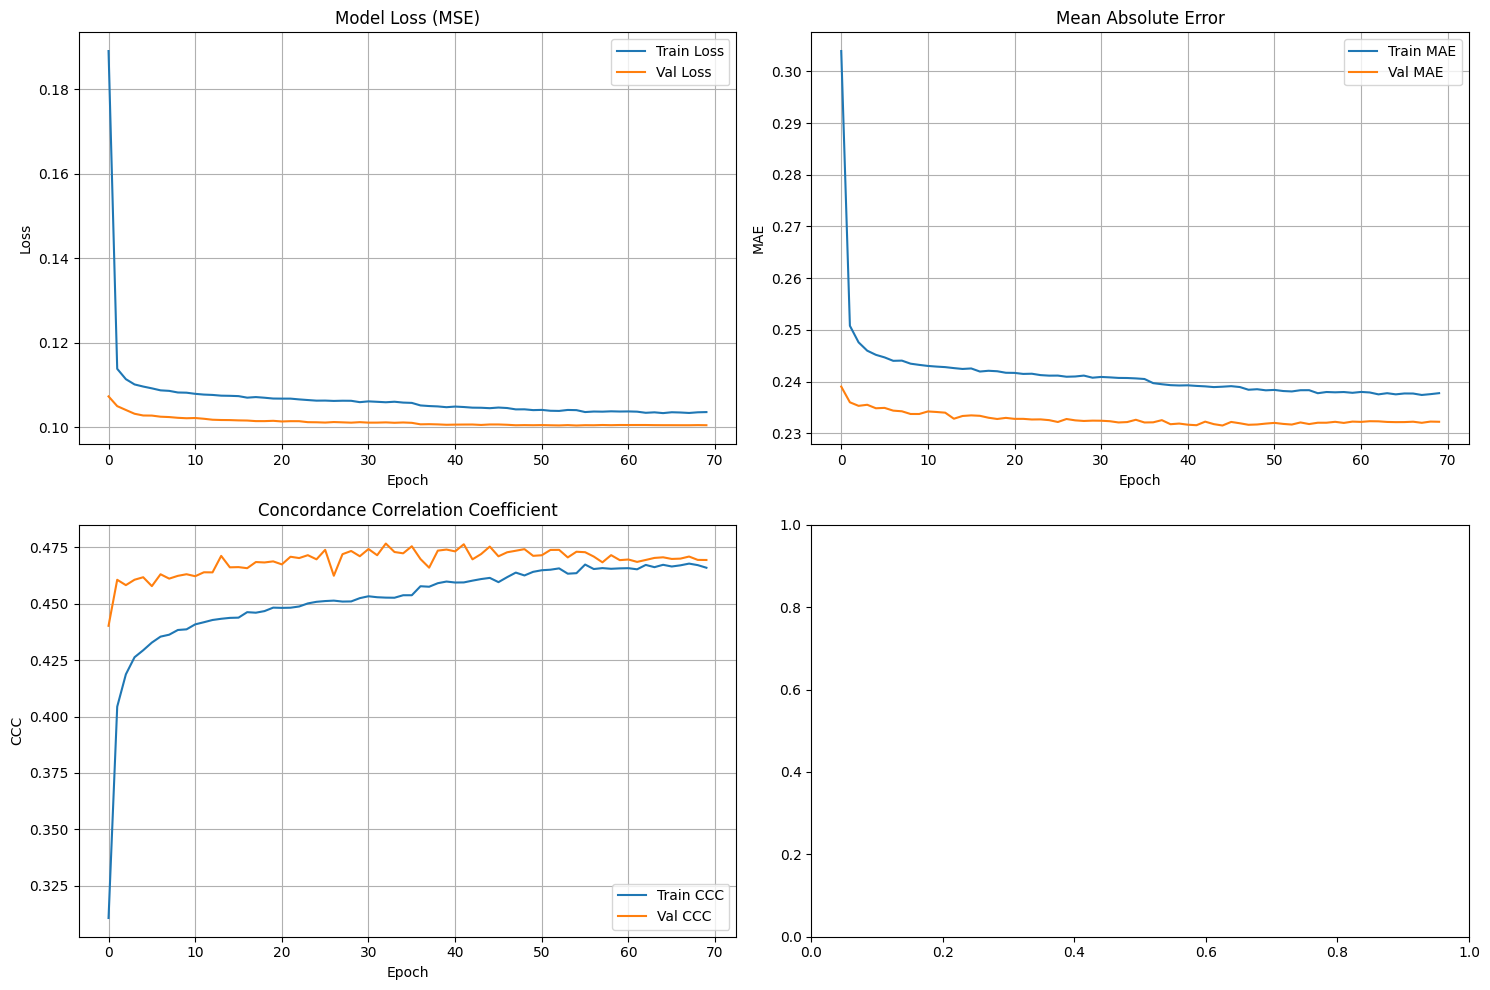


=== Evaluating on Test Set ===

TEST SET RESULTS

Overall Metrics:
  MAE:  0.2336
  RMSE: 0.3194
  CORR: 0.5676
  CCC:  0.4842
  SAGR: 70.70%

Valence Metrics:
  MAE:  0.2679
  RMSE: 0.3581
  CORR: 0.7256
  CCC:  0.6868
  SAGR: 77.53%

Arousal Metrics:
  MAE:  0.1993
  RMSE: 0.2753
  CORR: 0.4095
  CCC:  0.2816
  SAGR: 63.86%
Saved: predictions_scatter.png


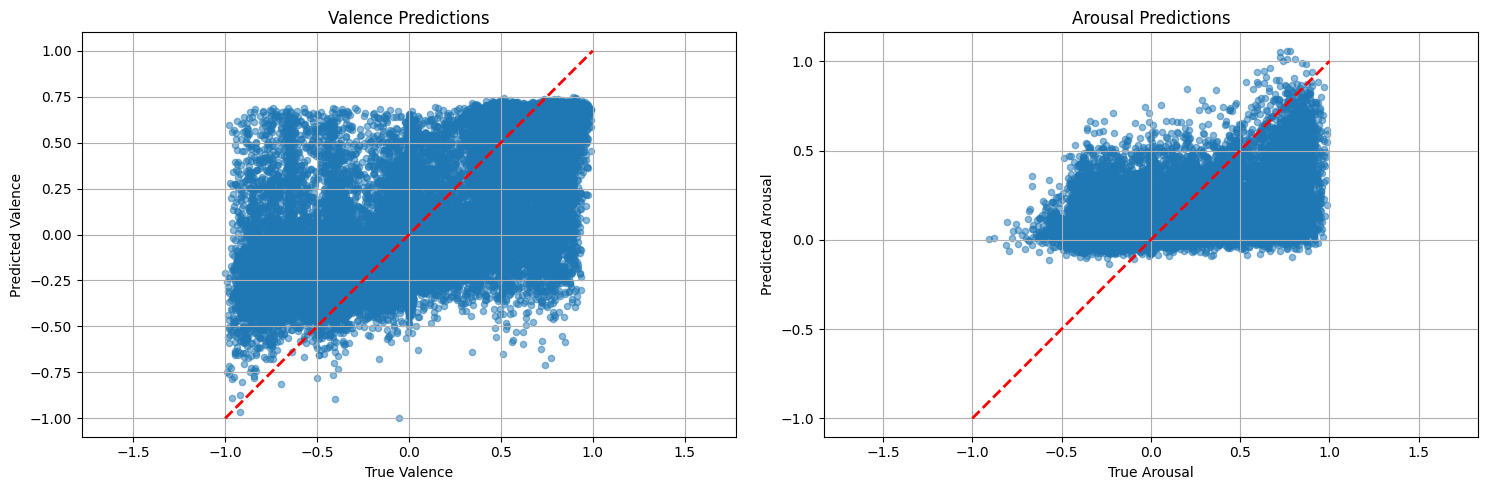

Saved: metrics_table.png


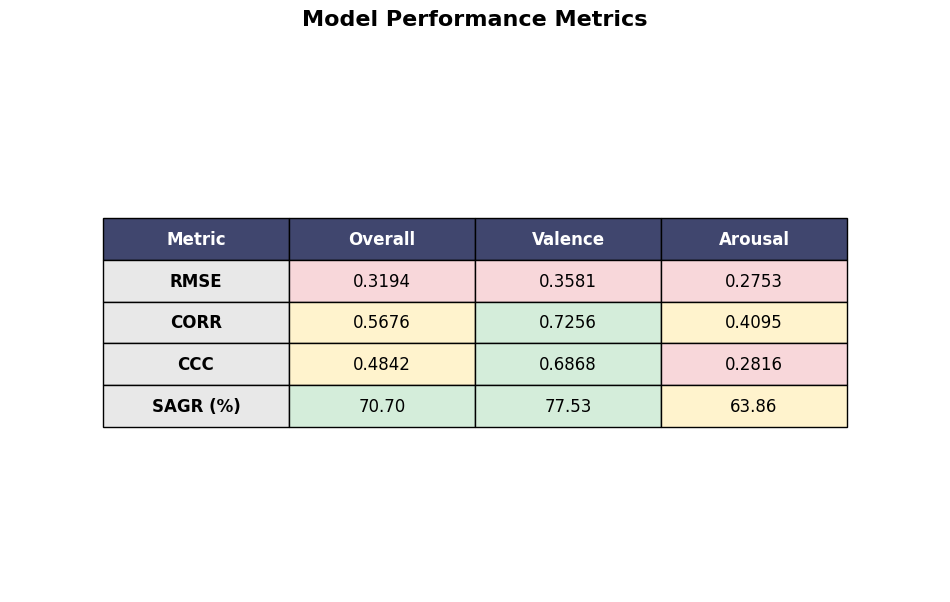


Model saved: multistream_dnn_3features.h5
Scalers saved: scalers.pkl


In [2]:
"""
Multi-Stream Deep Neural Network for Valence & Arousal Prediction
Author: Generated for AffectNet Dataset
Modified: Using only AU, Gaze, and Head Pose features
Metrics: MAE, RMSE, Correlation, CCC, SAGR
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


class MultiStreamDNN:
    """
    Multi-Stream Deep Neural Network for emotion prediction
    Separate streams for AU, Gaze, and Head Pose features
    """
    
    def __init__(self, input_dims, learning_rate=0.001):
        """
        Args:
            input_dims: dict with keys ['aus', 'gaze', 'head_pose']
            learning_rate: learning rate for optimizer
        """
        self.input_dims = input_dims
        self.learning_rate = learning_rate
        self.model = None
        self.history = None
        self.scalers = {}
        
    def build_model(self):
        """Build the multi-stream architecture"""
        
        # Define inputs for each stream
        input_aus = layers.Input(shape=(self.input_dims['aus'],), name='input_aus')
        input_gaze = layers.Input(shape=(self.input_dims['gaze'],), name='input_gaze')
        input_head_pose = layers.Input(shape=(self.input_dims['head_pose'],), name='input_head_pose')
        
        # Stream 1: Action Units
        aus_stream = layers.Dense(128, activation='relu', name='aus_dense1')(input_aus)
        aus_stream = layers.BatchNormalization(name='aus_bn1')(aus_stream)
        aus_stream = layers.Dropout(0.3, name='aus_dropout1')(aus_stream)
        aus_stream = layers.Dense(64, activation='relu', name='aus_dense2')(aus_stream)
        aus_stream = layers.BatchNormalization(name='aus_bn2')(aus_stream)
        aus_stream = layers.Dropout(0.3, name='aus_dropout2')(aus_stream)
        
        # Stream 2: Gaze
        gaze_stream = layers.Dense(64, activation='relu', name='gaze_dense1')(input_gaze)
        gaze_stream = layers.BatchNormalization(name='gaze_bn1')(gaze_stream)
        gaze_stream = layers.Dropout(0.3, name='gaze_dropout1')(gaze_stream)
        gaze_stream = layers.Dense(32, activation='relu', name='gaze_dense2')(gaze_stream)
        gaze_stream = layers.BatchNormalization(name='gaze_bn2')(gaze_stream)
        gaze_stream = layers.Dropout(0.3, name='gaze_dropout2')(gaze_stream)
        
        # Stream 3: Head Pose
        head_pose_stream = layers.Dense(32, activation='relu', name='head_pose_dense1')(input_head_pose)
        head_pose_stream = layers.BatchNormalization(name='head_pose_bn1')(head_pose_stream)
        head_pose_stream = layers.Dropout(0.3, name='head_pose_dropout1')(head_pose_stream)
        head_pose_stream = layers.Dense(16, activation='relu', name='head_pose_dense2')(head_pose_stream)
        head_pose_stream = layers.BatchNormalization(name='head_pose_bn2')(head_pose_stream)
        head_pose_stream = layers.Dropout(0.3, name='head_pose_dropout2')(head_pose_stream)
        
        # Concatenate all streams
        concatenated = layers.Concatenate(name='concatenate')([
            aus_stream, gaze_stream, head_pose_stream
        ])
        
        # Fusion layers
        fusion = layers.Dense(128, activation='relu', name='fusion_dense1')(concatenated)
        fusion = layers.BatchNormalization(name='fusion_bn1')(fusion)
        fusion = layers.Dropout(0.4, name='fusion_dropout1')(fusion)
        
        fusion = layers.Dense(64, activation='relu', name='fusion_dense2')(fusion)
        fusion = layers.BatchNormalization(name='fusion_bn2')(fusion)
        fusion = layers.Dropout(0.4, name='fusion_dropout2')(fusion)
        
        # Output layer
        output = layers.Dense(2, activation='linear', name='output')(fusion)
        
        # Create model
        self.model = models.Model(
            inputs=[input_aus, input_gaze, input_head_pose],
            outputs=output,
            name='MultiStream_DNN'
        )
        
        # Compile model
        self.model.compile(
            optimizer=Adam(learning_rate=self.learning_rate),
            loss='mse',
            metrics=['mae', self.concordance_correlation_coefficient]
        )
        
        return self.model
    
    @staticmethod
    def concordance_correlation_coefficient(y_true, y_pred):
        """CCC metric - better for regression tasks"""
        mean_true = tf.reduce_mean(y_true, axis=0)
        mean_pred = tf.reduce_mean(y_pred, axis=0)
        
        var_true = tf.reduce_mean(tf.square(y_true - mean_true), axis=0)
        var_pred = tf.reduce_mean(tf.square(y_pred - mean_pred), axis=0)
        
        covar = tf.reduce_mean((y_true - mean_true) * (y_pred - mean_pred), axis=0)
        
        ccc = (2.0 * covar) / (var_true + var_pred + tf.square(mean_true - mean_pred) + 1e-10)
        
        return tf.reduce_mean(ccc)
    
    def prepare_data(self, df, feature_columns):
        """
        Prepare and normalize data for training
        
        Args:
            df: DataFrame with all features
            feature_columns: dict with keys ['aus', 'gaze', 'head_pose']
        
        Returns:
            Dictionary of normalized feature arrays
        """
        data = {}
        
        for stream_name, cols in feature_columns.items():
            # Extract features
            X = df[cols].values
            
            # Normalize
            if stream_name not in self.scalers:
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X)
                self.scalers[stream_name] = scaler
            else:
                X_scaled = self.scalers[stream_name].transform(X)
            
            data[stream_name] = X_scaled
        
        return data
    
    def train(self, X_train, y_train, X_val, y_val, 
              epochs=100, batch_size=32, verbose=1):
        """
        Train the model
        
        Args:
            X_train: dict of training features for each stream
            y_train: training labels (valence, arousal)
            X_val: dict of validation features
            y_val: validation labels
            epochs: number of epochs
            batch_size: batch size
            verbose: verbosity level
        """
        
        # Callbacks
        early_stop = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=1
        )
        
        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-7,
            verbose=1
        )
        
        # Train
        self.history = self.model.fit(
            [X_train['aus'], X_train['gaze'], X_train['head_pose']],
            y_train,
            validation_data=(
                [X_val['aus'], X_val['gaze'], X_val['head_pose']],
                y_val
            ),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stop, reduce_lr],
            verbose=verbose
        )
        
        return self.history
    
    def predict(self, X):
        """
        Make predictions
        
        Args:
            X: dict of features for each stream
        
        Returns:
            predictions: array of shape (n_samples, 2) for valence and arousal
        """
        predictions = self.model.predict(
            [X['aus'], X['gaze'], X['head_pose']],
            verbose=0
        )
        return predictions
    
    def evaluate(self, X, y_true):
        """
        Evaluate model performance
        
        Args:
            X: dict of features
            y_true: true labels
        
        Returns:
            dict with evaluation metrics
        """
        y_pred = self.predict(X)
        
        # Overall metrics
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        
        # Per-dimension metrics
        valence_mae = mean_absolute_error(y_true[:, 0], y_pred[:, 0])
        valence_rmse = np.sqrt(mean_squared_error(y_true[:, 0], y_pred[:, 0]))
        
        arousal_mae = mean_absolute_error(y_true[:, 1], y_pred[:, 1])
        arousal_rmse = np.sqrt(mean_squared_error(y_true[:, 1], y_pred[:, 1]))
        
        # Pearson Correlation
        valence_corr = np.corrcoef(y_true[:, 0], y_pred[:, 0])[0, 1]
        arousal_corr = np.corrcoef(y_true[:, 1], y_pred[:, 1])[0, 1]
        overall_corr = (valence_corr + arousal_corr) / 2
        
        # CCC calculation
        def calculate_ccc(y_true, y_pred):
            mean_true = np.mean(y_true)
            mean_pred = np.mean(y_pred)
            var_true = np.var(y_true)
            var_pred = np.var(y_pred)
            covar = np.mean((y_true - mean_true) * (y_pred - mean_pred))
            ccc = (2.0 * covar) / (var_true + var_pred + (mean_true - mean_pred)**2 + 1e-10)
            return ccc
        
        valence_ccc = calculate_ccc(y_true[:, 0], y_pred[:, 0])
        arousal_ccc = calculate_ccc(y_true[:, 1], y_pred[:, 1])
        overall_ccc = (valence_ccc + arousal_ccc) / 2
        
        # SAGR (Sign Agreement) calculation
        def calculate_sagr(y_true, y_pred):
            """
            Sign Agreement Rate: percentage of predictions with correct sign
            """
            sign_agreement = np.sign(y_true) == np.sign(y_pred)
            sagr = np.mean(sign_agreement) * 100  # Convert to percentage
            return sagr
        
        valence_sagr = calculate_sagr(y_true[:, 0], y_pred[:, 0])
        arousal_sagr = calculate_sagr(y_true[:, 1], y_pred[:, 1])
        overall_sagr = (valence_sagr + arousal_sagr) / 2
        
        metrics = {
            'overall_mae': mae,
            'overall_rmse': rmse,
            'overall_corr': overall_corr,
            'overall_ccc': overall_ccc,
            'overall_sagr': overall_sagr,
            'valence_mae': valence_mae,
            'valence_rmse': valence_rmse,
            'valence_corr': valence_corr,
            'valence_ccc': valence_ccc,
            'valence_sagr': valence_sagr,
            'arousal_mae': arousal_mae,
            'arousal_rmse': arousal_rmse,
            'arousal_corr': arousal_corr,
            'arousal_ccc': arousal_ccc,
            'arousal_sagr': arousal_sagr
        }
        
        return metrics, y_pred


def load_and_prepare_data(file_path):
    """
    Load CSV and identify feature columns
    
    Args:
        file_path: path to CSV file
    
    Returns:
        df: DataFrame
        feature_columns: dict of column names for each stream
    """
    # Load data
    df = pd.read_csv(file_path)
    
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()[:10]}...")  # Show first 10
    
    # Identify feature columns
    all_cols = df.columns.tolist()
    
    # Target columns
    target_cols = ['valence', 'arousal']
    
    # Feature groups - only AU, Gaze, and Head Pose
    gaze_cols = [col for col in all_cols if col.startswith('gaze_')]
    head_pose_cols = [col for col in all_cols if col.startswith('pose_')]
    au_cols = [col for col in all_cols if col.startswith('AU')]
    
    feature_columns = {
        'aus': au_cols,
        'gaze': gaze_cols,
        'head_pose': head_pose_cols
    }
    
    # Print info
    print("\n=== Feature Groups ===")
    for stream, cols in feature_columns.items():
        print(f"{stream}: {len(cols)} features")
    
    return df, feature_columns, target_cols


def plot_training_history(history):
    """Plot training history"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Train Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
    axes[0, 0].set_title('Model Loss (MSE)')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # MAE
    axes[0, 1].plot(history.history['mae'], label='Train MAE')
    axes[0, 1].plot(history.history['val_mae'], label='Val MAE')
    axes[0, 1].set_title('Mean Absolute Error')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('MAE')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # CCC
    axes[1, 0].plot(history.history['concordance_correlation_coefficient'], 
                    label='Train CCC')
    axes[1, 0].plot(history.history['val_concordance_correlation_coefficient'], 
                    label='Val CCC')
    axes[1, 0].set_title('Concordance Correlation Coefficient')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('CCC')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Learning rate (if available)
    if 'lr' in history.history:
        axes[1, 1].plot(history.history['lr'])
        axes[1, 1].set_title('Learning Rate')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('LR')
        axes[1, 1].set_yscale('log')
        axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    print("Saved: training_history.png")
    plt.show()


def plot_predictions(y_true, y_pred):
    """Plot predictions vs true values"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Valence
    axes[0].scatter(y_true[:, 0], y_pred[:, 0], alpha=0.5, s=20)
    axes[0].plot([-1, 1], [-1, 1], 'r--', lw=2)
    axes[0].set_xlabel('True Valence')
    axes[0].set_ylabel('Predicted Valence')
    axes[0].set_title('Valence Predictions')
    axes[0].grid(True)
    axes[0].axis('equal')
    
    # Arousal
    axes[1].scatter(y_true[:, 1], y_pred[:, 1], alpha=0.5, s=20)
    axes[1].plot([-1, 1], [-1, 1], 'r--', lw=2)
    axes[1].set_xlabel('True Arousal')
    axes[1].set_ylabel('Predicted Arousal')
    axes[1].set_title('Arousal Predictions')
    axes[1].grid(True)
    axes[1].axis('equal')
    
    plt.tight_layout()
    plt.savefig('predictions_scatter.png', dpi=300, bbox_inches='tight')
    print("Saved: predictions_scatter.png")
    plt.show()


def plot_metrics_comparison(metrics):
    """Plot metrics comparison in a beautiful table format"""
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.axis('tight')
    ax.axis('off')
    
    # Prepare data for table
    table_data = [
        ['Metric', 'Overall', 'Valence', 'Arousal'],
        ['RMSE', f"{metrics['overall_rmse']:.4f}", 
         f"{metrics['valence_rmse']:.4f}", f"{metrics['arousal_rmse']:.4f}"],
        ['CORR', f"{metrics['overall_corr']:.4f}", 
         f"{metrics['valence_corr']:.4f}", f"{metrics['arousal_corr']:.4f}"],
        ['CCC', f"{metrics['overall_ccc']:.4f}", 
         f"{metrics['valence_ccc']:.4f}", f"{metrics['arousal_ccc']:.4f}"],
        ['SAGR (%)', f"{metrics['overall_sagr']:.2f}", 
         f"{metrics['valence_sagr']:.2f}", f"{metrics['arousal_sagr']:.2f}"],
    ]
    
    table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                     colWidths=[0.2, 0.2, 0.2, 0.2])
    
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2.5)
    
    # Style header row
    for i in range(4):
        table[(0, i)].set_facecolor('#40466e')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Style metric column (now only 5 rows: 1-5 instead of 1-7)
    for i in range(1, 5):
        table[(i, 0)].set_facecolor('#e8e8e8')
        table[(i, 0)].set_text_props(weight='bold')
    
    # Color code values
    for i in range(1, 5):
        for j in range(1, 4):
            cell = table[(i, j)]
            value = float(cell.get_text().get_text())
            
            # For CORR and CCC, higher is better
            if i in [2, 3]:  
                if value >= 0.6:
                    cell.set_facecolor('#d4edda')
                elif value >= 0.4:
                    cell.set_facecolor('#fff3cd')
                else:
                    cell.set_facecolor('#f8d7da')
            # For SAGR, higher is better (percentage)
            elif i == 4:
                if value >= 70:
                    cell.set_facecolor('#d4edda')
                elif value >= 60:
                    cell.set_facecolor('#fff3cd')
                else:
                    cell.set_facecolor('#f8d7da')
            # For RMSE, lower is better
            elif i == 1:
                if value <= 0.15:
                    cell.set_facecolor('#d4edda')
                elif value <= 0.25:
                    cell.set_facecolor('#fff3cd')
                else:
                    cell.set_facecolor('#f8d7da')
    
    plt.title('Model Performance Metrics', fontsize=16, fontweight='bold', pad=20)
    plt.savefig('metrics_table.png', dpi=300, bbox_inches='tight')
    print("Saved: metrics_table.png")
    plt.show()


def main():
    """Main training pipeline"""
    
    print("=" * 80)
    print("Multi-Stream DNN for Valence & Arousal (AU + Gaze + Head Pose)")
    print("=" * 80)
    
    # Load data
    file_path = '/kaggle/input/aus-head-gaze-affecnet-for-edaic/AffectNet-Extract Feature by OpenFace (AUs Head Gaze for EDAIC).csv'
    df, feature_columns, target_cols = load_and_prepare_data(file_path)
    
    # Split data
    train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
    
    print(f"\nTrain samples: {len(train_df)}")
    print(f"Val samples: {len(val_df)}")
    print(f"Test samples: {len(test_df)}")
    
    # Get input dimensions
    input_dims = {
        stream: len(cols) for stream, cols in feature_columns.items()
    }
    
    print("\n=== Input Dimensions ===")
    for stream, dim in input_dims.items():
        print(f"{stream}: {dim}")
    
    # Initialize model
    print("\n=== Building Model ===")
    model = MultiStreamDNN(input_dims=input_dims, learning_rate=0.001)
    model.build_model()
    model.model.summary()
    
    # Prepare data
    print("\n=== Preparing Data ===")
    X_train = model.prepare_data(train_df, feature_columns)
    y_train = train_df[target_cols].values
    
    X_val = model.prepare_data(val_df, feature_columns)
    y_val = val_df[target_cols].values
    
    X_test = model.prepare_data(test_df, feature_columns)
    y_test = test_df[target_cols].values
    
    # Train model
    print("\n=== Training Model ===")
    history = model.train(
        X_train, y_train,
        X_val, y_val,
        epochs=100,
        batch_size=32,
        verbose=1
    )
    
    # Plot training history
    plot_training_history(history)
    
    # Evaluate on test set
    print("\n=== Evaluating on Test Set ===")
    metrics, y_pred = model.evaluate(X_test, y_test)
    
    print("\n" + "="*80)
    print("TEST SET RESULTS")
    print("="*80)
    print("\nOverall Metrics:")
    print(f"  MAE:  {metrics['overall_mae']:.4f}")
    print(f"  RMSE: {metrics['overall_rmse']:.4f}")
    print(f"  CORR: {metrics['overall_corr']:.4f}")
    print(f"  CCC:  {metrics['overall_ccc']:.4f}")
    print(f"  SAGR: {metrics['overall_sagr']:.2f}%")
    
    print("\nValence Metrics:")
    print(f"  MAE:  {metrics['valence_mae']:.4f}")
    print(f"  RMSE: {metrics['valence_rmse']:.4f}")
    print(f"  CORR: {metrics['valence_corr']:.4f}")
    print(f"  CCC:  {metrics['valence_ccc']:.4f}")
    print(f"  SAGR: {metrics['valence_sagr']:.2f}%")
    
    print("\nArousal Metrics:")
    print(f"  MAE:  {metrics['arousal_mae']:.4f}")
    print(f"  RMSE: {metrics['arousal_rmse']:.4f}")
    print(f"  CORR: {metrics['arousal_corr']:.4f}")
    print(f"  CCC:  {metrics['arousal_ccc']:.4f}")
    print(f"  SAGR: {metrics['arousal_sagr']:.2f}%")
    print("="*80)
    
    # Plot predictions
    plot_predictions(y_test, y_pred)
    
    # Plot metrics table
    plot_metrics_comparison(metrics)
    
    # Save model
    model.model.save('multistream_dnn_3features.h5')
    print("\nModel saved: multistream_dnn_3features.h5")
    
    # Save scalers for future predictions
    import pickle
    with open('scalers.pkl', 'wb') as f:
        pickle.dump(model.scalers, f)
    print("Scalers saved: scalers.pkl")
    
    return model, metrics


if __name__ == '__main__':
    model, metrics = main()

In [3]:
# """
# Multi-Stream Deep Neural Network for Valence & Arousal Prediction
# Author: Generated for AffectNet Dataset
# Modified: Using only AU, Gaze, and Head Pose features
# """

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, models, callbacks
# from tensorflow.keras.optimizers import Adam
# import warnings
# warnings.filterwarnings('ignore')

# # Set random seeds for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)


# class MultiStreamDNN:
#     """
#     Multi-Stream Deep Neural Network for emotion prediction
#     Separate streams for AU, Gaze, and Head Pose features
#     """
    
#     def __init__(self, input_dims, learning_rate=0.001):
#         """
#         Args:
#             input_dims: dict with keys ['aus', 'gaze', 'head_pose']
#             learning_rate: learning rate for optimizer
#         """
#         self.input_dims = input_dims
#         self.learning_rate = learning_rate
#         self.model = None
#         self.history = None
#         self.scalers = {}
        
#     def build_model(self):
#         """Build the multi-stream architecture"""
        
#         # Define inputs for each stream
#         input_aus = layers.Input(shape=(self.input_dims['aus'],), name='input_aus')
#         input_gaze = layers.Input(shape=(self.input_dims['gaze'],), name='input_gaze')
#         input_head_pose = layers.Input(shape=(self.input_dims['head_pose'],), name='input_head_pose')
        
#         # Stream 1: Action Units
#         aus_stream = layers.Dense(128, activation='relu', name='aus_dense1')(input_aus)
#         aus_stream = layers.BatchNormalization(name='aus_bn1')(aus_stream)
#         aus_stream = layers.Dropout(0.3, name='aus_dropout1')(aus_stream)
#         aus_stream = layers.Dense(64, activation='relu', name='aus_dense2')(aus_stream)
#         aus_stream = layers.BatchNormalization(name='aus_bn2')(aus_stream)
#         aus_stream = layers.Dropout(0.3, name='aus_dropout2')(aus_stream)
        
#         # Stream 2: Gaze
#         gaze_stream = layers.Dense(64, activation='relu', name='gaze_dense1')(input_gaze)
#         gaze_stream = layers.BatchNormalization(name='gaze_bn1')(gaze_stream)
#         gaze_stream = layers.Dropout(0.3, name='gaze_dropout1')(gaze_stream)
#         gaze_stream = layers.Dense(32, activation='relu', name='gaze_dense2')(gaze_stream)
#         gaze_stream = layers.BatchNormalization(name='gaze_bn2')(gaze_stream)
#         gaze_stream = layers.Dropout(0.3, name='gaze_dropout2')(gaze_stream)
        
#         # Stream 3: Head Pose
#         head_pose_stream = layers.Dense(32, activation='relu', name='head_pose_dense1')(input_head_pose)
#         head_pose_stream = layers.BatchNormalization(name='head_pose_bn1')(head_pose_stream)
#         head_pose_stream = layers.Dropout(0.3, name='head_pose_dropout1')(head_pose_stream)
#         head_pose_stream = layers.Dense(16, activation='relu', name='head_pose_dense2')(head_pose_stream)
#         head_pose_stream = layers.BatchNormalization(name='head_pose_bn2')(head_pose_stream)
#         head_pose_stream = layers.Dropout(0.3, name='head_pose_dropout2')(head_pose_stream)
        
#         # Concatenate all streams
#         concatenated = layers.Concatenate(name='concatenate')([
#             aus_stream, gaze_stream, head_pose_stream
#         ])
        
#         # Fusion layers
#         fusion = layers.Dense(128, activation='relu', name='fusion_dense1')(concatenated)
#         fusion = layers.BatchNormalization(name='fusion_bn1')(fusion)
#         fusion = layers.Dropout(0.4, name='fusion_dropout1')(fusion)
        
#         fusion = layers.Dense(64, activation='relu', name='fusion_dense2')(fusion)
#         fusion = layers.BatchNormalization(name='fusion_bn2')(fusion)
#         fusion = layers.Dropout(0.4, name='fusion_dropout2')(fusion)
        
#         # Output layer
#         output = layers.Dense(2, activation='linear', name='output')(fusion)
        
#         # Create model
#         self.model = models.Model(
#             inputs=[input_aus, input_gaze, input_head_pose],
#             outputs=output,
#             name='MultiStream_DNN'
#         )
        
#         # Compile model
#         self.model.compile(
#             optimizer=Adam(learning_rate=self.learning_rate),
#             loss='mse',
#             metrics=['mae', self.concordance_correlation_coefficient]
#         )
        
#         return self.model
    
#     @staticmethod
#     def concordance_correlation_coefficient(y_true, y_pred):
#         """CCC metric - better for regression tasks"""
#         mean_true = tf.reduce_mean(y_true, axis=0)
#         mean_pred = tf.reduce_mean(y_pred, axis=0)
        
#         var_true = tf.reduce_mean(tf.square(y_true - mean_true), axis=0)
#         var_pred = tf.reduce_mean(tf.square(y_pred - mean_pred), axis=0)
        
#         covar = tf.reduce_mean((y_true - mean_true) * (y_pred - mean_pred), axis=0)
        
#         ccc = (2.0 * covar) / (var_true + var_pred + tf.square(mean_true - mean_pred) + 1e-10)
        
#         return tf.reduce_mean(ccc)
    
#     def prepare_data(self, df, feature_columns):
#         """
#         Prepare and normalize data for training
        
#         Args:
#             df: DataFrame with all features
#             feature_columns: dict with keys ['aus', 'gaze', 'head_pose']
        
#         Returns:
#             Dictionary of normalized feature arrays
#         """
#         data = {}
        
#         for stream_name, cols in feature_columns.items():
#             # Extract features
#             X = df[cols].values
            
#             # Normalize
#             if stream_name not in self.scalers:
#                 scaler = StandardScaler()
#                 X_scaled = scaler.fit_transform(X)
#                 self.scalers[stream_name] = scaler
#             else:
#                 X_scaled = self.scalers[stream_name].transform(X)
            
#             data[stream_name] = X_scaled
        
#         return data
    
#     def train(self, X_train, y_train, X_val, y_val, 
#               epochs=100, batch_size=32, verbose=1):
#         """
#         Train the model
        
#         Args:
#             X_train: dict of training features for each stream
#             y_train: training labels (valence, arousal)
#             X_val: dict of validation features
#             y_val: validation labels
#             epochs: number of epochs
#             batch_size: batch size
#             verbose: verbosity level
#         """
        
#         # Callbacks
#         early_stop = callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=15,
#             restore_best_weights=True,
#             verbose=1
#         )
        
#         reduce_lr = callbacks.ReduceLROnPlateau(
#             monitor='val_loss',
#             factor=0.5,
#             patience=7,
#             min_lr=1e-7,
#             verbose=1
#         )
        
#         # Train
#         self.history = self.model.fit(
#             [X_train['aus'], X_train['gaze'], X_train['head_pose']],
#             y_train,
#             validation_data=(
#                 [X_val['aus'], X_val['gaze'], X_val['head_pose']],
#                 y_val
#             ),
#             epochs=epochs,
#             batch_size=batch_size,
#             callbacks=[early_stop, reduce_lr],
#             verbose=verbose
#         )
        
#         return self.history
    
#     def predict(self, X):
#         """
#         Make predictions
        
#         Args:
#             X: dict of features for each stream
        
#         Returns:
#             predictions: array of shape (n_samples, 2) for valence and arousal
#         """
#         predictions = self.model.predict(
#             [X['aus'], X['gaze'], X['head_pose']],
#             verbose=0
#         )
#         return predictions
    
#     def evaluate(self, X, y_true):
#         """
#         Evaluate model performance
        
#         Args:
#             X: dict of features
#             y_true: true labels
        
#         Returns:
#             dict with evaluation metrics
#         """
#         y_pred = self.predict(X)
        
#         # Overall metrics
#         mse = mean_squared_error(y_true, y_pred)
#         mae = mean_absolute_error(y_true, y_pred)
#         rmse = np.sqrt(mse)
        
#         # Per-dimension metrics
#         valence_mse = mean_squared_error(y_true[:, 0], y_pred[:, 0])
#         valence_mae = mean_absolute_error(y_true[:, 0], y_pred[:, 0])
#         valence_rmse = np.sqrt(valence_mse)
        
#         arousal_mse = mean_squared_error(y_true[:, 1], y_pred[:, 1])
#         arousal_mae = mean_absolute_error(y_true[:, 1], y_pred[:, 1])
#         arousal_rmse = np.sqrt(arousal_mse)
        
#         # Pearson Correlation
#         valence_corr = np.corrcoef(y_true[:, 0], y_pred[:, 0])[0, 1]
#         arousal_corr = np.corrcoef(y_true[:, 1], y_pred[:, 1])[0, 1]
#         overall_corr = (valence_corr + arousal_corr) / 2
        
#         # CCC calculation
#         def calculate_ccc(y_true, y_pred):
#             mean_true = np.mean(y_true)
#             mean_pred = np.mean(y_pred)
#             var_true = np.var(y_true)
#             var_pred = np.var(y_pred)
#             covar = np.mean((y_true - mean_true) * (y_pred - mean_pred))
#             ccc = (2.0 * covar) / (var_true + var_pred + (mean_true - mean_pred)**2 + 1e-10)
#             return ccc
        
#         valence_ccc = calculate_ccc(y_true[:, 0], y_pred[:, 0])
#         arousal_ccc = calculate_ccc(y_true[:, 1], y_pred[:, 1])
#         overall_ccc = (valence_ccc + arousal_ccc) / 2
        
#         metrics = {
#             'overall_mse': mse,
#             'overall_mae': mae,
#             'overall_rmse': rmse,
#             'overall_corr': overall_corr,
#             'overall_ccc': overall_ccc,
#             'valence_mse': valence_mse,
#             'valence_mae': valence_mae,
#             'valence_rmse': valence_rmse,
#             'valence_corr': valence_corr,
#             'valence_ccc': valence_ccc,
#             'arousal_mse': arousal_mse,
#             'arousal_mae': arousal_mae,
#             'arousal_rmse': arousal_rmse,
#             'arousal_corr': arousal_corr,
#             'arousal_ccc': arousal_ccc
#         }
        
#         return metrics, y_pred


# def load_and_prepare_data(file_path):
#     """
#     Load CSV and identify feature columns
    
#     Args:
#         file_path: path to CSV file
    
#     Returns:
#         df: DataFrame
#         feature_columns: dict of column names for each stream
#     """
#     # Load data
#     df = pd.read_csv(file_path)
    
#     print(f"Dataset shape: {df.shape}")
#     print(f"Columns: {df.columns.tolist()[:10]}...")  # Show first 10
    
#     # Identify feature columns
#     all_cols = df.columns.tolist()
    
#     # Target columns
#     target_cols = ['valence', 'arousal']
    
#     # Feature groups - only AU, Gaze, and Head Pose
#     gaze_cols = [col for col in all_cols if col.startswith('gaze_')]
#     head_pose_cols = [col for col in all_cols if col.startswith('pose_')]
#     au_cols = [col for col in all_cols if col.startswith('AU')]
    
#     feature_columns = {
#         'aus': au_cols,
#         'gaze': gaze_cols,
#         'head_pose': head_pose_cols
#     }
    
#     # Print info
#     print("\n=== Feature Groups ===")
#     for stream, cols in feature_columns.items():
#         print(f"{stream}: {len(cols)} features")
    
#     return df, feature_columns, target_cols


# def plot_training_history(history):
#     """Plot training history"""
#     fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
#     # Loss
#     axes[0, 0].plot(history.history['loss'], label='Train Loss')
#     axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
#     axes[0, 0].set_title('Model Loss (MSE)')
#     axes[0, 0].set_xlabel('Epoch')
#     axes[0, 0].set_ylabel('Loss')
#     axes[0, 0].legend()
#     axes[0, 0].grid(True)
    
#     # MAE
#     axes[0, 1].plot(history.history['mae'], label='Train MAE')
#     axes[0, 1].plot(history.history['val_mae'], label='Val MAE')
#     axes[0, 1].set_title('Mean Absolute Error')
#     axes[0, 1].set_xlabel('Epoch')
#     axes[0, 1].set_ylabel('MAE')
#     axes[0, 1].legend()
#     axes[0, 1].grid(True)
    
#     # CCC
#     axes[1, 0].plot(history.history['concordance_correlation_coefficient'], 
#                     label='Train CCC')
#     axes[1, 0].plot(history.history['val_concordance_correlation_coefficient'], 
#                     label='Val CCC')
#     axes[1, 0].set_title('Concordance Correlation Coefficient')
#     axes[1, 0].set_xlabel('Epoch')
#     axes[1, 0].set_ylabel('CCC')
#     axes[1, 0].legend()
#     axes[1, 0].grid(True)
    
#     # Learning rate (if available)
#     if 'lr' in history.history:
#         axes[1, 1].plot(history.history['lr'])
#         axes[1, 1].set_title('Learning Rate')
#         axes[1, 1].set_xlabel('Epoch')
#         axes[1, 1].set_ylabel('LR')
#         axes[1, 1].set_yscale('log')
#         axes[1, 1].grid(True)
    
#     plt.tight_layout()
#     plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
#     print("Saved: training_history.png")
#     plt.show()


# def plot_predictions(y_true, y_pred):
#     """Plot predictions vs true values"""
#     fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
#     # Valence
#     axes[0].scatter(y_true[:, 0], y_pred[:, 0], alpha=0.5, s=20)
#     axes[0].plot([-1, 1], [-1, 1], 'r--', lw=2)
#     axes[0].set_xlabel('True Valence')
#     axes[0].set_ylabel('Predicted Valence')
#     axes[0].set_title('Valence Predictions')
#     axes[0].grid(True)
#     axes[0].axis('equal')
    
#     # Arousal
#     axes[1].scatter(y_true[:, 1], y_pred[:, 1], alpha=0.5, s=20)
#     axes[1].plot([-1, 1], [-1, 1], 'r--', lw=2)
#     axes[1].set_xlabel('True Arousal')
#     axes[1].set_ylabel('Predicted Arousal')
#     axes[1].set_title('Arousal Predictions')
#     axes[1].grid(True)
#     axes[1].axis('equal')
    
#     plt.tight_layout()
#     plt.savefig('predictions_scatter.png', dpi=300, bbox_inches='tight')
#     print("Saved: predictions_scatter.png")
#     plt.show()


# def plot_metrics_comparison(metrics):
#     """Plot metrics comparison in a beautiful table format"""
#     fig, ax = plt.subplots(figsize=(12, 6))
#     ax.axis('tight')
#     ax.axis('off')
    
#     # Prepare data for table
#     table_data = [
#         ['Metric', 'Overall', 'Valence', 'Arousal'],
#         ['MSE', f"{metrics['overall_mse']:.4f}", 
#          f"{metrics['valence_mse']:.4f}", f"{metrics['arousal_mse']:.4f}"],
#         ['MAE', f"{metrics['overall_mae']:.4f}", 
#          f"{metrics['valence_mae']:.4f}", f"{metrics['arousal_mae']:.4f}"],
#         ['RMSE', f"{metrics['overall_rmse']:.4f}", 
#          f"{metrics['valence_rmse']:.4f}", f"{metrics['arousal_rmse']:.4f}"],
#         ['CORR', f"{metrics['overall_corr']:.4f}", 
#          f"{metrics['valence_corr']:.4f}", f"{metrics['arousal_corr']:.4f}"],
#         ['CCC', f"{metrics['overall_ccc']:.4f}", 
#          f"{metrics['valence_ccc']:.4f}", f"{metrics['arousal_ccc']:.4f}"],
#     ]
    
#     table = ax.table(cellText=table_data, cellLoc='center', loc='center',
#                      colWidths=[0.2, 0.2, 0.2, 0.2])
    
#     table.auto_set_font_size(False)
#     table.set_fontsize(12)
#     table.scale(1, 2.5)
    
#     # Style header row
#     for i in range(4):
#         table[(0, i)].set_facecolor('#40466e')
#         table[(0, i)].set_text_props(weight='bold', color='white')
    
#     # Style metric column
#     for i in range(1, 6):
#         table[(i, 0)].set_facecolor('#e8e8e8')
#         table[(i, 0)].set_text_props(weight='bold')
    
#     # Color code values (green for better, red for worse)
#     for i in range(1, 6):
#         for j in range(1, 4):
#             cell = table[(i, j)]
#             value = float(cell.get_text().get_text())
            
#             # For CORR and CCC, higher is better
#             if i >= 4:  
#                 if value >= 0.6:
#                     cell.set_facecolor('#d4edda')
#                 elif value >= 0.4:
#                     cell.set_facecolor('#fff3cd')
#                 else:
#                     cell.set_facecolor('#f8d7da')
#             # For MSE, MAE, RMSE, lower is better
#             else:
#                 if value <= 0.15:
#                     cell.set_facecolor('#d4edda')
#                 elif value <= 0.25:
#                     cell.set_facecolor('#fff3cd')
#                 else:
#                     cell.set_facecolor('#f8d7da')
    
#     plt.title('Model Performance Metrics', fontsize=16, fontweight='bold', pad=20)
#     plt.savefig('metrics_table.png', dpi=300, bbox_inches='tight')
#     print("Saved: metrics_table.png")
#     plt.show()


# def main():
#     """Main training pipeline"""
    
#     print("=" * 80)
#     print("Multi-Stream DNN for Valence & Arousal (AU + Gaze + Head Pose)")
#     print("=" * 80)
    
#     # Load data
#     file_path = '/kaggle/input/aus-head-gaze-affecnet-for-edaic/AffectNet-Extract Feature by OpenFace (AUs Head Gaze for EDAIC).csv'
#     df, feature_columns, target_cols = load_and_prepare_data(file_path)
    
#     # Split data
#     train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
#     val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
    
#     print(f"\nTrain samples: {len(train_df)}")
#     print(f"Val samples: {len(val_df)}")
#     print(f"Test samples: {len(test_df)}")
    
#     # Get input dimensions
#     input_dims = {
#         stream: len(cols) for stream, cols in feature_columns.items()
#     }
    
#     print("\n=== Input Dimensions ===")
#     for stream, dim in input_dims.items():
#         print(f"{stream}: {dim}")
    
#     # Initialize model
#     print("\n=== Building Model ===")
#     model = MultiStreamDNN(input_dims=input_dims, learning_rate=0.001)
#     model.build_model()
#     model.model.summary()
    
#     # Prepare data
#     print("\n=== Preparing Data ===")
#     X_train = model.prepare_data(train_df, feature_columns)
#     y_train = train_df[target_cols].values
    
#     X_val = model.prepare_data(val_df, feature_columns)
#     y_val = val_df[target_cols].values
    
#     X_test = model.prepare_data(test_df, feature_columns)
#     y_test = test_df[target_cols].values
    
#     # Train model
#     print("\n=== Training Model ===")
#     history = model.train(
#         X_train, y_train,
#         X_val, y_val,
#         epochs=100,
#         batch_size=32,
#         verbose=1
#     )
    
#     # Plot training history
#     plot_training_history(history)
    
#     # Evaluate on test set
#     print("\n=== Evaluating on Test Set ===")
#     metrics, y_pred = model.evaluate(X_test, y_test)
    
#     print("\n" + "="*80)
#     print("TEST SET RESULTS")
#     print("="*80)
#     print("\nOverall Metrics:")
#     print(f"  MSE:  {metrics['overall_mse']:.4f}")
#     print(f"  MAE:  {metrics['overall_mae']:.4f}")
#     print(f"  RMSE: {metrics['overall_rmse']:.4f}")
#     print(f"  CORR: {metrics['overall_corr']:.4f}")
#     print(f"  CCC:  {metrics['overall_ccc']:.4f}")
    
#     print("\nValence Metrics:")
#     print(f"  MSE:  {metrics['valence_mse']:.4f}")
#     print(f"  MAE:  {metrics['valence_mae']:.4f}")
#     print(f"  RMSE: {metrics['valence_rmse']:.4f}")
#     print(f"  CORR: {metrics['valence_corr']:.4f}")
#     print(f"  CCC:  {metrics['valence_ccc']:.4f}")
    
#     print("\nArousal Metrics:")
#     print(f"  MSE:  {metrics['arousal_mse']:.4f}")
#     print(f"  MAE:  {metrics['arousal_mae']:.4f}")
#     print(f"  RMSE: {metrics['arousal_rmse']:.4f}")
#     print(f"  CORR: {metrics['arousal_corr']:.4f}")
#     print(f"  CCC:  {metrics['arousal_ccc']:.4f}")
#     print("="*80)
    
#     # Plot predictions
#     plot_predictions(y_test, y_pred)
    
#     # Plot metrics table
#     plot_metrics_comparison(metrics)
    
#     # Save model
#     model.model.save('multistream_dnn_3features.h5')
#     print("\nModel saved: multistream_dnn_3features.h5")
    
#     # Save scalers for future predictions
#     import pickle
#     with open('scalers.pkl', 'wb') as f:
#         pickle.dump(model.scalers, f)
#     print("Scalers saved: scalers.pkl")
    
#     return model, metrics


# if __name__ == '__main__':
#     model, metrics = main()

In [4]:
"""
Prediction Script for Multi-Stream DNN Model
Use trained model and scalers to predict on new data
"""

import numpy as np
import pandas as pd
import pickle
from tensorflow import keras

def load_model_and_scalers(model_path='multistream_dnn_3features.h5', 
                           scalers_path='scalers.pkl'):
    """
    Load trained model and scalers
    
    Args:
        model_path: path to saved model
        scalers_path: path to saved scalers
    
    Returns:
        model: loaded Keras model
        scalers: dict of StandardScaler objects
    """
    # Load model without compilation first
    model = keras.models.load_model(
        model_path,
        compile=False
    )
    print(f"Model loaded from: {model_path}")
    
    # Recompile model with correct loss and metrics
    from tensorflow.keras.optimizers import Adam
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', concordance_correlation_coefficient]
    )
    print("Model recompiled successfully")
    
    # Load scalers
    with open(scalers_path, 'rb') as f:
        scalers = pickle.load(f)
    print(f"Scalers loaded from: {scalers_path}")
    
    return model, scalers


def concordance_correlation_coefficient(y_true, y_pred):
    """CCC metric - needed for model loading"""
    import tensorflow as tf
    mean_true = tf.reduce_mean(y_true, axis=0)
    mean_pred = tf.reduce_mean(y_pred, axis=0)
    
    var_true = tf.reduce_mean(tf.square(y_true - mean_true), axis=0)
    var_pred = tf.reduce_mean(tf.square(y_pred - mean_pred), axis=0)
    
    covar = tf.reduce_mean((y_true - mean_true) * (y_pred - mean_pred), axis=0)
    
    ccc = (2.0 * covar) / (var_true + var_pred + tf.square(mean_true - mean_pred) + 1e-10)
    
    return tf.reduce_mean(ccc)


def identify_feature_columns(df):
    """
    Identify feature columns from DataFrame
    
    Args:
        df: input DataFrame
    
    Returns:
        feature_columns: dict with keys ['aus', 'gaze', 'head_pose']
    """
    all_cols = df.columns.tolist()
    
    # Feature groups
    gaze_cols = [col for col in all_cols if col.startswith('gaze_')]
    head_pose_cols = [col for col in all_cols if col.startswith('pose_')]
    au_cols = [col for col in all_cols if col.startswith('AU')]
    
    feature_columns = {
        'aus': au_cols,
        'gaze': gaze_cols,
        'head_pose': head_pose_cols
    }
    
    print("\n=== Feature Groups Identified ===")
    for stream, cols in feature_columns.items():
        print(f"{stream}: {len(cols)} features")
    
    return feature_columns


def prepare_new_data(df, feature_columns, scalers):
    """
    Prepare and normalize new data using existing scalers
    
    Args:
        df: DataFrame with features
        feature_columns: dict of column names for each stream
        scalers: dict of fitted StandardScaler objects
    
    Returns:
        data: dict of normalized feature arrays
    """
    data = {}
    
    for stream_name, cols in feature_columns.items():
        # Check if all columns exist
        missing_cols = [col for col in cols if col not in df.columns]
        if missing_cols:
            print(f"WARNING: Missing columns in {stream_name}: {missing_cols[:5]}...")
            # Use only available columns
            cols = [col for col in cols if col in df.columns]
        
        # Extract features
        X = df[cols].values
        
        # Normalize using existing scaler
        if stream_name in scalers:
            X_scaled = scalers[stream_name].transform(X)
        else:
            raise ValueError(f"Scaler for {stream_name} not found!")
        
        data[stream_name] = X_scaled
    
    return data


def predict_on_new_data(model, scalers, new_csv_path, output_path=None):
    """
    Make predictions on new CSV data
    
    Args:
        model: trained Keras model
        scalers: dict of fitted scalers
        new_csv_path: path to new CSV file
        output_path: path to save predictions (optional)
    
    Returns:
        df_result: DataFrame with original data + predictions
    """
    print(f"\n{'='*80}")
    print(f"Making predictions on: {new_csv_path}")
    print(f"{'='*80}")
    
    # Load new data
    df_new = pd.read_csv(new_csv_path)
    print(f"Loaded data shape: {df_new.shape}")
    print(f"Columns: {df_new.columns.tolist()[:10]}...")
    
    # Identify features
    feature_columns = identify_feature_columns(df_new)
    
    # Prepare data
    print("\n=== Preparing Data ===")
    X_new = prepare_new_data(df_new, feature_columns, scalers)
    
    # Make predictions
    print("\n=== Making Predictions ===")
    predictions = model.predict(
        [X_new['aus'], X_new['gaze'], X_new['head_pose']],
        verbose=1
    )
    
    # Add predictions to DataFrame
    df_result = df_new.copy()
    df_result['predicted_valence'] = predictions[:, 0]
    df_result['predicted_arousal'] = predictions[:, 1]
    
    print(f"\n=== Prediction Summary ===")
    print(f"Total predictions: {len(predictions)}")
    print(f"\nValence predictions:")
    print(f"  Min:  {predictions[:, 0].min():.4f}")
    print(f"  Max:  {predictions[:, 0].max():.4f}")
    print(f"  Mean: {predictions[:, 0].mean():.4f}")
    print(f"  Std:  {predictions[:, 0].std():.4f}")
    
    print(f"\nArousal predictions:")
    print(f"  Min:  {predictions[:, 1].min():.4f}")
    print(f"  Max:  {predictions[:, 1].max():.4f}")
    print(f"  Mean: {predictions[:, 1].mean():.4f}")
    print(f"  Std:  {predictions[:, 1].std():.4f}")
    
    # Save results
    if output_path:
        df_result.to_csv(output_path, index=False)
        print(f"\n✓ Predictions saved to: {output_path}")
    
    return df_result, predictions


def main():
    """Main prediction pipeline"""
    
    # Paths
    model_path = 'multistream_dnn_3features.h5'
    scalers_path = 'scalers.pkl'
    new_csv_path = '/kaggle/input/edaic-aus-pose-gaze-30s-segment/300_P/300_segment_002.csv'
    output_path = 'predictions_300_segment_002.csv'
    
    # Load model and scalers
    print("="*80)
    print("Loading Model and Scalers")
    print("="*80)
    model, scalers = load_model_and_scalers(model_path, scalers_path)
    
    # Make predictions
    df_result, predictions = predict_on_new_data(
        model, 
        scalers, 
        new_csv_path, 
        output_path
    )
    
    # Display sample predictions
    print(f"\n=== Sample Predictions (first 10 rows) ===")
    print(df_result[['predicted_valence', 'predicted_arousal']].head(10))
    
    print(f"\n{'='*80}")
    print("Prediction Complete!")
    print(f"{'='*80}")
    
    return df_result, predictions


if __name__ == '__main__':
    df_result, predictions = main()

Loading Model and Scalers
Model loaded from: multistream_dnn_3features.h5
Model recompiled successfully
Scalers loaded from: scalers.pkl

Making predictions on: /kaggle/input/edaic-aus-pose-gaze-30s-segment/300_P/300_segment_002.csv
Loaded data shape: (900, 53)
Columns: ['frame', 'timestamp', 'confidence', 'success', 'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz']...

=== Feature Groups Identified ===
aus: 35 features
gaze: 8 features
head_pose: 6 features

=== Preparing Data ===

=== Making Predictions ===
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

=== Prediction Summary ===
Total predictions: 900

Valence predictions:
  Min:  0.0195
  Max:  0.6422
  Mean: 0.2154
  Std:  0.1338

Arousal predictions:
  Min:  -0.0020
  Max:  0.0924
  Mean: 0.0359
  Std:  0.0101

✓ Predictions saved to: predictions_300_segment_002.csv

=== Sample Predictions (first 10 rows) ===
   predicted_valence  predicted_arousal
0           0.164988           0.035770
1           0.163323           0

In [5]:
"""
Batch Prediction Script for Multi-Stream DNN Model
Process all CSV files in folders from 300_P to 716_P
"""

import numpy as np
import pandas as pd
import pickle
import os
import glob
from pathlib import Path
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm


def concordance_correlation_coefficient(y_true, y_pred):
    """CCC metric - needed for model compilation"""
    import tensorflow as tf
    mean_true = tf.reduce_mean(y_true, axis=0)
    mean_pred = tf.reduce_mean(y_pred, axis=0)
    
    var_true = tf.reduce_mean(tf.square(y_true - mean_true), axis=0)
    var_pred = tf.reduce_mean(tf.square(y_pred - mean_pred), axis=0)
    
    covar = tf.reduce_mean((y_true - mean_true) * (y_pred - mean_pred), axis=0)
    
    ccc = (2.0 * covar) / (var_true + var_pred + tf.square(mean_true - mean_pred) + 1e-10)
    
    return tf.reduce_mean(ccc)


def load_model_and_scalers(model_path='multistream_dnn_3features.h5', 
                           scalers_path='scalers.pkl'):
    """
    Load trained model and scalers
    
    Args:
        model_path: path to saved model
        scalers_path: path to saved scalers
    
    Returns:
        model: loaded Keras model
        scalers: dict of StandardScaler objects
    """
    # Load model without compilation first
    model = keras.models.load_model(
        model_path,
        compile=False
    )
    print(f"✓ Model loaded from: {model_path}")
    
    # Recompile model with correct loss and metrics
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', concordance_correlation_coefficient]
    )
    print("✓ Model recompiled successfully")
    
    # Load scalers
    with open(scalers_path, 'rb') as f:
        scalers = pickle.load(f)
    print(f"✓ Scalers loaded from: {scalers_path}")
    
    return model, scalers


def identify_feature_columns(df):
    """
    Identify feature columns from DataFrame
    
    Args:
        df: input DataFrame
    
    Returns:
        feature_columns: dict with keys ['aus', 'gaze', 'head_pose']
    """
    all_cols = df.columns.tolist()
    
    # Feature groups
    gaze_cols = [col for col in all_cols if col.startswith('gaze_')]
    head_pose_cols = [col for col in all_cols if col.startswith('pose_')]
    au_cols = [col for col in all_cols if col.startswith('AU')]
    
    feature_columns = {
        'aus': au_cols,
        'gaze': gaze_cols,
        'head_pose': head_pose_cols
    }
    
    return feature_columns


def prepare_data(df, feature_columns, scalers):
    """
    Prepare and normalize data using existing scalers
    
    Args:
        df: DataFrame with features
        feature_columns: dict of column names for each stream
        scalers: dict of fitted StandardScaler objects
    
    Returns:
        data: dict of normalized feature arrays
    """
    data = {}
    
    for stream_name, cols in feature_columns.items():
        # Check if all columns exist
        missing_cols = [col for col in cols if col not in df.columns]
        if missing_cols:
            available_cols = [col for col in cols if col in df.columns]
            if len(available_cols) == 0:
                raise ValueError(f"No columns found for {stream_name}!")
            cols = available_cols
        
        # Extract features
        X = df[cols].values
        
        # Normalize using existing scaler
        if stream_name in scalers:
            X_scaled = scalers[stream_name].transform(X)
        else:
            raise ValueError(f"Scaler for {stream_name} not found!")
        
        data[stream_name] = X_scaled
    
    return data


def predict_single_file(model, scalers, csv_path, output_dir):
    """
    Make predictions on a single CSV file
    
    Args:
        model: trained Keras model
        scalers: dict of fitted scalers
        csv_path: path to input CSV file
        output_dir: directory to save output
    
    Returns:
        output_path: path to saved prediction file
    """
    try:
        # Load data
        df = pd.read_csv(csv_path)
        
        # Check if timestamp column exists
        if 'timestamp' not in df.columns:
            print(f"  WARNING: No 'timestamp' column in {csv_path}")
            # Try to find alternative timestamp column
            time_cols = [col for col in df.columns if 'time' in col.lower()]
            if time_cols:
                timestamp_col = time_cols[0]
                print(f"  Using '{timestamp_col}' as timestamp")
            else:
                # Create timestamp if not exists
                df['timestamp'] = range(len(df))
                timestamp_col = 'timestamp'
        else:
            timestamp_col = 'timestamp'
        
        # Identify features
        feature_columns = identify_feature_columns(df)
        
        # Prepare data
        X = prepare_data(df, feature_columns, scalers)
        
        # Make predictions
        predictions = model.predict(
            [X['aus'], X['gaze'], X['head_pose']],
            verbose=0
        )
        
        # Create result DataFrame with only timestamp, valence, arousal
        df_result = pd.DataFrame({
            'timestamp': df[timestamp_col],
            'valence': predictions[:, 0],
            'arousal': predictions[:, 1]
        })
        
        # Generate output filename
        # Input: 300_segment_001.csv -> Output: 300_segment_001_VA_prediction.csv
        input_filename = Path(csv_path).stem  # Get filename without extension
        output_filename = f"{input_filename}_VA_prediction.csv"
        output_path = os.path.join(output_dir, output_filename)
        
        # Save predictions
        df_result.to_csv(output_path, index=False)
        
        return output_path, len(predictions)
    
    except Exception as e:
        print(f"  ERROR processing {csv_path}: {str(e)}")
        return None, 0


def batch_predict(model, scalers, input_base_dir, output_base_dir):
    """
    Batch prediction on all CSV files in folders from 300_P to 716_P
    
    Args:
        model: trained Keras model
        scalers: dict of fitted scalers
        input_base_dir: base directory containing participant folders
        output_base_dir: base directory to save predictions
    
    Returns:
        summary: dict with processing statistics
    """
    print(f"\n{'='*80}")
    print("BATCH PREDICTION")
    print(f"{'='*80}")
    print(f"Input directory: {input_base_dir}")
    print(f"Output directory: {output_base_dir}")
    
    # Create output directory if not exists
    os.makedirs(output_base_dir, exist_ok=True)
    
    # Find all participant folders (300_P to 716_P)
    participant_folders = []
    for i in range(300, 717):  # 300 to 716 inclusive
        folder_name = f"{i}_P"
        folder_path = os.path.join(input_base_dir, folder_name)
        if os.path.exists(folder_path):
            participant_folders.append(folder_path)
    
    print(f"\nFound {len(participant_folders)} participant folders")
    
    # Process statistics
    total_files = 0
    successful_files = 0
    failed_files = 0
    total_predictions = 0
    
    # Process each participant folder
    for folder_path in tqdm(participant_folders, desc="Processing folders"):
        folder_name = os.path.basename(folder_path)
        
        # Create output subfolder
        output_subfolder = os.path.join(output_base_dir, folder_name)
        os.makedirs(output_subfolder, exist_ok=True)
        
        # Find all CSV files in this folder
        csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
        
        if len(csv_files) == 0:
            continue
        
        print(f"\n{folder_name}: {len(csv_files)} files")
        
        # Process each CSV file
        for csv_file in csv_files:
            total_files += 1
            output_path, n_predictions = predict_single_file(
                model, scalers, csv_file, output_subfolder
            )
            
            if output_path:
                successful_files += 1
                total_predictions += n_predictions
                print(f"  ✓ {os.path.basename(csv_file)} -> {os.path.basename(output_path)} ({n_predictions} predictions)")
            else:
                failed_files += 1
    
    # Summary
    summary = {
        'total_folders': len(participant_folders),
        'total_files': total_files,
        'successful_files': successful_files,
        'failed_files': failed_files,
        'total_predictions': total_predictions
    }
    
    print(f"\n{'='*80}")
    print("SUMMARY")
    print(f"{'='*80}")
    print(f"Total folders processed: {summary['total_folders']}")
    print(f"Total files found: {summary['total_files']}")
    print(f"Successfully processed: {summary['successful_files']}")
    print(f"Failed: {summary['failed_files']}")
    print(f"Total predictions made: {summary['total_predictions']}")
    print(f"{'='*80}")
    
    return summary


def main():
    """Main batch prediction pipeline"""
    
    print("="*80)
    print("Multi-Stream DNN Batch Prediction")
    print("="*80)
    
    # Paths
    model_path = 'multistream_dnn_3features.h5'
    scalers_path = 'scalers.pkl'
    input_base_dir = '/kaggle/input/edaic-aus-pose-gaze-30s-segment'
    output_base_dir = '/kaggle/working/predictions'  # Output in working directory
    
    # Load model and scalers
    print("\n[1/2] Loading Model and Scalers...")
    model, scalers = load_model_and_scalers(model_path, scalers_path)
    
    # Batch prediction
    print("\n[2/2] Starting Batch Prediction...")
    summary = batch_predict(model, scalers, input_base_dir, output_base_dir)
    
    print(f"\n✓ All predictions saved to: {output_base_dir}")
    print("\nDone!")
    
    return summary


if __name__ == '__main__':
    summary = main()

Multi-Stream DNN Batch Prediction

[1/2] Loading Model and Scalers...
✓ Model loaded from: multistream_dnn_3features.h5
✓ Model recompiled successfully
✓ Scalers loaded from: scalers.pkl

[2/2] Starting Batch Prediction...

BATCH PREDICTION
Input directory: /kaggle/input/edaic-aus-pose-gaze-30s-segment
Output directory: /kaggle/working/predictions

Found 215 participant folders


Processing folders:   0%|          | 0/215 [00:00<?, ?it/s]


300_P: 19 files
  ✓ 300_segment_003.csv -> 300_segment_003_VA_prediction.csv (900 predictions)
  ✓ 300_segment_017.csv -> 300_segment_017_VA_prediction.csv (900 predictions)
  ✓ 300_segment_007.csv -> 300_segment_007_VA_prediction.csv (900 predictions)
  ✓ 300_segment_009.csv -> 300_segment_009_VA_prediction.csv (900 predictions)
  ✓ 300_segment_019.csv -> 300_segment_019_VA_prediction.csv (897 predictions)
  ✓ 300_segment_002.csv -> 300_segment_002_VA_prediction.csv (900 predictions)
  ✓ 300_segment_006.csv -> 300_segment_006_VA_prediction.csv (900 predictions)
  ✓ 300_segment_005.csv -> 300_segment_005_VA_prediction.csv (900 predictions)
  ✓ 300_segment_008.csv -> 300_segment_008_VA_prediction.csv (900 predictions)
  ✓ 300_segment_013.csv -> 300_segment_013_VA_prediction.csv (900 predictions)
  ✓ 300_segment_011.csv -> 300_segment_011_VA_prediction.csv (900 predictions)
  ✓ 300_segment_004.csv -> 300_segment_004_VA_prediction.csv (900 predictions)
  ✓ 300_segment_016.csv -> 300_segm

Processing folders:   0%|          | 1/215 [00:04<17:10,  4.82s/it]

  ✓ 300_segment_020.csv -> 300_segment_020_VA_prediction.csv (900 predictions)

301_P: 27 files
  ✓ 301_segment_023.csv -> 301_segment_023_VA_prediction.csv (900 predictions)
  ✓ 301_segment_019.csv -> 301_segment_019_VA_prediction.csv (900 predictions)
  ✓ 301_segment_004.csv -> 301_segment_004_VA_prediction.csv (900 predictions)
  ✓ 301_segment_024.csv -> 301_segment_024_VA_prediction.csv (900 predictions)
  ✓ 301_segment_005.csv -> 301_segment_005_VA_prediction.csv (900 predictions)
  ✓ 301_segment_002.csv -> 301_segment_002_VA_prediction.csv (900 predictions)
  ✓ 301_segment_007.csv -> 301_segment_007_VA_prediction.csv (900 predictions)
  ✓ 301_segment_015.csv -> 301_segment_015_VA_prediction.csv (900 predictions)
  ✓ 301_segment_012.csv -> 301_segment_012_VA_prediction.csv (900 predictions)
  ✓ 301_segment_011.csv -> 301_segment_011_VA_prediction.csv (900 predictions)
  ✓ 301_segment_014.csv -> 301_segment_014_VA_prediction.csv (900 predictions)
  ✓ 301_segment_020.csv -> 301_segm

Processing folders:   1%|          | 2/215 [00:09<15:53,  4.48s/it]

  ✓ 301_segment_027.csv -> 301_segment_027_VA_prediction.csv (900 predictions)
  ✓ 301_segment_008.csv -> 301_segment_008_VA_prediction.csv (900 predictions)

302_P: 15 files
  ✓ 302_segment_004.csv -> 302_segment_004_VA_prediction.csv (891 predictions)
  ✓ 302_segment_019.csv -> 302_segment_019_VA_prediction.csv (900 predictions)
  ✓ 302_segment_008.csv -> 302_segment_008_VA_prediction.csv (887 predictions)
  ✓ 302_segment_022.csv -> 302_segment_022_VA_prediction.csv (895 predictions)
  ✓ 302_segment_006.csv -> 302_segment_006_VA_prediction.csv (885 predictions)
  ✓ 302_segment_018.csv -> 302_segment_018_VA_prediction.csv (873 predictions)
  ✓ 302_segment_012.csv -> 302_segment_012_VA_prediction.csv (900 predictions)
  ✓ 302_segment_010.csv -> 302_segment_010_VA_prediction.csv (891 predictions)
  ✓ 302_segment_002.csv -> 302_segment_002_VA_prediction.csv (899 predictions)
  ✓ 302_segment_014.csv -> 302_segment_014_VA_prediction.csv (893 predictions)
  ✓ 302_segment_021.csv -> 302_segm

Processing folders:   1%|▏         | 3/215 [00:15<18:49,  5.33s/it]

  ✓ 302_segment_020.csv -> 302_segment_020_VA_prediction.csv (886 predictions)
  ✓ 302_segment_017.csv -> 302_segment_017_VA_prediction.csv (900 predictions)

303_P: 27 files
  ✓ 303_segment_026.csv -> 303_segment_026_VA_prediction.csv (877 predictions)
  ✓ 303_segment_023.csv -> 303_segment_023_VA_prediction.csv (886 predictions)
  ✓ 303_segment_021.csv -> 303_segment_021_VA_prediction.csv (893 predictions)
  ✓ 303_segment_013.csv -> 303_segment_013_VA_prediction.csv (897 predictions)
  ✓ 303_segment_006.csv -> 303_segment_006_VA_prediction.csv (891 predictions)
  ✓ 303_segment_008.csv -> 303_segment_008_VA_prediction.csv (900 predictions)
  ✓ 303_segment_002.csv -> 303_segment_002_VA_prediction.csv (900 predictions)
  ✓ 303_segment_016.csv -> 303_segment_016_VA_prediction.csv (899 predictions)
  ✓ 303_segment_003.csv -> 303_segment_003_VA_prediction.csv (895 predictions)
  ✓ 303_segment_009.csv -> 303_segment_009_VA_prediction.csv (900 predictions)
  ✓ 303_segment_020.csv -> 303_segm

Processing folders:   2%|▏         | 4/215 [00:22<20:48,  5.92s/it]

  ✓ 303_segment_005.csv -> 303_segment_005_VA_prediction.csv (900 predictions)

304_P: 10 files
  ✓ 304_segment_002.csv -> 304_segment_002_VA_prediction.csv (900 predictions)
  ✓ 304_segment_011.csv -> 304_segment_011_VA_prediction.csv (876 predictions)
  ✓ 304_segment_004.csv -> 304_segment_004_VA_prediction.csv (899 predictions)
  ✓ 304_segment_009.csv -> 304_segment_009_VA_prediction.csv (872 predictions)
  ✓ 304_segment_006.csv -> 304_segment_006_VA_prediction.csv (895 predictions)
  ✓ 304_segment_025.csv -> 304_segment_025_VA_prediction.csv (899 predictions)
  ✓ 304_segment_005.csv -> 304_segment_005_VA_prediction.csv (897 predictions)
  ✓ 304_segment_001.csv -> 304_segment_001_VA_prediction.csv (870 predictions)
  ✓ 304_segment_024.csv -> 304_segment_024_VA_prediction.csv (891 predictions)


Processing folders:   2%|▏         | 5/215 [00:24<16:20,  4.67s/it]

  ✓ 304_segment_003.csv -> 304_segment_003_VA_prediction.csv (900 predictions)

305_P: 54 files
  ✓ 305_segment_019.csv -> 305_segment_019_VA_prediction.csv (900 predictions)
  ✓ 305_segment_039.csv -> 305_segment_039_VA_prediction.csv (900 predictions)
  ✓ 305_segment_025.csv -> 305_segment_025_VA_prediction.csv (900 predictions)
  ✓ 305_segment_005.csv -> 305_segment_005_VA_prediction.csv (900 predictions)
  ✓ 305_segment_018.csv -> 305_segment_018_VA_prediction.csv (900 predictions)
  ✓ 305_segment_004.csv -> 305_segment_004_VA_prediction.csv (900 predictions)
  ✓ 305_segment_009.csv -> 305_segment_009_VA_prediction.csv (900 predictions)
  ✓ 305_segment_049.csv -> 305_segment_049_VA_prediction.csv (900 predictions)
  ✓ 305_segment_007.csv -> 305_segment_007_VA_prediction.csv (900 predictions)
  ✓ 305_segment_037.csv -> 305_segment_037_VA_prediction.csv (900 predictions)
  ✓ 305_segment_032.csv -> 305_segment_032_VA_prediction.csv (900 predictions)
  ✓ 305_segment_050.csv -> 305_segm

Processing folders:   3%|▎         | 6/215 [00:33<21:02,  6.04s/it]

  ✓ 305_segment_003.csv -> 305_segment_003_VA_prediction.csv (900 predictions)
  ✓ 305_segment_023.csv -> 305_segment_023_VA_prediction.csv (900 predictions)

306_P: 27 files
  ✓ 306_segment_003.csv -> 306_segment_003_VA_prediction.csv (900 predictions)
  ✓ 306_segment_005.csv -> 306_segment_005_VA_prediction.csv (900 predictions)
  ✓ 306_segment_021.csv -> 306_segment_021_VA_prediction.csv (900 predictions)
  ✓ 306_segment_027.csv -> 306_segment_027_VA_prediction.csv (900 predictions)
  ✓ 306_segment_002.csv -> 306_segment_002_VA_prediction.csv (900 predictions)
  ✓ 306_segment_024.csv -> 306_segment_024_VA_prediction.csv (900 predictions)
  ✓ 306_segment_026.csv -> 306_segment_026_VA_prediction.csv (900 predictions)
  ✓ 306_segment_013.csv -> 306_segment_013_VA_prediction.csv (900 predictions)
  ✓ 306_segment_019.csv -> 306_segment_019_VA_prediction.csv (898 predictions)
  ✓ 306_segment_009.csv -> 306_segment_009_VA_prediction.csv (900 predictions)
  ✓ 306_segment_007.csv -> 306_segm

Processing folders:   3%|▎         | 7/215 [00:38<19:28,  5.62s/it]

  ✓ 306_segment_001.csv -> 306_segment_001_VA_prediction.csv (871 predictions)
  ✓ 306_segment_023.csv -> 306_segment_023_VA_prediction.csv (900 predictions)

307_P: 33 files
  ✓ 307_segment_020.csv -> 307_segment_020_VA_prediction.csv (893 predictions)
  ✓ 307_segment_026.csv -> 307_segment_026_VA_prediction.csv (900 predictions)
  ✓ 307_segment_012.csv -> 307_segment_012_VA_prediction.csv (894 predictions)
  ✓ 307_segment_010.csv -> 307_segment_010_VA_prediction.csv (893 predictions)
  ✓ 307_segment_004.csv -> 307_segment_004_VA_prediction.csv (897 predictions)
  ✓ 307_segment_037.csv -> 307_segment_037_VA_prediction.csv (897 predictions)
  ✓ 307_segment_014.csv -> 307_segment_014_VA_prediction.csv (893 predictions)
  ✓ 307_segment_021.csv -> 307_segment_021_VA_prediction.csv (889 predictions)
  ✓ 307_segment_024.csv -> 307_segment_024_VA_prediction.csv (899 predictions)
  ✓ 307_segment_035.csv -> 307_segment_035_VA_prediction.csv (894 predictions)
  ✓ 307_segment_029.csv -> 307_segm

Processing folders:   4%|▎         | 8/215 [00:45<20:59,  6.09s/it]

  ✓ 307_segment_023.csv -> 307_segment_023_VA_prediction.csv (899 predictions)
  ✓ 307_segment_009.csv -> 307_segment_009_VA_prediction.csv (897 predictions)

308_P: 21 files
  ✓ 308_segment_025.csv -> 308_segment_025_VA_prediction.csv (900 predictions)
  ✓ 308_segment_010.csv -> 308_segment_010_VA_prediction.csv (900 predictions)
  ✓ 308_segment_022.csv -> 308_segment_022_VA_prediction.csv (900 predictions)
  ✓ 308_segment_017.csv -> 308_segment_017_VA_prediction.csv (900 predictions)
  ✓ 308_segment_008.csv -> 308_segment_008_VA_prediction.csv (900 predictions)
  ✓ 308_segment_026.csv -> 308_segment_026_VA_prediction.csv (900 predictions)
  ✓ 308_segment_020.csv -> 308_segment_020_VA_prediction.csv (900 predictions)
  ✓ 308_segment_023.csv -> 308_segment_023_VA_prediction.csv (900 predictions)
  ✓ 308_segment_021.csv -> 308_segment_021_VA_prediction.csv (900 predictions)
  ✓ 308_segment_004.csv -> 308_segment_004_VA_prediction.csv (900 predictions)
  ✓ 308_segment_013.csv -> 308_segm

Processing folders:   4%|▍         | 9/215 [00:48<17:56,  5.23s/it]

  ✓ 308_segment_014.csv -> 308_segment_014_VA_prediction.csv (888 predictions)

309_P: 18 files
  ✓ 309_segment_014.csv -> 309_segment_014_VA_prediction.csv (909 predictions)
  ✓ 309_segment_004.csv -> 309_segment_004_VA_prediction.csv (909 predictions)
  ✓ 309_segment_015.csv -> 309_segment_015_VA_prediction.csv (909 predictions)
  ✓ 309_segment_008.csv -> 309_segment_008_VA_prediction.csv (908 predictions)
  ✓ 309_segment_003.csv -> 309_segment_003_VA_prediction.csv (908 predictions)
  ✓ 309_segment_006.csv -> 309_segment_006_VA_prediction.csv (900 predictions)
  ✓ 309_segment_016.csv -> 309_segment_016_VA_prediction.csv (910 predictions)
  ✓ 309_segment_019.csv -> 309_segment_019_VA_prediction.csv (892 predictions)
  ✓ 309_segment_018.csv -> 309_segment_018_VA_prediction.csv (909 predictions)
  ✓ 309_segment_020.csv -> 309_segment_020_VA_prediction.csv (909 predictions)
  ✓ 309_segment_010.csv -> 309_segment_010_VA_prediction.csv (907 predictions)
  ✓ 309_segment_005.csv -> 309_segm

Processing folders:   5%|▍         | 10/215 [00:51<15:59,  4.68s/it]

  ✓ 309_segment_021.csv -> 309_segment_021_VA_prediction.csv (910 predictions)

310_P: 3 files
  ✓ 310_segment_004.csv -> 310_segment_004_VA_prediction.csv (891 predictions)
  ✓ 310_segment_001.csv -> 310_segment_001_VA_prediction.csv (905 predictions)


Processing folders:   5%|▌         | 11/215 [00:52<11:46,  3.46s/it]

  ✓ 310_segment_009.csv -> 310_segment_009_VA_prediction.csv (882 predictions)

311_P: 24 files
  ✓ 311_segment_001.csv -> 311_segment_001_VA_prediction.csv (909 predictions)
  ✓ 311_segment_023.csv -> 311_segment_023_VA_prediction.csv (909 predictions)
  ✓ 311_segment_018.csv -> 311_segment_018_VA_prediction.csv (909 predictions)
  ✓ 311_segment_019.csv -> 311_segment_019_VA_prediction.csv (909 predictions)
  ✓ 311_segment_017.csv -> 311_segment_017_VA_prediction.csv (909 predictions)
  ✓ 311_segment_013.csv -> 311_segment_013_VA_prediction.csv (909 predictions)
  ✓ 311_segment_015.csv -> 311_segment_015_VA_prediction.csv (901 predictions)
  ✓ 311_segment_021.csv -> 311_segment_021_VA_prediction.csv (909 predictions)
  ✓ 311_segment_006.csv -> 311_segment_006_VA_prediction.csv (909 predictions)
  ✓ 311_segment_009.csv -> 311_segment_009_VA_prediction.csv (909 predictions)
  ✓ 311_segment_011.csv -> 311_segment_011_VA_prediction.csv (910 predictions)
  ✓ 311_segment_002.csv -> 311_segm

Processing folders:   6%|▌         | 12/215 [00:57<12:41,  3.75s/it]

  ✓ 311_segment_012.csv -> 311_segment_012_VA_prediction.csv (909 predictions)
  ✓ 311_segment_024.csv -> 311_segment_024_VA_prediction.csv (910 predictions)

312_P: 17 files
  ✓ 312_segment_008.csv -> 312_segment_008_VA_prediction.csv (903 predictions)
  ✓ 312_segment_003.csv -> 312_segment_003_VA_prediction.csv (906 predictions)
  ✓ 312_segment_018.csv -> 312_segment_018_VA_prediction.csv (889 predictions)
  ✓ 312_segment_013.csv -> 312_segment_013_VA_prediction.csv (879 predictions)
  ✓ 312_segment_010.csv -> 312_segment_010_VA_prediction.csv (892 predictions)
  ✓ 312_segment_005.csv -> 312_segment_005_VA_prediction.csv (895 predictions)
  ✓ 312_segment_007.csv -> 312_segment_007_VA_prediction.csv (901 predictions)
  ✓ 312_segment_022.csv -> 312_segment_022_VA_prediction.csv (883 predictions)
  ✓ 312_segment_006.csv -> 312_segment_006_VA_prediction.csv (891 predictions)
  ✓ 312_segment_009.csv -> 312_segment_009_VA_prediction.csv (882 predictions)
  ✓ 312_segment_016.csv -> 312_segm

Processing folders:   6%|▌         | 13/215 [01:00<12:03,  3.58s/it]

  ✓ 312_segment_020.csv -> 312_segment_020_VA_prediction.csv (885 predictions)
  ✓ 312_segment_004.csv -> 312_segment_004_VA_prediction.csv (906 predictions)

313_P: 22 files
  ✓ 313_segment_015.csv -> 313_segment_015_VA_prediction.csv (909 predictions)
  ✓ 313_segment_023.csv -> 313_segment_023_VA_prediction.csv (909 predictions)
  ✓ 313_segment_020.csv -> 313_segment_020_VA_prediction.csv (905 predictions)
  ✓ 313_segment_016.csv -> 313_segment_016_VA_prediction.csv (910 predictions)
  ✓ 313_segment_021.csv -> 313_segment_021_VA_prediction.csv (909 predictions)
  ✓ 313_segment_007.csv -> 313_segment_007_VA_prediction.csv (908 predictions)
  ✓ 313_segment_010.csv -> 313_segment_010_VA_prediction.csv (909 predictions)
  ✓ 313_segment_024.csv -> 313_segment_024_VA_prediction.csv (909 predictions)
  ✓ 313_segment_006.csv -> 313_segment_006_VA_prediction.csv (908 predictions)
  ✓ 313_segment_005.csv -> 313_segment_005_VA_prediction.csv (909 predictions)
  ✓ 313_segment_012.csv -> 313_segm

Processing folders:   7%|▋         | 14/215 [01:03<11:59,  3.58s/it]

  ✓ 313_segment_022.csv -> 313_segment_022_VA_prediction.csv (910 predictions)
  ✓ 313_segment_008.csv -> 313_segment_008_VA_prediction.csv (909 predictions)

314_P: 45 files
  ✓ 314_segment_036.csv -> 314_segment_036_VA_prediction.csv (909 predictions)
  ✓ 314_segment_047.csv -> 314_segment_047_VA_prediction.csv (909 predictions)
  ✓ 314_segment_019.csv -> 314_segment_019_VA_prediction.csv (909 predictions)
  ✓ 314_segment_035.csv -> 314_segment_035_VA_prediction.csv (909 predictions)
  ✓ 314_segment_038.csv -> 314_segment_038_VA_prediction.csv (910 predictions)
  ✓ 314_segment_004.csv -> 314_segment_004_VA_prediction.csv (910 predictions)
  ✓ 314_segment_023.csv -> 314_segment_023_VA_prediction.csv (907 predictions)
  ✓ 314_segment_009.csv -> 314_segment_009_VA_prediction.csv (909 predictions)
  ✓ 314_segment_046.csv -> 314_segment_046_VA_prediction.csv (909 predictions)
  ✓ 314_segment_027.csv -> 314_segment_027_VA_prediction.csv (909 predictions)
  ✓ 314_segment_011.csv -> 314_segm

Processing folders:   7%|▋         | 15/215 [01:11<15:29,  4.65s/it]

  ✓ 314_segment_039.csv -> 314_segment_039_VA_prediction.csv (909 predictions)

315_P: 21 files
  ✓ 315_segment_007.csv -> 315_segment_007_VA_prediction.csv (908 predictions)
  ✓ 315_segment_008.csv -> 315_segment_008_VA_prediction.csv (905 predictions)
  ✓ 315_segment_025.csv -> 315_segment_025_VA_prediction.csv (899 predictions)
  ✓ 315_segment_026.csv -> 315_segment_026_VA_prediction.csv (887 predictions)
  ✓ 315_segment_004.csv -> 315_segment_004_VA_prediction.csv (906 predictions)
  ✓ 315_segment_006.csv -> 315_segment_006_VA_prediction.csv (881 predictions)
  ✓ 315_segment_022.csv -> 315_segment_022_VA_prediction.csv (902 predictions)
  ✓ 315_segment_013.csv -> 315_segment_013_VA_prediction.csv (889 predictions)
  ✓ 315_segment_029.csv -> 315_segment_029_VA_prediction.csv (909 predictions)
  ✓ 315_segment_017.csv -> 315_segment_017_VA_prediction.csv (899 predictions)
  ✓ 315_segment_030.csv -> 315_segment_030_VA_prediction.csv (905 predictions)
  ✓ 315_segment_010.csv -> 315_segm

Processing folders:   7%|▋         | 16/215 [01:14<14:38,  4.42s/it]

  ✓ 315_segment_003.csv -> 315_segment_003_VA_prediction.csv (909 predictions)
  ✓ 315_segment_005.csv -> 315_segment_005_VA_prediction.csv (905 predictions)

316_P: 26 files
  ✓ 316_segment_023.csv -> 316_segment_023_VA_prediction.csv (909 predictions)
  ✓ 316_segment_001.csv -> 316_segment_001_VA_prediction.csv (910 predictions)
  ✓ 316_segment_015.csv -> 316_segment_015_VA_prediction.csv (909 predictions)
  ✓ 316_segment_005.csv -> 316_segment_005_VA_prediction.csv (909 predictions)
  ✓ 316_segment_007.csv -> 316_segment_007_VA_prediction.csv (909 predictions)
  ✓ 316_segment_016.csv -> 316_segment_016_VA_prediction.csv (910 predictions)
  ✓ 316_segment_009.csv -> 316_segment_009_VA_prediction.csv (909 predictions)
  ✓ 316_segment_013.csv -> 316_segment_013_VA_prediction.csv (909 predictions)
  ✓ 316_segment_014.csv -> 316_segment_014_VA_prediction.csv (909 predictions)
  ✓ 316_segment_004.csv -> 316_segment_004_VA_prediction.csv (909 predictions)
  ✓ 316_segment_018.csv -> 316_segm

Processing folders:   8%|▊         | 17/215 [01:19<14:24,  4.36s/it]

  ✓ 316_segment_008.csv -> 316_segment_008_VA_prediction.csv (909 predictions)
  ✓ 316_segment_003.csv -> 316_segment_003_VA_prediction.csv (880 predictions)

317_P: 22 files
  ✓ 317_segment_001.csv -> 317_segment_001_VA_prediction.csv (891 predictions)
  ✓ 317_segment_008.csv -> 317_segment_008_VA_prediction.csv (909 predictions)
  ✓ 317_segment_024.csv -> 317_segment_024_VA_prediction.csv (902 predictions)
  ✓ 317_segment_010.csv -> 317_segment_010_VA_prediction.csv (893 predictions)
  ✓ 317_segment_020.csv -> 317_segment_020_VA_prediction.csv (902 predictions)
  ✓ 317_segment_021.csv -> 317_segment_021_VA_prediction.csv (910 predictions)
  ✓ 317_segment_015.csv -> 317_segment_015_VA_prediction.csv (909 predictions)
  ✓ 317_segment_005.csv -> 317_segment_005_VA_prediction.csv (904 predictions)
  ✓ 317_segment_013.csv -> 317_segment_013_VA_prediction.csv (901 predictions)
  ✓ 317_segment_025.csv -> 317_segment_025_VA_prediction.csv (899 predictions)
  ✓ 317_segment_003.csv -> 317_segm

Processing folders:   8%|▊         | 18/215 [01:22<13:27,  4.10s/it]

  ✓ 317_segment_016.csv -> 317_segment_016_VA_prediction.csv (885 predictions)
  ✓ 317_segment_011.csv -> 317_segment_011_VA_prediction.csv (909 predictions)

318_P: 18 files
  ✓ 318_segment_001.csv -> 318_segment_001_VA_prediction.csv (902 predictions)
  ✓ 318_segment_004.csv -> 318_segment_004_VA_prediction.csv (910 predictions)
  ✓ 318_segment_018.csv -> 318_segment_018_VA_prediction.csv (909 predictions)
  ✓ 318_segment_005.csv -> 318_segment_005_VA_prediction.csv (909 predictions)
  ✓ 318_segment_011.csv -> 318_segment_011_VA_prediction.csv (909 predictions)
  ✓ 318_segment_013.csv -> 318_segment_013_VA_prediction.csv (900 predictions)
  ✓ 318_segment_012.csv -> 318_segment_012_VA_prediction.csv (910 predictions)
  ✓ 318_segment_007.csv -> 318_segment_007_VA_prediction.csv (905 predictions)
  ✓ 318_segment_010.csv -> 318_segment_010_VA_prediction.csv (909 predictions)
  ✓ 318_segment_006.csv -> 318_segment_006_VA_prediction.csv (909 predictions)
  ✓ 318_segment_002.csv -> 318_segm

Processing folders:   9%|▉         | 19/215 [01:25<12:07,  3.71s/it]

  ✓ 318_segment_017.csv -> 318_segment_017_VA_prediction.csv (882 predictions)
  ✓ 318_segment_009.csv -> 318_segment_009_VA_prediction.csv (907 predictions)

320_P: 21 files
  ✓ 320_segment_007.csv -> 320_segment_007_VA_prediction.csv (909 predictions)
  ✓ 320_segment_017.csv -> 320_segment_017_VA_prediction.csv (885 predictions)
  ✓ 320_segment_016.csv -> 320_segment_016_VA_prediction.csv (909 predictions)
  ✓ 320_segment_010.csv -> 320_segment_010_VA_prediction.csv (908 predictions)
  ✓ 320_segment_018.csv -> 320_segment_018_VA_prediction.csv (909 predictions)
  ✓ 320_segment_015.csv -> 320_segment_015_VA_prediction.csv (909 predictions)
  ✓ 320_segment_019.csv -> 320_segment_019_VA_prediction.csv (891 predictions)
  ✓ 320_segment_011.csv -> 320_segment_011_VA_prediction.csv (882 predictions)
  ✓ 320_segment_012.csv -> 320_segment_012_VA_prediction.csv (906 predictions)
  ✓ 320_segment_008.csv -> 320_segment_008_VA_prediction.csv (880 predictions)
  ✓ 320_segment_026.csv -> 320_segm

Processing folders:   9%|▉         | 20/215 [01:28<11:38,  3.58s/it]

  ✓ 320_segment_022.csv -> 320_segment_022_VA_prediction.csv (886 predictions)

321_P: 25 files
  ✓ 321_segment_026.csv -> 321_segment_026_VA_prediction.csv (900 predictions)
  ✓ 321_segment_024.csv -> 321_segment_024_VA_prediction.csv (894 predictions)
  ✓ 321_segment_007.csv -> 321_segment_007_VA_prediction.csv (900 predictions)
  ✓ 321_segment_019.csv -> 321_segment_019_VA_prediction.csv (900 predictions)
  ✓ 321_segment_020.csv -> 321_segment_020_VA_prediction.csv (900 predictions)
  ✓ 321_segment_018.csv -> 321_segment_018_VA_prediction.csv (900 predictions)
  ✓ 321_segment_008.csv -> 321_segment_008_VA_prediction.csv (900 predictions)
  ✓ 321_segment_016.csv -> 321_segment_016_VA_prediction.csv (900 predictions)
  ✓ 321_segment_025.csv -> 321_segment_025_VA_prediction.csv (900 predictions)
  ✓ 321_segment_012.csv -> 321_segment_012_VA_prediction.csv (900 predictions)
  ✓ 321_segment_003.csv -> 321_segment_003_VA_prediction.csv (900 predictions)
  ✓ 321_segment_011.csv -> 321_segm

Processing folders:  10%|▉         | 21/215 [01:32<11:58,  3.70s/it]

  ✓ 321_segment_002.csv -> 321_segment_002_VA_prediction.csv (900 predictions)
  ✓ 321_segment_023.csv -> 321_segment_023_VA_prediction.csv (899 predictions)

322_P: 30 files
  ✓ 322_segment_018.csv -> 322_segment_018_VA_prediction.csv (900 predictions)
  ✓ 322_segment_030.csv -> 322_segment_030_VA_prediction.csv (900 predictions)
  ✓ 322_segment_019.csv -> 322_segment_019_VA_prediction.csv (900 predictions)
  ✓ 322_segment_010.csv -> 322_segment_010_VA_prediction.csv (900 predictions)
  ✓ 322_segment_016.csv -> 322_segment_016_VA_prediction.csv (900 predictions)
  ✓ 322_segment_031.csv -> 322_segment_031_VA_prediction.csv (900 predictions)
  ✓ 322_segment_013.csv -> 322_segment_013_VA_prediction.csv (900 predictions)
  ✓ 322_segment_007.csv -> 322_segment_007_VA_prediction.csv (900 predictions)
  ✓ 322_segment_008.csv -> 322_segment_008_VA_prediction.csv (873 predictions)
  ✓ 322_segment_027.csv -> 322_segment_027_VA_prediction.csv (900 predictions)
  ✓ 322_segment_026.csv -> 322_segm

Processing folders:  10%|█         | 22/215 [01:37<13:01,  4.05s/it]

  ✓ 322_segment_023.csv -> 322_segment_023_VA_prediction.csv (893 predictions)
  ✓ 322_segment_021.csv -> 322_segment_021_VA_prediction.csv (900 predictions)

323_P: 21 files
  ✓ 323_segment_015.csv -> 323_segment_015_VA_prediction.csv (899 predictions)
  ✓ 323_segment_002.csv -> 323_segment_002_VA_prediction.csv (900 predictions)
  ✓ 323_segment_024.csv -> 323_segment_024_VA_prediction.csv (888 predictions)
  ✓ 323_segment_004.csv -> 323_segment_004_VA_prediction.csv (899 predictions)
  ✓ 323_segment_025.csv -> 323_segment_025_VA_prediction.csv (900 predictions)
  ✓ 323_segment_010.csv -> 323_segment_010_VA_prediction.csv (900 predictions)
  ✓ 323_segment_003.csv -> 323_segment_003_VA_prediction.csv (895 predictions)
  ✓ 323_segment_006.csv -> 323_segment_006_VA_prediction.csv (898 predictions)
  ✓ 323_segment_019.csv -> 323_segment_019_VA_prediction.csv (892 predictions)
  ✓ 323_segment_012.csv -> 323_segment_012_VA_prediction.csv (884 predictions)
  ✓ 323_segment_014.csv -> 323_segm

Processing folders:  11%|█         | 23/215 [01:40<12:12,  3.82s/it]

  ✓ 323_segment_017.csv -> 323_segment_017_VA_prediction.csv (900 predictions)

324_P: 17 files
  ✓ 324_segment_013.csv -> 324_segment_013_VA_prediction.csv (879 predictions)
  ✓ 324_segment_001.csv -> 324_segment_001_VA_prediction.csv (869 predictions)
  ✓ 324_segment_018.csv -> 324_segment_018_VA_prediction.csv (900 predictions)
  ✓ 324_segment_008.csv -> 324_segment_008_VA_prediction.csv (899 predictions)
  ✓ 324_segment_016.csv -> 324_segment_016_VA_prediction.csv (900 predictions)
  ✓ 324_segment_020.csv -> 324_segment_020_VA_prediction.csv (900 predictions)
  ✓ 324_segment_003.csv -> 324_segment_003_VA_prediction.csv (888 predictions)
  ✓ 324_segment_021.csv -> 324_segment_021_VA_prediction.csv (900 predictions)
  ✓ 324_segment_005.csv -> 324_segment_005_VA_prediction.csv (879 predictions)
  ✓ 324_segment_012.csv -> 324_segment_012_VA_prediction.csv (897 predictions)
  ✓ 324_segment_019.csv -> 324_segment_019_VA_prediction.csv (887 predictions)
  ✓ 324_segment_011.csv -> 324_segm

Processing folders:  11%|█         | 24/215 [01:43<11:02,  3.47s/it]

  ✓ 324_segment_010.csv -> 324_segment_010_VA_prediction.csv (900 predictions)
  ✓ 324_segment_022.csv -> 324_segment_022_VA_prediction.csv (899 predictions)

325_P: 27 files
  ✓ 325_segment_015.csv -> 325_segment_015_VA_prediction.csv (900 predictions)
  ✓ 325_segment_014.csv -> 325_segment_014_VA_prediction.csv (900 predictions)
  ✓ 325_segment_007.csv -> 325_segment_007_VA_prediction.csv (900 predictions)
  ✓ 325_segment_025.csv -> 325_segment_025_VA_prediction.csv (900 predictions)
  ✓ 325_segment_001.csv -> 325_segment_001_VA_prediction.csv (893 predictions)
  ✓ 325_segment_006.csv -> 325_segment_006_VA_prediction.csv (900 predictions)
  ✓ 325_segment_016.csv -> 325_segment_016_VA_prediction.csv (900 predictions)
  ✓ 325_segment_023.csv -> 325_segment_023_VA_prediction.csv (900 predictions)
  ✓ 325_segment_026.csv -> 325_segment_026_VA_prediction.csv (900 predictions)
  ✓ 325_segment_011.csv -> 325_segment_011_VA_prediction.csv (900 predictions)
  ✓ 325_segment_003.csv -> 325_segm

Processing folders:  12%|█▏        | 25/215 [01:47<11:40,  3.69s/it]

  ✓ 325_segment_008.csv -> 325_segment_008_VA_prediction.csv (900 predictions)

326_P: 5 files
  ✓ 326_segment_016.csv -> 326_segment_016_VA_prediction.csv (897 predictions)
  ✓ 326_segment_008.csv -> 326_segment_008_VA_prediction.csv (875 predictions)
  ✓ 326_segment_005.csv -> 326_segment_005_VA_prediction.csv (876 predictions)


Processing folders:  12%|█▏        | 26/215 [01:48<08:53,  2.82s/it]

  ✓ 326_segment_004.csv -> 326_segment_004_VA_prediction.csv (900 predictions)
  ✓ 326_segment_003.csv -> 326_segment_003_VA_prediction.csv (899 predictions)

327_P: 21 files
  ✓ 327_segment_015.csv -> 327_segment_015_VA_prediction.csv (900 predictions)
  ✓ 327_segment_022.csv -> 327_segment_022_VA_prediction.csv (899 predictions)
  ✓ 327_segment_016.csv -> 327_segment_016_VA_prediction.csv (900 predictions)
  ✓ 327_segment_017.csv -> 327_segment_017_VA_prediction.csv (900 predictions)
  ✓ 327_segment_005.csv -> 327_segment_005_VA_prediction.csv (900 predictions)
  ✓ 327_segment_011.csv -> 327_segment_011_VA_prediction.csv (900 predictions)
  ✓ 327_segment_001.csv -> 327_segment_001_VA_prediction.csv (898 predictions)
  ✓ 327_segment_008.csv -> 327_segment_008_VA_prediction.csv (900 predictions)
  ✓ 327_segment_013.csv -> 327_segment_013_VA_prediction.csv (900 predictions)
  ✓ 327_segment_010.csv -> 327_segment_010_VA_prediction.csv (900 predictions)
  ✓ 327_segment_018.csv -> 327_segm

Processing folders:  13%|█▎        | 27/215 [01:51<09:16,  2.96s/it]

  ✓ 327_segment_020.csv -> 327_segment_020_VA_prediction.csv (900 predictions)

328_P: 11 files
  ✓ 328_segment_010.csv -> 328_segment_010_VA_prediction.csv (886 predictions)
  ✓ 328_segment_025.csv -> 328_segment_025_VA_prediction.csv (880 predictions)
  ✓ 328_segment_003.csv -> 328_segment_003_VA_prediction.csv (890 predictions)
  ✓ 328_segment_002.csv -> 328_segment_002_VA_prediction.csv (895 predictions)
  ✓ 328_segment_027.csv -> 328_segment_027_VA_prediction.csv (874 predictions)
  ✓ 328_segment_029.csv -> 328_segment_029_VA_prediction.csv (895 predictions)
  ✓ 328_segment_001.csv -> 328_segment_001_VA_prediction.csv (900 predictions)
  ✓ 328_segment_022.csv -> 328_segment_022_VA_prediction.csv (870 predictions)
  ✓ 328_segment_004.csv -> 328_segment_004_VA_prediction.csv (875 predictions)


Processing folders:  13%|█▎        | 28/215 [01:53<08:05,  2.60s/it]

  ✓ 328_segment_020.csv -> 328_segment_020_VA_prediction.csv (889 predictions)
  ✓ 328_segment_031.csv -> 328_segment_031_VA_prediction.csv (877 predictions)

329_P: 21 files
  ✓ 329_segment_012.csv -> 329_segment_012_VA_prediction.csv (900 predictions)
  ✓ 329_segment_018.csv -> 329_segment_018_VA_prediction.csv (900 predictions)
  ✓ 329_segment_004.csv -> 329_segment_004_VA_prediction.csv (900 predictions)
  ✓ 329_segment_021.csv -> 329_segment_021_VA_prediction.csv (900 predictions)
  ✓ 329_segment_003.csv -> 329_segment_003_VA_prediction.csv (898 predictions)
  ✓ 329_segment_015.csv -> 329_segment_015_VA_prediction.csv (900 predictions)
  ✓ 329_segment_017.csv -> 329_segment_017_VA_prediction.csv (900 predictions)
  ✓ 329_segment_006.csv -> 329_segment_006_VA_prediction.csv (900 predictions)
  ✓ 329_segment_009.csv -> 329_segment_009_VA_prediction.csv (900 predictions)
  ✓ 329_segment_013.csv -> 329_segment_013_VA_prediction.csv (900 predictions)
  ✓ 329_segment_016.csv -> 329_segm

Processing folders:  13%|█▎        | 29/215 [01:56<08:44,  2.82s/it]

  ✓ 329_segment_011.csv -> 329_segment_011_VA_prediction.csv (900 predictions)

330_P: 13 files
  ✓ 330_segment_017.csv -> 330_segment_017_VA_prediction.csv (897 predictions)
  ✓ 330_segment_012.csv -> 330_segment_012_VA_prediction.csv (881 predictions)
  ✓ 330_segment_004.csv -> 330_segment_004_VA_prediction.csv (880 predictions)
  ✓ 330_segment_022.csv -> 330_segment_022_VA_prediction.csv (900 predictions)
  ✓ 330_segment_008.csv -> 330_segment_008_VA_prediction.csv (891 predictions)
  ✓ 330_segment_002.csv -> 330_segment_002_VA_prediction.csv (895 predictions)
  ✓ 330_segment_003.csv -> 330_segment_003_VA_prediction.csv (885 predictions)
  ✓ 330_segment_006.csv -> 330_segment_006_VA_prediction.csv (897 predictions)
  ✓ 330_segment_007.csv -> 330_segment_007_VA_prediction.csv (899 predictions)
  ✓ 330_segment_010.csv -> 330_segment_010_VA_prediction.csv (881 predictions)
  ✓ 330_segment_019.csv -> 330_segment_019_VA_prediction.csv (891 predictions)


Processing folders:  14%|█▍        | 30/215 [01:58<07:59,  2.59s/it]

  ✓ 330_segment_014.csv -> 330_segment_014_VA_prediction.csv (891 predictions)
  ✓ 330_segment_021.csv -> 330_segment_021_VA_prediction.csv (898 predictions)

331_P: 27 files
  ✓ 331_segment_016.csv -> 331_segment_016_VA_prediction.csv (887 predictions)
  ✓ 331_segment_003.csv -> 331_segment_003_VA_prediction.csv (900 predictions)
  ✓ 331_segment_005.csv -> 331_segment_005_VA_prediction.csv (900 predictions)
  ✓ 331_segment_010.csv -> 331_segment_010_VA_prediction.csv (900 predictions)
  ✓ 331_segment_015.csv -> 331_segment_015_VA_prediction.csv (899 predictions)
  ✓ 331_segment_023.csv -> 331_segment_023_VA_prediction.csv (894 predictions)
  ✓ 331_segment_007.csv -> 331_segment_007_VA_prediction.csv (898 predictions)
  ✓ 331_segment_025.csv -> 331_segment_025_VA_prediction.csv (889 predictions)
  ✓ 331_segment_011.csv -> 331_segment_011_VA_prediction.csv (895 predictions)
  ✓ 331_segment_024.csv -> 331_segment_024_VA_prediction.csv (875 predictions)
  ✓ 331_segment_013.csv -> 331_segm

Processing folders:  14%|█▍        | 31/215 [02:03<09:34,  3.12s/it]

  ✓ 331_segment_006.csv -> 331_segment_006_VA_prediction.csv (900 predictions)

332_P: 27 files
  ✓ 332_segment_027.csv -> 332_segment_027_VA_prediction.csv (900 predictions)
  ✓ 332_segment_013.csv -> 332_segment_013_VA_prediction.csv (900 predictions)
  ✓ 332_segment_003.csv -> 332_segment_003_VA_prediction.csv (898 predictions)
  ✓ 332_segment_014.csv -> 332_segment_014_VA_prediction.csv (900 predictions)
  ✓ 332_segment_022.csv -> 332_segment_022_VA_prediction.csv (898 predictions)
  ✓ 332_segment_008.csv -> 332_segment_008_VA_prediction.csv (900 predictions)
  ✓ 332_segment_007.csv -> 332_segment_007_VA_prediction.csv (900 predictions)
  ✓ 332_segment_025.csv -> 332_segment_025_VA_prediction.csv (900 predictions)
  ✓ 332_segment_019.csv -> 332_segment_019_VA_prediction.csv (900 predictions)
  ✓ 332_segment_001.csv -> 332_segment_001_VA_prediction.csv (900 predictions)
  ✓ 332_segment_010.csv -> 332_segment_010_VA_prediction.csv (900 predictions)
  ✓ 332_segment_006.csv -> 332_segm

Processing folders:  15%|█▍        | 32/215 [02:07<10:49,  3.55s/it]

  ✓ 332_segment_020.csv -> 332_segment_020_VA_prediction.csv (900 predictions)
  ✓ 332_segment_012.csv -> 332_segment_012_VA_prediction.csv (900 predictions)

333_P: 30 files
  ✓ 333_segment_023.csv -> 333_segment_023_VA_prediction.csv (900 predictions)
  ✓ 333_segment_001.csv -> 333_segment_001_VA_prediction.csv (900 predictions)
  ✓ 333_segment_012.csv -> 333_segment_012_VA_prediction.csv (900 predictions)
  ✓ 333_segment_004.csv -> 333_segment_004_VA_prediction.csv (900 predictions)
  ✓ 333_segment_013.csv -> 333_segment_013_VA_prediction.csv (900 predictions)
  ✓ 333_segment_010.csv -> 333_segment_010_VA_prediction.csv (900 predictions)
  ✓ 333_segment_019.csv -> 333_segment_019_VA_prediction.csv (900 predictions)
  ✓ 333_segment_026.csv -> 333_segment_026_VA_prediction.csv (900 predictions)
  ✓ 333_segment_008.csv -> 333_segment_008_VA_prediction.csv (900 predictions)
  ✓ 333_segment_017.csv -> 333_segment_017_VA_prediction.csv (900 predictions)
  ✓ 333_segment_021.csv -> 333_segm

Processing folders:  15%|█▌        | 33/215 [02:12<11:49,  3.90s/it]

  ✓ 333_segment_020.csv -> 333_segment_020_VA_prediction.csv (900 predictions)
  ✓ 333_segment_006.csv -> 333_segment_006_VA_prediction.csv (900 predictions)

334_P: 20 files
  ✓ 334_segment_019.csv -> 334_segment_019_VA_prediction.csv (896 predictions)
  ✓ 334_segment_011.csv -> 334_segment_011_VA_prediction.csv (894 predictions)
  ✓ 334_segment_004.csv -> 334_segment_004_VA_prediction.csv (877 predictions)
  ✓ 334_segment_028.csv -> 334_segment_028_VA_prediction.csv (892 predictions)
  ✓ 334_segment_002.csv -> 334_segment_002_VA_prediction.csv (893 predictions)
  ✓ 334_segment_018.csv -> 334_segment_018_VA_prediction.csv (899 predictions)
  ✓ 334_segment_021.csv -> 334_segment_021_VA_prediction.csv (879 predictions)
  ✓ 334_segment_020.csv -> 334_segment_020_VA_prediction.csv (889 predictions)
  ✓ 334_segment_027.csv -> 334_segment_027_VA_prediction.csv (898 predictions)
  ✓ 334_segment_006.csv -> 334_segment_006_VA_prediction.csv (873 predictions)
  ✓ 334_segment_016.csv -> 334_segm

Processing folders:  16%|█▌        | 34/215 [02:15<10:59,  3.64s/it]

  ✓ 334_segment_008.csv -> 334_segment_008_VA_prediction.csv (883 predictions)
  ✓ 334_segment_012.csv -> 334_segment_012_VA_prediction.csv (882 predictions)

335_P: 26 files
  ✓ 335_segment_013.csv -> 335_segment_013_VA_prediction.csv (900 predictions)
  ✓ 335_segment_008.csv -> 335_segment_008_VA_prediction.csv (900 predictions)
  ✓ 335_segment_003.csv -> 335_segment_003_VA_prediction.csv (900 predictions)
  ✓ 335_segment_020.csv -> 335_segment_020_VA_prediction.csv (900 predictions)
  ✓ 335_segment_018.csv -> 335_segment_018_VA_prediction.csv (900 predictions)
  ✓ 335_segment_021.csv -> 335_segment_021_VA_prediction.csv (900 predictions)
  ✓ 335_segment_026.csv -> 335_segment_026_VA_prediction.csv (900 predictions)
  ✓ 335_segment_019.csv -> 335_segment_019_VA_prediction.csv (900 predictions)
  ✓ 335_segment_017.csv -> 335_segment_017_VA_prediction.csv (900 predictions)
  ✓ 335_segment_025.csv -> 335_segment_025_VA_prediction.csv (885 predictions)
  ✓ 335_segment_023.csv -> 335_segm

Processing folders:  16%|█▋        | 35/215 [02:19<11:20,  3.78s/it]

  ✓ 335_segment_002.csv -> 335_segment_002_VA_prediction.csv (900 predictions)
  ✓ 335_segment_006.csv -> 335_segment_006_VA_prediction.csv (900 predictions)

336_P: 21 files
  ✓ 336_segment_027.csv -> 336_segment_027_VA_prediction.csv (871 predictions)
  ✓ 336_segment_017.csv -> 336_segment_017_VA_prediction.csv (871 predictions)
  ✓ 336_segment_002.csv -> 336_segment_002_VA_prediction.csv (897 predictions)
  ✓ 336_segment_008.csv -> 336_segment_008_VA_prediction.csv (889 predictions)
  ✓ 336_segment_025.csv -> 336_segment_025_VA_prediction.csv (879 predictions)
  ✓ 336_segment_009.csv -> 336_segment_009_VA_prediction.csv (877 predictions)
  ✓ 336_segment_028.csv -> 336_segment_028_VA_prediction.csv (880 predictions)
  ✓ 336_segment_013.csv -> 336_segment_013_VA_prediction.csv (898 predictions)
  ✓ 336_segment_011.csv -> 336_segment_011_VA_prediction.csv (899 predictions)
  ✓ 336_segment_021.csv -> 336_segment_021_VA_prediction.csv (874 predictions)
  ✓ 336_segment_006.csv -> 336_segm

Processing folders:  17%|█▋        | 36/215 [02:22<10:46,  3.61s/it]

  ✓ 336_segment_001.csv -> 336_segment_001_VA_prediction.csv (872 predictions)

337_P: 61 files
  ✓ 337_segment_030.csv -> 337_segment_030_VA_prediction.csv (900 predictions)
  ✓ 337_segment_058.csv -> 337_segment_058_VA_prediction.csv (900 predictions)
  ✓ 337_segment_038.csv -> 337_segment_038_VA_prediction.csv (900 predictions)
  ✓ 337_segment_039.csv -> 337_segment_039_VA_prediction.csv (900 predictions)
  ✓ 337_segment_007.csv -> 337_segment_007_VA_prediction.csv (900 predictions)
  ✓ 337_segment_020.csv -> 337_segment_020_VA_prediction.csv (900 predictions)
  ✓ 337_segment_011.csv -> 337_segment_011_VA_prediction.csv (900 predictions)
  ✓ 337_segment_012.csv -> 337_segment_012_VA_prediction.csv (900 predictions)
  ✓ 337_segment_061.csv -> 337_segment_061_VA_prediction.csv (900 predictions)
  ✓ 337_segment_027.csv -> 337_segment_027_VA_prediction.csv (900 predictions)
  ✓ 337_segment_057.csv -> 337_segment_057_VA_prediction.csv (900 predictions)
  ✓ 337_segment_054.csv -> 337_segm

Processing folders:  17%|█▋        | 37/215 [02:32<15:59,  5.39s/it]

  ✓ 337_segment_034.csv -> 337_segment_034_VA_prediction.csv (900 predictions)
  ✓ 337_segment_052.csv -> 337_segment_052_VA_prediction.csv (894 predictions)

338_P: 17 files
  ✓ 338_segment_003.csv -> 338_segment_003_VA_prediction.csv (900 predictions)
  ✓ 338_segment_006.csv -> 338_segment_006_VA_prediction.csv (900 predictions)
  ✓ 338_segment_010.csv -> 338_segment_010_VA_prediction.csv (900 predictions)
  ✓ 338_segment_005.csv -> 338_segment_005_VA_prediction.csv (900 predictions)
  ✓ 338_segment_011.csv -> 338_segment_011_VA_prediction.csv (900 predictions)
  ✓ 338_segment_017.csv -> 338_segment_017_VA_prediction.csv (900 predictions)
  ✓ 338_segment_016.csv -> 338_segment_016_VA_prediction.csv (900 predictions)
  ✓ 338_segment_002.csv -> 338_segment_002_VA_prediction.csv (900 predictions)
  ✓ 338_segment_014.csv -> 338_segment_014_VA_prediction.csv (899 predictions)
  ✓ 338_segment_009.csv -> 338_segment_009_VA_prediction.csv (891 predictions)
  ✓ 338_segment_007.csv -> 338_segm

Processing folders:  18%|█▊        | 38/215 [02:35<13:29,  4.57s/it]

  ✓ 338_segment_008.csv -> 338_segment_008_VA_prediction.csv (900 predictions)

339_P: 27 files
  ✓ 339_segment_005.csv -> 339_segment_005_VA_prediction.csv (900 predictions)
  ✓ 339_segment_025.csv -> 339_segment_025_VA_prediction.csv (900 predictions)
  ✓ 339_segment_020.csv -> 339_segment_020_VA_prediction.csv (900 predictions)
  ✓ 339_segment_011.csv -> 339_segment_011_VA_prediction.csv (900 predictions)
  ✓ 339_segment_024.csv -> 339_segment_024_VA_prediction.csv (896 predictions)
  ✓ 339_segment_026.csv -> 339_segment_026_VA_prediction.csv (900 predictions)
  ✓ 339_segment_018.csv -> 339_segment_018_VA_prediction.csv (900 predictions)
  ✓ 339_segment_027.csv -> 339_segment_027_VA_prediction.csv (900 predictions)
  ✓ 339_segment_022.csv -> 339_segment_022_VA_prediction.csv (900 predictions)
  ✓ 339_segment_015.csv -> 339_segment_015_VA_prediction.csv (900 predictions)
  ✓ 339_segment_009.csv -> 339_segment_009_VA_prediction.csv (900 predictions)
  ✓ 339_segment_019.csv -> 339_segm

Processing folders:  18%|█▊        | 39/215 [02:39<13:10,  4.49s/it]

  ✓ 339_segment_021.csv -> 339_segment_021_VA_prediction.csv (896 predictions)
  ✓ 339_segment_014.csv -> 339_segment_014_VA_prediction.csv (900 predictions)

340_P: 18 files
  ✓ 340_segment_017.csv -> 340_segment_017_VA_prediction.csv (900 predictions)
  ✓ 340_segment_012.csv -> 340_segment_012_VA_prediction.csv (900 predictions)
  ✓ 340_segment_011.csv -> 340_segment_011_VA_prediction.csv (900 predictions)
  ✓ 340_segment_010.csv -> 340_segment_010_VA_prediction.csv (895 predictions)
  ✓ 340_segment_014.csv -> 340_segment_014_VA_prediction.csv (900 predictions)
  ✓ 340_segment_009.csv -> 340_segment_009_VA_prediction.csv (900 predictions)
  ✓ 340_segment_015.csv -> 340_segment_015_VA_prediction.csv (880 predictions)
  ✓ 340_segment_019.csv -> 340_segment_019_VA_prediction.csv (900 predictions)
  ✓ 340_segment_005.csv -> 340_segment_005_VA_prediction.csv (884 predictions)
  ✓ 340_segment_007.csv -> 340_segment_007_VA_prediction.csv (900 predictions)
  ✓ 340_segment_006.csv -> 340_segm

Processing folders:  19%|█▊        | 40/215 [02:42<11:42,  4.02s/it]

  ✓ 340_segment_018.csv -> 340_segment_018_VA_prediction.csv (897 predictions)
  ✓ 340_segment_008.csv -> 340_segment_008_VA_prediction.csv (900 predictions)

341_P: 25 files
  ✓ 341_segment_025.csv -> 341_segment_025_VA_prediction.csv (882 predictions)
  ✓ 341_segment_022.csv -> 341_segment_022_VA_prediction.csv (881 predictions)
  ✓ 341_segment_027.csv -> 341_segment_027_VA_prediction.csv (897 predictions)
  ✓ 341_segment_005.csv -> 341_segment_005_VA_prediction.csv (899 predictions)
  ✓ 341_segment_023.csv -> 341_segment_023_VA_prediction.csv (896 predictions)
  ✓ 341_segment_002.csv -> 341_segment_002_VA_prediction.csv (888 predictions)
  ✓ 341_segment_001.csv -> 341_segment_001_VA_prediction.csv (900 predictions)
  ✓ 341_segment_004.csv -> 341_segment_004_VA_prediction.csv (900 predictions)
  ✓ 341_segment_015.csv -> 341_segment_015_VA_prediction.csv (900 predictions)
  ✓ 341_segment_020.csv -> 341_segment_020_VA_prediction.csv (900 predictions)
  ✓ 341_segment_021.csv -> 341_segm

Processing folders:  19%|█▉        | 41/215 [02:46<11:52,  4.10s/it]

  ✓ 341_segment_008.csv -> 341_segment_008_VA_prediction.csv (899 predictions)

343_P: 22 files
  ✓ 343_segment_023.csv -> 343_segment_023_VA_prediction.csv (900 predictions)
  ✓ 343_segment_014.csv -> 343_segment_014_VA_prediction.csv (900 predictions)
  ✓ 343_segment_015.csv -> 343_segment_015_VA_prediction.csv (900 predictions)
  ✓ 343_segment_021.csv -> 343_segment_021_VA_prediction.csv (900 predictions)
  ✓ 343_segment_022.csv -> 343_segment_022_VA_prediction.csv (900 predictions)
  ✓ 343_segment_019.csv -> 343_segment_019_VA_prediction.csv (900 predictions)
  ✓ 343_segment_013.csv -> 343_segment_013_VA_prediction.csv (900 predictions)
  ✓ 343_segment_025.csv -> 343_segment_025_VA_prediction.csv (881 predictions)
  ✓ 343_segment_017.csv -> 343_segment_017_VA_prediction.csv (878 predictions)
  ✓ 343_segment_020.csv -> 343_segment_020_VA_prediction.csv (896 predictions)
  ✓ 343_segment_007.csv -> 343_segment_007_VA_prediction.csv (900 predictions)
  ✓ 343_segment_012.csv -> 343_segm

Processing folders:  20%|█▉        | 42/215 [02:50<11:15,  3.91s/it]

  ✓ 343_segment_005.csv -> 343_segment_005_VA_prediction.csv (900 predictions)

345_P: 24 files
  ✓ 345_segment_003.csv -> 345_segment_003_VA_prediction.csv (889 predictions)
  ✓ 345_segment_004.csv -> 345_segment_004_VA_prediction.csv (900 predictions)
  ✓ 345_segment_020.csv -> 345_segment_020_VA_prediction.csv (900 predictions)
  ✓ 345_segment_016.csv -> 345_segment_016_VA_prediction.csv (899 predictions)
  ✓ 345_segment_006.csv -> 345_segment_006_VA_prediction.csv (900 predictions)
  ✓ 345_segment_021.csv -> 345_segment_021_VA_prediction.csv (877 predictions)
  ✓ 345_segment_025.csv -> 345_segment_025_VA_prediction.csv (900 predictions)
  ✓ 345_segment_009.csv -> 345_segment_009_VA_prediction.csv (900 predictions)
  ✓ 345_segment_010.csv -> 345_segment_010_VA_prediction.csv (900 predictions)
  ✓ 345_segment_023.csv -> 345_segment_023_VA_prediction.csv (900 predictions)
  ✓ 345_segment_022.csv -> 345_segment_022_VA_prediction.csv (900 predictions)
  ✓ 345_segment_013.csv -> 345_segm

Processing folders:  20%|██        | 43/215 [02:53<11:09,  3.89s/it]

  ✓ 345_segment_024.csv -> 345_segment_024_VA_prediction.csv (900 predictions)

346_P: 36 files
  ✓ 346_segment_001.csv -> 346_segment_001_VA_prediction.csv (899 predictions)
  ✓ 346_segment_012.csv -> 346_segment_012_VA_prediction.csv (898 predictions)
  ✓ 346_segment_016.csv -> 346_segment_016_VA_prediction.csv (898 predictions)
  ✓ 346_segment_007.csv -> 346_segment_007_VA_prediction.csv (900 predictions)
  ✓ 346_segment_027.csv -> 346_segment_027_VA_prediction.csv (894 predictions)
  ✓ 346_segment_025.csv -> 346_segment_025_VA_prediction.csv (899 predictions)
  ✓ 346_segment_019.csv -> 346_segment_019_VA_prediction.csv (893 predictions)
  ✓ 346_segment_022.csv -> 346_segment_022_VA_prediction.csv (893 predictions)
  ✓ 346_segment_003.csv -> 346_segment_003_VA_prediction.csv (886 predictions)
  ✓ 346_segment_014.csv -> 346_segment_014_VA_prediction.csv (897 predictions)
  ✓ 346_segment_023.csv -> 346_segment_023_VA_prediction.csv (897 predictions)
  ✓ 346_segment_018.csv -> 346_segm

Processing folders:  20%|██        | 44/215 [02:59<12:33,  4.41s/it]

  ✓ 346_segment_010.csv -> 346_segment_010_VA_prediction.csv (900 predictions)

347_P: 18 files
  ✓ 347_segment_006.csv -> 347_segment_006_VA_prediction.csv (900 predictions)
  ✓ 347_segment_008.csv -> 347_segment_008_VA_prediction.csv (900 predictions)
  ✓ 347_segment_015.csv -> 347_segment_015_VA_prediction.csv (900 predictions)
  ✓ 347_segment_007.csv -> 347_segment_007_VA_prediction.csv (900 predictions)
  ✓ 347_segment_001.csv -> 347_segment_001_VA_prediction.csv (900 predictions)
  ✓ 347_segment_011.csv -> 347_segment_011_VA_prediction.csv (900 predictions)
  ✓ 347_segment_005.csv -> 347_segment_005_VA_prediction.csv (900 predictions)
  ✓ 347_segment_017.csv -> 347_segment_017_VA_prediction.csv (900 predictions)
  ✓ 347_segment_018.csv -> 347_segment_018_VA_prediction.csv (900 predictions)
  ✓ 347_segment_013.csv -> 347_segment_013_VA_prediction.csv (900 predictions)
  ✓ 347_segment_009.csv -> 347_segment_009_VA_prediction.csv (900 predictions)
  ✓ 347_segment_014.csv -> 347_segm

Processing folders:  21%|██        | 45/215 [03:02<11:10,  3.94s/it]

  ✓ 347_segment_010.csv -> 347_segment_010_VA_prediction.csv (900 predictions)

348_P: 22 files
  ✓ 348_segment_018.csv -> 348_segment_018_VA_prediction.csv (899 predictions)
  ✓ 348_segment_010.csv -> 348_segment_010_VA_prediction.csv (900 predictions)
  ✓ 348_segment_007.csv -> 348_segment_007_VA_prediction.csv (900 predictions)
  ✓ 348_segment_013.csv -> 348_segment_013_VA_prediction.csv (900 predictions)
  ✓ 348_segment_001.csv -> 348_segment_001_VA_prediction.csv (900 predictions)
  ✓ 348_segment_019.csv -> 348_segment_019_VA_prediction.csv (900 predictions)
  ✓ 348_segment_014.csv -> 348_segment_014_VA_prediction.csv (900 predictions)
  ✓ 348_segment_020.csv -> 348_segment_020_VA_prediction.csv (900 predictions)
  ✓ 348_segment_005.csv -> 348_segment_005_VA_prediction.csv (900 predictions)
  ✓ 348_segment_022.csv -> 348_segment_022_VA_prediction.csv (900 predictions)
  ✓ 348_segment_009.csv -> 348_segment_009_VA_prediction.csv (898 predictions)
  ✓ 348_segment_021.csv -> 348_segm

Processing folders:  21%|██▏       | 46/215 [03:05<10:44,  3.82s/it]

  ✓ 348_segment_015.csv -> 348_segment_015_VA_prediction.csv (900 predictions)

349_P: 16 files
  ✓ 349_segment_013.csv -> 349_segment_013_VA_prediction.csv (878 predictions)
  ✓ 349_segment_015.csv -> 349_segment_015_VA_prediction.csv (882 predictions)
  ✓ 349_segment_034.csv -> 349_segment_034_VA_prediction.csv (881 predictions)
  ✓ 349_segment_002.csv -> 349_segment_002_VA_prediction.csv (900 predictions)
  ✓ 349_segment_010.csv -> 349_segment_010_VA_prediction.csv (896 predictions)
  ✓ 349_segment_012.csv -> 349_segment_012_VA_prediction.csv (876 predictions)
  ✓ 349_segment_037.csv -> 349_segment_037_VA_prediction.csv (891 predictions)
  ✓ 349_segment_005.csv -> 349_segment_005_VA_prediction.csv (876 predictions)
  ✓ 349_segment_017.csv -> 349_segment_017_VA_prediction.csv (890 predictions)
  ✓ 349_segment_020.csv -> 349_segment_020_VA_prediction.csv (889 predictions)
  ✓ 349_segment_016.csv -> 349_segment_016_VA_prediction.csv (873 predictions)
  ✓ 349_segment_004.csv -> 349_segm

Processing folders:  22%|██▏       | 47/215 [03:08<09:31,  3.40s/it]

  ✓ 349_segment_006.csv -> 349_segment_006_VA_prediction.csv (879 predictions)

350_P: 20 files
  ✓ 350_segment_005.csv -> 350_segment_005_VA_prediction.csv (900 predictions)
  ✓ 350_segment_012.csv -> 350_segment_012_VA_prediction.csv (898 predictions)
  ✓ 350_segment_008.csv -> 350_segment_008_VA_prediction.csv (898 predictions)
  ✓ 350_segment_015.csv -> 350_segment_015_VA_prediction.csv (879 predictions)
  ✓ 350_segment_009.csv -> 350_segment_009_VA_prediction.csv (882 predictions)
  ✓ 350_segment_004.csv -> 350_segment_004_VA_prediction.csv (899 predictions)
  ✓ 350_segment_006.csv -> 350_segment_006_VA_prediction.csv (888 predictions)
  ✓ 350_segment_023.csv -> 350_segment_023_VA_prediction.csv (900 predictions)
  ✓ 350_segment_011.csv -> 350_segment_011_VA_prediction.csv (886 predictions)
  ✓ 350_segment_024.csv -> 350_segment_024_VA_prediction.csv (900 predictions)
  ✓ 350_segment_013.csv -> 350_segment_013_VA_prediction.csv (899 predictions)
  ✓ 350_segment_003.csv -> 350_segm

Processing folders:  22%|██▏       | 48/215 [03:11<09:18,  3.34s/it]

  ✓ 350_segment_001.csv -> 350_segment_001_VA_prediction.csv (896 predictions)

351_P: 24 files
  ✓ 351_segment_013.csv -> 351_segment_013_VA_prediction.csv (899 predictions)
  ✓ 351_segment_023.csv -> 351_segment_023_VA_prediction.csv (900 predictions)
  ✓ 351_segment_006.csv -> 351_segment_006_VA_prediction.csv (889 predictions)
  ✓ 351_segment_003.csv -> 351_segment_003_VA_prediction.csv (900 predictions)
  ✓ 351_segment_014.csv -> 351_segment_014_VA_prediction.csv (900 predictions)
  ✓ 351_segment_002.csv -> 351_segment_002_VA_prediction.csv (900 predictions)
  ✓ 351_segment_005.csv -> 351_segment_005_VA_prediction.csv (900 predictions)
  ✓ 351_segment_004.csv -> 351_segment_004_VA_prediction.csv (900 predictions)
  ✓ 351_segment_016.csv -> 351_segment_016_VA_prediction.csv (900 predictions)
  ✓ 351_segment_009.csv -> 351_segment_009_VA_prediction.csv (900 predictions)
  ✓ 351_segment_007.csv -> 351_segment_007_VA_prediction.csv (888 predictions)
  ✓ 351_segment_015.csv -> 351_segm

Processing folders:  23%|██▎       | 49/215 [03:15<09:37,  3.48s/it]

  ✓ 351_segment_011.csv -> 351_segment_011_VA_prediction.csv (900 predictions)

352_P: 24 files
  ✓ 352_segment_005.csv -> 352_segment_005_VA_prediction.csv (900 predictions)
  ✓ 352_segment_015.csv -> 352_segment_015_VA_prediction.csv (900 predictions)
  ✓ 352_segment_004.csv -> 352_segment_004_VA_prediction.csv (900 predictions)
  ✓ 352_segment_009.csv -> 352_segment_009_VA_prediction.csv (900 predictions)
  ✓ 352_segment_006.csv -> 352_segment_006_VA_prediction.csv (900 predictions)
  ✓ 352_segment_010.csv -> 352_segment_010_VA_prediction.csv (900 predictions)
  ✓ 352_segment_008.csv -> 352_segment_008_VA_prediction.csv (900 predictions)
  ✓ 352_segment_001.csv -> 352_segment_001_VA_prediction.csv (900 predictions)
  ✓ 352_segment_023.csv -> 352_segment_023_VA_prediction.csv (900 predictions)
  ✓ 352_segment_017.csv -> 352_segment_017_VA_prediction.csv (899 predictions)
  ✓ 352_segment_014.csv -> 352_segment_014_VA_prediction.csv (900 predictions)
  ✓ 352_segment_024.csv -> 352_segm

Processing folders:  23%|██▎       | 50/215 [03:19<09:50,  3.58s/it]

  ✓ 352_segment_022.csv -> 352_segment_022_VA_prediction.csv (900 predictions)

353_P: 22 files
  ✓ 353_segment_002.csv -> 353_segment_002_VA_prediction.csv (898 predictions)
  ✓ 353_segment_004.csv -> 353_segment_004_VA_prediction.csv (892 predictions)
  ✓ 353_segment_003.csv -> 353_segment_003_VA_prediction.csv (895 predictions)
  ✓ 353_segment_009.csv -> 353_segment_009_VA_prediction.csv (900 predictions)
  ✓ 353_segment_007.csv -> 353_segment_007_VA_prediction.csv (897 predictions)
  ✓ 353_segment_012.csv -> 353_segment_012_VA_prediction.csv (900 predictions)
  ✓ 353_segment_006.csv -> 353_segment_006_VA_prediction.csv (894 predictions)
  ✓ 353_segment_013.csv -> 353_segment_013_VA_prediction.csv (900 predictions)
  ✓ 353_segment_016.csv -> 353_segment_016_VA_prediction.csv (897 predictions)
  ✓ 353_segment_017.csv -> 353_segment_017_VA_prediction.csv (898 predictions)
  ✓ 353_segment_005.csv -> 353_segment_005_VA_prediction.csv (896 predictions)
  ✓ 353_segment_010.csv -> 353_segm

Processing folders:  24%|██▎       | 51/215 [03:22<09:39,  3.54s/it]

  ✓ 353_segment_021.csv -> 353_segment_021_VA_prediction.csv (900 predictions)

354_P: 17 files
  ✓ 354_segment_010.csv -> 354_segment_010_VA_prediction.csv (900 predictions)
  ✓ 354_segment_016.csv -> 354_segment_016_VA_prediction.csv (900 predictions)
  ✓ 354_segment_015.csv -> 354_segment_015_VA_prediction.csv (900 predictions)
  ✓ 354_segment_008.csv -> 354_segment_008_VA_prediction.csv (900 predictions)
  ✓ 354_segment_005.csv -> 354_segment_005_VA_prediction.csv (900 predictions)
  ✓ 354_segment_013.csv -> 354_segment_013_VA_prediction.csv (900 predictions)
  ✓ 354_segment_017.csv -> 354_segment_017_VA_prediction.csv (900 predictions)
  ✓ 354_segment_004.csv -> 354_segment_004_VA_prediction.csv (900 predictions)
  ✓ 354_segment_014.csv -> 354_segment_014_VA_prediction.csv (900 predictions)
  ✓ 354_segment_012.csv -> 354_segment_012_VA_prediction.csv (900 predictions)
  ✓ 354_segment_011.csv -> 354_segment_011_VA_prediction.csv (900 predictions)
  ✓ 354_segment_006.csv -> 354_segm

Processing folders:  24%|██▍       | 52/215 [03:25<08:53,  3.27s/it]

  ✓ 354_segment_001.csv -> 354_segment_001_VA_prediction.csv (900 predictions)
  ✓ 354_segment_009.csv -> 354_segment_009_VA_prediction.csv (900 predictions)

355_P: 15 files
  ✓ 355_segment_009.csv -> 355_segment_009_VA_prediction.csv (895 predictions)
  ✓ 355_segment_002.csv -> 355_segment_002_VA_prediction.csv (892 predictions)
  ✓ 355_segment_003.csv -> 355_segment_003_VA_prediction.csv (886 predictions)
  ✓ 355_segment_005.csv -> 355_segment_005_VA_prediction.csv (876 predictions)
  ✓ 355_segment_019.csv -> 355_segment_019_VA_prediction.csv (898 predictions)
  ✓ 355_segment_015.csv -> 355_segment_015_VA_prediction.csv (895 predictions)
  ✓ 355_segment_010.csv -> 355_segment_010_VA_prediction.csv (872 predictions)
  ✓ 355_segment_007.csv -> 355_segment_007_VA_prediction.csv (893 predictions)
  ✓ 355_segment_018.csv -> 355_segment_018_VA_prediction.csv (900 predictions)
  ✓ 355_segment_011.csv -> 355_segment_011_VA_prediction.csv (888 predictions)
  ✓ 355_segment_017.csv -> 355_segm

Processing folders:  25%|██▍       | 53/215 [03:27<08:04,  2.99s/it]

  ✓ 355_segment_001.csv -> 355_segment_001_VA_prediction.csv (898 predictions)

356_P: 17 files
  ✓ 356_segment_024.csv -> 356_segment_024_VA_prediction.csv (877 predictions)
  ✓ 356_segment_008.csv -> 356_segment_008_VA_prediction.csv (887 predictions)
  ✓ 356_segment_006.csv -> 356_segment_006_VA_prediction.csv (900 predictions)
  ✓ 356_segment_022.csv -> 356_segment_022_VA_prediction.csv (896 predictions)
  ✓ 356_segment_014.csv -> 356_segment_014_VA_prediction.csv (880 predictions)
  ✓ 356_segment_002.csv -> 356_segment_002_VA_prediction.csv (900 predictions)
  ✓ 356_segment_010.csv -> 356_segment_010_VA_prediction.csv (899 predictions)
  ✓ 356_segment_017.csv -> 356_segment_017_VA_prediction.csv (875 predictions)
  ✓ 356_segment_018.csv -> 356_segment_018_VA_prediction.csv (888 predictions)
  ✓ 356_segment_005.csv -> 356_segment_005_VA_prediction.csv (892 predictions)
  ✓ 356_segment_011.csv -> 356_segment_011_VA_prediction.csv (876 predictions)
  ✓ 356_segment_023.csv -> 356_segm

Processing folders:  25%|██▌       | 54/215 [03:30<07:50,  2.92s/it]

  ✓ 356_segment_026.csv -> 356_segment_026_VA_prediction.csv (877 predictions)
  ✓ 356_segment_007.csv -> 356_segment_007_VA_prediction.csv (894 predictions)

357_P: 4 files
  ✓ 357_segment_004.csv -> 357_segment_004_VA_prediction.csv (900 predictions)
  ✓ 357_segment_009.csv -> 357_segment_009_VA_prediction.csv (881 predictions)


Processing folders:  26%|██▌       | 55/215 [03:30<05:57,  2.23s/it]

  ✓ 357_segment_002.csv -> 357_segment_002_VA_prediction.csv (882 predictions)
  ✓ 357_segment_006.csv -> 357_segment_006_VA_prediction.csv (899 predictions)

358_P: 15 files
  ✓ 358_segment_017.csv -> 358_segment_017_VA_prediction.csv (900 predictions)
  ✓ 358_segment_013.csv -> 358_segment_013_VA_prediction.csv (887 predictions)
  ✓ 358_segment_004.csv -> 358_segment_004_VA_prediction.csv (900 predictions)
  ✓ 358_segment_007.csv -> 358_segment_007_VA_prediction.csv (900 predictions)
  ✓ 358_segment_001.csv -> 358_segment_001_VA_prediction.csv (875 predictions)
  ✓ 358_segment_014.csv -> 358_segment_014_VA_prediction.csv (891 predictions)
  ✓ 358_segment_003.csv -> 358_segment_003_VA_prediction.csv (900 predictions)
  ✓ 358_segment_018.csv -> 358_segment_018_VA_prediction.csv (899 predictions)
  ✓ 358_segment_020.csv -> 358_segment_020_VA_prediction.csv (899 predictions)
  ✓ 358_segment_011.csv -> 358_segment_011_VA_prediction.csv (876 predictions)
  ✓ 358_segment_005.csv -> 358_segm

Processing folders:  26%|██▌       | 56/215 [03:33<06:01,  2.27s/it]

  ✓ 358_segment_012.csv -> 358_segment_012_VA_prediction.csv (874 predictions)

359_P: 2 files
  ✓ 359_segment_028.csv -> 359_segment_028_VA_prediction.csv (879 predictions)


Processing folders:  27%|██▋       | 57/215 [03:33<04:26,  1.68s/it]

  ✓ 359_segment_023.csv -> 359_segment_023_VA_prediction.csv (870 predictions)

360_P: 12 files
  ✓ 360_segment_001.csv -> 360_segment_001_VA_prediction.csv (900 predictions)
  ✓ 360_segment_009.csv -> 360_segment_009_VA_prediction.csv (895 predictions)
  ✓ 360_segment_008.csv -> 360_segment_008_VA_prediction.csv (900 predictions)
  ✓ 360_segment_002.csv -> 360_segment_002_VA_prediction.csv (900 predictions)
  ✓ 360_segment_006.csv -> 360_segment_006_VA_prediction.csv (899 predictions)
  ✓ 360_segment_011.csv -> 360_segment_011_VA_prediction.csv (900 predictions)
  ✓ 360_segment_005.csv -> 360_segment_005_VA_prediction.csv (900 predictions)
  ✓ 360_segment_007.csv -> 360_segment_007_VA_prediction.csv (900 predictions)
  ✓ 360_segment_010.csv -> 360_segment_010_VA_prediction.csv (900 predictions)
  ✓ 360_segment_004.csv -> 360_segment_004_VA_prediction.csv (900 predictions)
  ✓ 360_segment_003.csv -> 360_segment_003_VA_prediction.csv (900 predictions)


Processing folders:  27%|██▋       | 58/215 [03:35<04:33,  1.74s/it]

  ✓ 360_segment_012.csv -> 360_segment_012_VA_prediction.csv (900 predictions)

361_P: 18 files
  ✓ 361_segment_013.csv -> 361_segment_013_VA_prediction.csv (900 predictions)
  ✓ 361_segment_014.csv -> 361_segment_014_VA_prediction.csv (900 predictions)
  ✓ 361_segment_002.csv -> 361_segment_002_VA_prediction.csv (900 predictions)
  ✓ 361_segment_008.csv -> 361_segment_008_VA_prediction.csv (900 predictions)
  ✓ 361_segment_016.csv -> 361_segment_016_VA_prediction.csv (900 predictions)
  ✓ 361_segment_007.csv -> 361_segment_007_VA_prediction.csv (900 predictions)
  ✓ 361_segment_018.csv -> 361_segment_018_VA_prediction.csv (900 predictions)
  ✓ 361_segment_015.csv -> 361_segment_015_VA_prediction.csv (900 predictions)
  ✓ 361_segment_004.csv -> 361_segment_004_VA_prediction.csv (900 predictions)
  ✓ 361_segment_010.csv -> 361_segment_010_VA_prediction.csv (900 predictions)
  ✓ 361_segment_012.csv -> 361_segment_012_VA_prediction.csv (900 predictions)
  ✓ 361_segment_005.csv -> 361_segm

Processing folders:  27%|██▋       | 59/215 [03:38<05:22,  2.06s/it]

  ✓ 361_segment_017.csv -> 361_segment_017_VA_prediction.csv (900 predictions)

362_P: 17 files
  ✓ 362_segment_016.csv -> 362_segment_016_VA_prediction.csv (900 predictions)
  ✓ 362_segment_015.csv -> 362_segment_015_VA_prediction.csv (900 predictions)
  ✓ 362_segment_003.csv -> 362_segment_003_VA_prediction.csv (900 predictions)
  ✓ 362_segment_002.csv -> 362_segment_002_VA_prediction.csv (900 predictions)
  ✓ 362_segment_009.csv -> 362_segment_009_VA_prediction.csv (900 predictions)
  ✓ 362_segment_018.csv -> 362_segment_018_VA_prediction.csv (900 predictions)
  ✓ 362_segment_012.csv -> 362_segment_012_VA_prediction.csv (900 predictions)
  ✓ 362_segment_017.csv -> 362_segment_017_VA_prediction.csv (900 predictions)
  ✓ 362_segment_008.csv -> 362_segment_008_VA_prediction.csv (900 predictions)
  ✓ 362_segment_014.csv -> 362_segment_014_VA_prediction.csv (900 predictions)
  ✓ 362_segment_011.csv -> 362_segment_011_VA_prediction.csv (900 predictions)
  ✓ 362_segment_013.csv -> 362_segm

Processing folders:  28%|██▊       | 60/215 [03:41<05:52,  2.27s/it]

  ✓ 362_segment_010.csv -> 362_segment_010_VA_prediction.csv (900 predictions)
  ✓ 362_segment_005.csv -> 362_segment_005_VA_prediction.csv (900 predictions)

363_P: 39 files
  ✓ 363_segment_015.csv -> 363_segment_015_VA_prediction.csv (900 predictions)
  ✓ 363_segment_032.csv -> 363_segment_032_VA_prediction.csv (900 predictions)
  ✓ 363_segment_009.csv -> 363_segment_009_VA_prediction.csv (900 predictions)
  ✓ 363_segment_020.csv -> 363_segment_020_VA_prediction.csv (900 predictions)
  ✓ 363_segment_008.csv -> 363_segment_008_VA_prediction.csv (900 predictions)
  ✓ 363_segment_033.csv -> 363_segment_033_VA_prediction.csv (900 predictions)
  ✓ 363_segment_007.csv -> 363_segment_007_VA_prediction.csv (900 predictions)
  ✓ 363_segment_017.csv -> 363_segment_017_VA_prediction.csv (900 predictions)
  ✓ 363_segment_035.csv -> 363_segment_035_VA_prediction.csv (900 predictions)
  ✓ 363_segment_028.csv -> 363_segment_028_VA_prediction.csv (900 predictions)
  ✓ 363_segment_004.csv -> 363_segm

Processing folders:  28%|██▊       | 61/215 [03:47<08:49,  3.44s/it]

  ✓ 363_segment_031.csv -> 363_segment_031_VA_prediction.csv (900 predictions)

364_P: 57 files
  ✓ 364_segment_032.csv -> 364_segment_032_VA_prediction.csv (900 predictions)
  ✓ 364_segment_035.csv -> 364_segment_035_VA_prediction.csv (900 predictions)
  ✓ 364_segment_056.csv -> 364_segment_056_VA_prediction.csv (900 predictions)
  ✓ 364_segment_015.csv -> 364_segment_015_VA_prediction.csv (900 predictions)
  ✓ 364_segment_006.csv -> 364_segment_006_VA_prediction.csv (900 predictions)
  ✓ 364_segment_013.csv -> 364_segment_013_VA_prediction.csv (900 predictions)
  ✓ 364_segment_048.csv -> 364_segment_048_VA_prediction.csv (900 predictions)
  ✓ 364_segment_036.csv -> 364_segment_036_VA_prediction.csv (900 predictions)
  ✓ 364_segment_041.csv -> 364_segment_041_VA_prediction.csv (900 predictions)
  ✓ 364_segment_022.csv -> 364_segment_022_VA_prediction.csv (900 predictions)
  ✓ 364_segment_024.csv -> 364_segment_024_VA_prediction.csv (900 predictions)
  ✓ 364_segment_058.csv -> 364_segm

Processing folders:  29%|██▉       | 62/215 [03:56<13:04,  5.12s/it]

  ✓ 364_segment_052.csv -> 364_segment_052_VA_prediction.csv (893 predictions)
  ✓ 364_segment_038.csv -> 364_segment_038_VA_prediction.csv (900 predictions)

365_P: 39 files
  ✓ 365_segment_008.csv -> 365_segment_008_VA_prediction.csv (900 predictions)
  ✓ 365_segment_030.csv -> 365_segment_030_VA_prediction.csv (900 predictions)
  ✓ 365_segment_038.csv -> 365_segment_038_VA_prediction.csv (900 predictions)
  ✓ 365_segment_009.csv -> 365_segment_009_VA_prediction.csv (900 predictions)
  ✓ 365_segment_031.csv -> 365_segment_031_VA_prediction.csv (900 predictions)
  ✓ 365_segment_003.csv -> 365_segment_003_VA_prediction.csv (899 predictions)
  ✓ 365_segment_018.csv -> 365_segment_018_VA_prediction.csv (878 predictions)
  ✓ 365_segment_032.csv -> 365_segment_032_VA_prediction.csv (900 predictions)
  ✓ 365_segment_002.csv -> 365_segment_002_VA_prediction.csv (900 predictions)
  ✓ 365_segment_015.csv -> 365_segment_015_VA_prediction.csv (900 predictions)
  ✓ 365_segment_027.csv -> 365_segm

Processing folders:  29%|██▉       | 63/215 [04:02<13:42,  5.41s/it]

  ✓ 365_segment_039.csv -> 365_segment_039_VA_prediction.csv (900 predictions)

366_P: 11 files
  ✓ 366_segment_005.csv -> 366_segment_005_VA_prediction.csv (879 predictions)
  ✓ 366_segment_034.csv -> 366_segment_034_VA_prediction.csv (875 predictions)
  ✓ 366_segment_008.csv -> 366_segment_008_VA_prediction.csv (881 predictions)
  ✓ 366_segment_017.csv -> 366_segment_017_VA_prediction.csv (882 predictions)
  ✓ 366_segment_013.csv -> 366_segment_013_VA_prediction.csv (875 predictions)
  ✓ 366_segment_026.csv -> 366_segment_026_VA_prediction.csv (880 predictions)
  ✓ 366_segment_020.csv -> 366_segment_020_VA_prediction.csv (872 predictions)
  ✓ 366_segment_009.csv -> 366_segment_009_VA_prediction.csv (872 predictions)
  ✓ 366_segment_041.csv -> 366_segment_041_VA_prediction.csv (881 predictions)


Processing folders:  30%|██▉       | 64/215 [04:04<10:49,  4.30s/it]

  ✓ 366_segment_012.csv -> 366_segment_012_VA_prediction.csv (886 predictions)
  ✓ 366_segment_004.csv -> 366_segment_004_VA_prediction.csv (881 predictions)

367_P: 49 files
  ✓ 367_segment_036.csv -> 367_segment_036_VA_prediction.csv (886 predictions)
  ✓ 367_segment_023.csv -> 367_segment_023_VA_prediction.csv (896 predictions)
  ✓ 367_segment_026.csv -> 367_segment_026_VA_prediction.csv (889 predictions)
  ✓ 367_segment_046.csv -> 367_segment_046_VA_prediction.csv (895 predictions)
  ✓ 367_segment_045.csv -> 367_segment_045_VA_prediction.csv (896 predictions)
  ✓ 367_segment_044.csv -> 367_segment_044_VA_prediction.csv (888 predictions)
  ✓ 367_segment_011.csv -> 367_segment_011_VA_prediction.csv (900 predictions)
  ✓ 367_segment_028.csv -> 367_segment_028_VA_prediction.csv (895 predictions)
  ✓ 367_segment_021.csv -> 367_segment_021_VA_prediction.csv (889 predictions)
  ✓ 367_segment_018.csv -> 367_segment_018_VA_prediction.csv (900 predictions)
  ✓ 367_segment_017.csv -> 367_segm

Processing folders:  30%|███       | 65/215 [04:11<13:14,  5.30s/it]

  ✓ 367_segment_052.csv -> 367_segment_052_VA_prediction.csv (895 predictions)

368_P: 39 files
  ✓ 368_segment_003.csv -> 368_segment_003_VA_prediction.csv (900 predictions)
  ✓ 368_segment_004.csv -> 368_segment_004_VA_prediction.csv (900 predictions)
  ✓ 368_segment_002.csv -> 368_segment_002_VA_prediction.csv (900 predictions)
  ✓ 368_segment_010.csv -> 368_segment_010_VA_prediction.csv (900 predictions)
  ✓ 368_segment_031.csv -> 368_segment_031_VA_prediction.csv (900 predictions)
  ✓ 368_segment_036.csv -> 368_segment_036_VA_prediction.csv (900 predictions)
  ✓ 368_segment_026.csv -> 368_segment_026_VA_prediction.csv (900 predictions)
  ✓ 368_segment_027.csv -> 368_segment_027_VA_prediction.csv (900 predictions)
  ✓ 368_segment_028.csv -> 368_segment_028_VA_prediction.csv (900 predictions)
  ✓ 368_segment_025.csv -> 368_segment_025_VA_prediction.csv (898 predictions)
  ✓ 368_segment_005.csv -> 368_segment_005_VA_prediction.csv (900 predictions)
  ✓ 368_segment_030.csv -> 368_segm

Processing folders:  31%|███       | 66/215 [04:17<13:51,  5.58s/it]

  ✓ 368_segment_021.csv -> 368_segment_021_VA_prediction.csv (900 predictions)
  ✓ 368_segment_011.csv -> 368_segment_011_VA_prediction.csv (900 predictions)

369_P: 31 files
  ✓ 369_segment_030.csv -> 369_segment_030_VA_prediction.csv (900 predictions)
  ✓ 369_segment_015.csv -> 369_segment_015_VA_prediction.csv (900 predictions)
  ✓ 369_segment_008.csv -> 369_segment_008_VA_prediction.csv (900 predictions)
  ✓ 369_segment_031.csv -> 369_segment_031_VA_prediction.csv (899 predictions)
  ✓ 369_segment_016.csv -> 369_segment_016_VA_prediction.csv (900 predictions)
  ✓ 369_segment_025.csv -> 369_segment_025_VA_prediction.csv (900 predictions)
  ✓ 369_segment_012.csv -> 369_segment_012_VA_prediction.csv (899 predictions)
  ✓ 369_segment_019.csv -> 369_segment_019_VA_prediction.csv (900 predictions)
  ✓ 369_segment_017.csv -> 369_segment_017_VA_prediction.csv (897 predictions)
  ✓ 369_segment_013.csv -> 369_segment_013_VA_prediction.csv (894 predictions)
  ✓ 369_segment_022.csv -> 369_segm

Processing folders:  31%|███       | 67/215 [04:22<13:13,  5.36s/it]

  ✓ 369_segment_003.csv -> 369_segment_003_VA_prediction.csv (893 predictions)

370_P: 34 files
  ✓ 370_segment_023.csv -> 370_segment_023_VA_prediction.csv (898 predictions)
  ✓ 370_segment_010.csv -> 370_segment_010_VA_prediction.csv (900 predictions)
  ✓ 370_segment_004.csv -> 370_segment_004_VA_prediction.csv (900 predictions)
  ✓ 370_segment_021.csv -> 370_segment_021_VA_prediction.csv (900 predictions)
  ✓ 370_segment_011.csv -> 370_segment_011_VA_prediction.csv (900 predictions)
  ✓ 370_segment_016.csv -> 370_segment_016_VA_prediction.csv (900 predictions)
  ✓ 370_segment_024.csv -> 370_segment_024_VA_prediction.csv (888 predictions)
  ✓ 370_segment_005.csv -> 370_segment_005_VA_prediction.csv (900 predictions)
  ✓ 370_segment_032.csv -> 370_segment_032_VA_prediction.csv (894 predictions)
  ✓ 370_segment_008.csv -> 370_segment_008_VA_prediction.csv (900 predictions)
  ✓ 370_segment_006.csv -> 370_segment_006_VA_prediction.csv (900 predictions)
  ✓ 370_segment_012.csv -> 370_segm

Processing folders:  32%|███▏      | 68/215 [04:28<13:05,  5.34s/it]

  ✓ 370_segment_014.csv -> 370_segment_014_VA_prediction.csv (900 predictions)

371_P: 24 files
  ✓ 371_segment_001.csv -> 371_segment_001_VA_prediction.csv (900 predictions)
  ✓ 371_segment_007.csv -> 371_segment_007_VA_prediction.csv (900 predictions)
  ✓ 371_segment_017.csv -> 371_segment_017_VA_prediction.csv (900 predictions)
  ✓ 371_segment_021.csv -> 371_segment_021_VA_prediction.csv (899 predictions)
  ✓ 371_segment_027.csv -> 371_segment_027_VA_prediction.csv (900 predictions)
  ✓ 371_segment_006.csv -> 371_segment_006_VA_prediction.csv (892 predictions)
  ✓ 371_segment_002.csv -> 371_segment_002_VA_prediction.csv (900 predictions)
  ✓ 371_segment_015.csv -> 371_segment_015_VA_prediction.csv (900 predictions)
  ✓ 371_segment_026.csv -> 371_segment_026_VA_prediction.csv (896 predictions)
  ✓ 371_segment_008.csv -> 371_segment_008_VA_prediction.csv (900 predictions)
  ✓ 371_segment_012.csv -> 371_segment_012_VA_prediction.csv (897 predictions)
  ✓ 371_segment_014.csv -> 371_segm

Processing folders:  32%|███▏      | 69/215 [04:31<11:54,  4.89s/it]

  ✓ 371_segment_025.csv -> 371_segment_025_VA_prediction.csv (876 predictions)

372_P: 43 files
  ✓ 372_segment_016.csv -> 372_segment_016_VA_prediction.csv (880 predictions)
  ✓ 372_segment_044.csv -> 372_segment_044_VA_prediction.csv (899 predictions)
  ✓ 372_segment_024.csv -> 372_segment_024_VA_prediction.csv (897 predictions)
  ✓ 372_segment_009.csv -> 372_segment_009_VA_prediction.csv (900 predictions)
  ✓ 372_segment_028.csv -> 372_segment_028_VA_prediction.csv (899 predictions)
  ✓ 372_segment_003.csv -> 372_segment_003_VA_prediction.csv (900 predictions)
  ✓ 372_segment_032.csv -> 372_segment_032_VA_prediction.csv (873 predictions)
  ✓ 372_segment_041.csv -> 372_segment_041_VA_prediction.csv (899 predictions)
  ✓ 372_segment_040.csv -> 372_segment_040_VA_prediction.csv (900 predictions)
  ✓ 372_segment_022.csv -> 372_segment_022_VA_prediction.csv (900 predictions)
  ✓ 372_segment_010.csv -> 372_segment_010_VA_prediction.csv (900 predictions)
  ✓ 372_segment_030.csv -> 372_segm

Processing folders:  33%|███▎      | 70/215 [04:38<13:06,  5.43s/it]

  ✓ 372_segment_035.csv -> 372_segment_035_VA_prediction.csv (896 predictions)
  ✓ 372_segment_014.csv -> 372_segment_014_VA_prediction.csv (900 predictions)

373_P: 40 files
  ✓ 373_segment_002.csv -> 373_segment_002_VA_prediction.csv (888 predictions)
  ✓ 373_segment_026.csv -> 373_segment_026_VA_prediction.csv (889 predictions)
  ✓ 373_segment_020.csv -> 373_segment_020_VA_prediction.csv (900 predictions)
  ✓ 373_segment_015.csv -> 373_segment_015_VA_prediction.csv (895 predictions)
  ✓ 373_segment_033.csv -> 373_segment_033_VA_prediction.csv (900 predictions)
  ✓ 373_segment_028.csv -> 373_segment_028_VA_prediction.csv (900 predictions)
  ✓ 373_segment_025.csv -> 373_segment_025_VA_prediction.csv (900 predictions)
  ✓ 373_segment_029.csv -> 373_segment_029_VA_prediction.csv (900 predictions)
  ✓ 373_segment_038.csv -> 373_segment_038_VA_prediction.csv (890 predictions)
  ✓ 373_segment_012.csv -> 373_segment_012_VA_prediction.csv (900 predictions)
  ✓ 373_segment_003.csv -> 373_segm

Processing folders:  33%|███▎      | 71/215 [04:45<13:58,  5.82s/it]

  ✓ 373_segment_031.csv -> 373_segment_031_VA_prediction.csv (893 predictions)
  ✓ 373_segment_018.csv -> 373_segment_018_VA_prediction.csv (888 predictions)

374_P: 41 files
  ✓ 374_segment_019.csv -> 374_segment_019_VA_prediction.csv (896 predictions)
  ✓ 374_segment_016.csv -> 374_segment_016_VA_prediction.csv (900 predictions)
  ✓ 374_segment_041.csv -> 374_segment_041_VA_prediction.csv (900 predictions)
  ✓ 374_segment_039.csv -> 374_segment_039_VA_prediction.csv (883 predictions)
  ✓ 374_segment_021.csv -> 374_segment_021_VA_prediction.csv (890 predictions)
  ✓ 374_segment_034.csv -> 374_segment_034_VA_prediction.csv (900 predictions)
  ✓ 374_segment_015.csv -> 374_segment_015_VA_prediction.csv (900 predictions)
  ✓ 374_segment_008.csv -> 374_segment_008_VA_prediction.csv (900 predictions)
  ✓ 374_segment_032.csv -> 374_segment_032_VA_prediction.csv (900 predictions)
  ✓ 374_segment_038.csv -> 374_segment_038_VA_prediction.csv (900 predictions)
  ✓ 374_segment_037.csv -> 374_segm

Processing folders:  33%|███▎      | 72/215 [04:52<14:29,  6.08s/it]

  ✓ 374_segment_026.csv -> 374_segment_026_VA_prediction.csv (900 predictions)

375_P: 10 files
  ✓ 375_segment_009.csv -> 375_segment_009_VA_prediction.csv (899 predictions)
  ✓ 375_segment_004.csv -> 375_segment_004_VA_prediction.csv (880 predictions)
  ✓ 375_segment_006.csv -> 375_segment_006_VA_prediction.csv (873 predictions)
  ✓ 375_segment_012.csv -> 375_segment_012_VA_prediction.csv (900 predictions)
  ✓ 375_segment_015.csv -> 375_segment_015_VA_prediction.csv (891 predictions)
  ✓ 375_segment_008.csv -> 375_segment_008_VA_prediction.csv (883 predictions)
  ✓ 375_segment_007.csv -> 375_segment_007_VA_prediction.csv (900 predictions)
  ✓ 375_segment_019.csv -> 375_segment_019_VA_prediction.csv (899 predictions)
  ✓ 375_segment_010.csv -> 375_segment_010_VA_prediction.csv (899 predictions)


Processing folders:  34%|███▍      | 73/215 [04:53<11:10,  4.73s/it]

  ✓ 375_segment_011.csv -> 375_segment_011_VA_prediction.csv (883 predictions)

376_P: 31 files
  ✓ 376_segment_009.csv -> 376_segment_009_VA_prediction.csv (900 predictions)
  ✓ 376_segment_004.csv -> 376_segment_004_VA_prediction.csv (900 predictions)
  ✓ 376_segment_032.csv -> 376_segment_032_VA_prediction.csv (900 predictions)
  ✓ 376_segment_028.csv -> 376_segment_028_VA_prediction.csv (900 predictions)
  ✓ 376_segment_011.csv -> 376_segment_011_VA_prediction.csv (900 predictions)
  ✓ 376_segment_003.csv -> 376_segment_003_VA_prediction.csv (900 predictions)
  ✓ 376_segment_002.csv -> 376_segment_002_VA_prediction.csv (900 predictions)
  ✓ 376_segment_027.csv -> 376_segment_027_VA_prediction.csv (900 predictions)
  ✓ 376_segment_020.csv -> 376_segment_020_VA_prediction.csv (900 predictions)
  ✓ 376_segment_005.csv -> 376_segment_005_VA_prediction.csv (900 predictions)
  ✓ 376_segment_012.csv -> 376_segment_012_VA_prediction.csv (900 predictions)
  ✓ 376_segment_022.csv -> 376_segm

Processing folders:  34%|███▍      | 74/215 [04:58<11:09,  4.75s/it]

  ✓ 376_segment_017.csv -> 376_segment_017_VA_prediction.csv (900 predictions)
  ✓ 376_segment_013.csv -> 376_segment_013_VA_prediction.csv (900 predictions)

377_P: 41 files
  ✓ 377_segment_021.csv -> 377_segment_021_VA_prediction.csv (900 predictions)
  ✓ 377_segment_019.csv -> 377_segment_019_VA_prediction.csv (900 predictions)
  ✓ 377_segment_016.csv -> 377_segment_016_VA_prediction.csv (900 predictions)
  ✓ 377_segment_017.csv -> 377_segment_017_VA_prediction.csv (898 predictions)
  ✓ 377_segment_025.csv -> 377_segment_025_VA_prediction.csv (900 predictions)
  ✓ 377_segment_013.csv -> 377_segment_013_VA_prediction.csv (900 predictions)
  ✓ 377_segment_007.csv -> 377_segment_007_VA_prediction.csv (900 predictions)
  ✓ 377_segment_001.csv -> 377_segment_001_VA_prediction.csv (900 predictions)
  ✓ 377_segment_032.csv -> 377_segment_032_VA_prediction.csv (900 predictions)
  ✓ 377_segment_002.csv -> 377_segment_002_VA_prediction.csv (900 predictions)
  ✓ 377_segment_022.csv -> 377_segm

Processing folders:  35%|███▍      | 75/215 [05:04<12:15,  5.25s/it]

  ✓ 377_segment_038.csv -> 377_segment_038_VA_prediction.csv (900 predictions)

378_P: 27 files
  ✓ 378_segment_013.csv -> 378_segment_013_VA_prediction.csv (900 predictions)
  ✓ 378_segment_015.csv -> 378_segment_015_VA_prediction.csv (900 predictions)
  ✓ 378_segment_017.csv -> 378_segment_017_VA_prediction.csv (900 predictions)
  ✓ 378_segment_009.csv -> 378_segment_009_VA_prediction.csv (900 predictions)
  ✓ 378_segment_012.csv -> 378_segment_012_VA_prediction.csv (900 predictions)
  ✓ 378_segment_025.csv -> 378_segment_025_VA_prediction.csv (900 predictions)
  ✓ 378_segment_011.csv -> 378_segment_011_VA_prediction.csv (900 predictions)
  ✓ 378_segment_007.csv -> 378_segment_007_VA_prediction.csv (900 predictions)
  ✓ 378_segment_002.csv -> 378_segment_002_VA_prediction.csv (899 predictions)
  ✓ 378_segment_016.csv -> 378_segment_016_VA_prediction.csv (900 predictions)
  ✓ 378_segment_023.csv -> 378_segment_023_VA_prediction.csv (900 predictions)
  ✓ 378_segment_022.csv -> 378_segm

Processing folders:  35%|███▌      | 76/215 [05:08<11:22,  4.91s/it]

  ✓ 378_segment_027.csv -> 378_segment_027_VA_prediction.csv (884 predictions)
  ✓ 378_segment_014.csv -> 378_segment_014_VA_prediction.csv (900 predictions)

379_P: 30 files
  ✓ 379_segment_013.csv -> 379_segment_013_VA_prediction.csv (900 predictions)
  ✓ 379_segment_016.csv -> 379_segment_016_VA_prediction.csv (900 predictions)
  ✓ 379_segment_027.csv -> 379_segment_027_VA_prediction.csv (900 predictions)
  ✓ 379_segment_031.csv -> 379_segment_031_VA_prediction.csv (900 predictions)
  ✓ 379_segment_023.csv -> 379_segment_023_VA_prediction.csv (897 predictions)
  ✓ 379_segment_003.csv -> 379_segment_003_VA_prediction.csv (900 predictions)
  ✓ 379_segment_006.csv -> 379_segment_006_VA_prediction.csv (900 predictions)
  ✓ 379_segment_011.csv -> 379_segment_011_VA_prediction.csv (900 predictions)
  ✓ 379_segment_024.csv -> 379_segment_024_VA_prediction.csv (893 predictions)
  ✓ 379_segment_030.csv -> 379_segment_030_VA_prediction.csv (900 predictions)
  ✓ 379_segment_004.csv -> 379_segm

Processing folders:  36%|███▌      | 77/215 [05:13<11:06,  4.83s/it]

  ✓ 379_segment_007.csv -> 379_segment_007_VA_prediction.csv (900 predictions)
  ✓ 379_segment_028.csv -> 379_segment_028_VA_prediction.csv (899 predictions)

380_P: 52 files
  ✓ 380_segment_044.csv -> 380_segment_044_VA_prediction.csv (900 predictions)
  ✓ 380_segment_047.csv -> 380_segment_047_VA_prediction.csv (899 predictions)
  ✓ 380_segment_020.csv -> 380_segment_020_VA_prediction.csv (900 predictions)
  ✓ 380_segment_021.csv -> 380_segment_021_VA_prediction.csv (888 predictions)
  ✓ 380_segment_043.csv -> 380_segment_043_VA_prediction.csv (899 predictions)
  ✓ 380_segment_033.csv -> 380_segment_033_VA_prediction.csv (899 predictions)
  ✓ 380_segment_014.csv -> 380_segment_014_VA_prediction.csv (900 predictions)
  ✓ 380_segment_050.csv -> 380_segment_050_VA_prediction.csv (900 predictions)
  ✓ 380_segment_002.csv -> 380_segment_002_VA_prediction.csv (898 predictions)
  ✓ 380_segment_036.csv -> 380_segment_036_VA_prediction.csv (899 predictions)
  ✓ 380_segment_016.csv -> 380_segm

Processing folders:  36%|███▋      | 78/215 [05:21<13:20,  5.85s/it]

  ✓ 380_segment_010.csv -> 380_segment_010_VA_prediction.csv (880 predictions)
  ✓ 380_segment_001.csv -> 380_segment_001_VA_prediction.csv (875 predictions)

381_P: 33 files
  ✓ 381_segment_015.csv -> 381_segment_015_VA_prediction.csv (900 predictions)
  ✓ 381_segment_012.csv -> 381_segment_012_VA_prediction.csv (900 predictions)
  ✓ 381_segment_030.csv -> 381_segment_030_VA_prediction.csv (900 predictions)
  ✓ 381_segment_017.csv -> 381_segment_017_VA_prediction.csv (900 predictions)
  ✓ 381_segment_010.csv -> 381_segment_010_VA_prediction.csv (900 predictions)
  ✓ 381_segment_013.csv -> 381_segment_013_VA_prediction.csv (900 predictions)
  ✓ 381_segment_018.csv -> 381_segment_018_VA_prediction.csv (900 predictions)
  ✓ 381_segment_031.csv -> 381_segment_031_VA_prediction.csv (900 predictions)
  ✓ 381_segment_027.csv -> 381_segment_027_VA_prediction.csv (900 predictions)
  ✓ 381_segment_005.csv -> 381_segment_005_VA_prediction.csv (900 predictions)
  ✓ 381_segment_025.csv -> 381_segm

Processing folders:  37%|███▋      | 79/215 [05:26<12:46,  5.64s/it]

  ✓ 381_segment_022.csv -> 381_segment_022_VA_prediction.csv (900 predictions)

382_P: 27 files
  ✓ 382_segment_006.csv -> 382_segment_006_VA_prediction.csv (900 predictions)
  ✓ 382_segment_015.csv -> 382_segment_015_VA_prediction.csv (900 predictions)
  ✓ 382_segment_026.csv -> 382_segment_026_VA_prediction.csv (900 predictions)
  ✓ 382_segment_018.csv -> 382_segment_018_VA_prediction.csv (900 predictions)
  ✓ 382_segment_016.csv -> 382_segment_016_VA_prediction.csv (900 predictions)
  ✓ 382_segment_011.csv -> 382_segment_011_VA_prediction.csv (900 predictions)
  ✓ 382_segment_002.csv -> 382_segment_002_VA_prediction.csv (900 predictions)
  ✓ 382_segment_014.csv -> 382_segment_014_VA_prediction.csv (900 predictions)
  ✓ 382_segment_020.csv -> 382_segment_020_VA_prediction.csv (900 predictions)
  ✓ 382_segment_019.csv -> 382_segment_019_VA_prediction.csv (900 predictions)
  ✓ 382_segment_012.csv -> 382_segment_012_VA_prediction.csv (900 predictions)
  ✓ 382_segment_004.csv -> 382_segm

Processing folders:  37%|███▋      | 80/215 [05:31<11:43,  5.21s/it]

  ✓ 382_segment_021.csv -> 382_segment_021_VA_prediction.csv (900 predictions)
  ✓ 382_segment_023.csv -> 382_segment_023_VA_prediction.csv (900 predictions)

383_P: 42 files
  ✓ 383_segment_027.csv -> 383_segment_027_VA_prediction.csv (900 predictions)
  ✓ 383_segment_004.csv -> 383_segment_004_VA_prediction.csv (900 predictions)
  ✓ 383_segment_015.csv -> 383_segment_015_VA_prediction.csv (900 predictions)
  ✓ 383_segment_023.csv -> 383_segment_023_VA_prediction.csv (900 predictions)
  ✓ 383_segment_008.csv -> 383_segment_008_VA_prediction.csv (900 predictions)
  ✓ 383_segment_034.csv -> 383_segment_034_VA_prediction.csv (900 predictions)
  ✓ 383_segment_003.csv -> 383_segment_003_VA_prediction.csv (900 predictions)
  ✓ 383_segment_030.csv -> 383_segment_030_VA_prediction.csv (900 predictions)
  ✓ 383_segment_042.csv -> 383_segment_042_VA_prediction.csv (900 predictions)
  ✓ 383_segment_007.csv -> 383_segment_007_VA_prediction.csv (900 predictions)
  ✓ 383_segment_041.csv -> 383_segm

Processing folders:  38%|███▊      | 81/215 [05:37<12:33,  5.63s/it]

  ✓ 383_segment_017.csv -> 383_segment_017_VA_prediction.csv (900 predictions)
  ✓ 383_segment_012.csv -> 383_segment_012_VA_prediction.csv (900 predictions)

384_P: 3 files
  ✓ 384_segment_002.csv -> 384_segment_002_VA_prediction.csv (893 predictions)
  ✓ 384_segment_014.csv -> 384_segment_014_VA_prediction.csv (874 predictions)


Processing folders:  38%|███▊      | 82/215 [05:38<09:02,  4.08s/it]

  ✓ 384_segment_003.csv -> 384_segment_003_VA_prediction.csv (886 predictions)

385_P: 15 files
  ✓ 385_segment_003.csv -> 385_segment_003_VA_prediction.csv (900 predictions)
  ✓ 385_segment_013.csv -> 385_segment_013_VA_prediction.csv (900 predictions)
  ✓ 385_segment_010.csv -> 385_segment_010_VA_prediction.csv (900 predictions)
  ✓ 385_segment_006.csv -> 385_segment_006_VA_prediction.csv (900 predictions)
  ✓ 385_segment_012.csv -> 385_segment_012_VA_prediction.csv (900 predictions)
  ✓ 385_segment_007.csv -> 385_segment_007_VA_prediction.csv (900 predictions)
  ✓ 385_segment_014.csv -> 385_segment_014_VA_prediction.csv (900 predictions)
  ✓ 385_segment_015.csv -> 385_segment_015_VA_prediction.csv (900 predictions)
  ✓ 385_segment_008.csv -> 385_segment_008_VA_prediction.csv (900 predictions)
  ✓ 385_segment_009.csv -> 385_segment_009_VA_prediction.csv (900 predictions)
  ✓ 385_segment_011.csv -> 385_segment_011_VA_prediction.csv (900 predictions)
  ✓ 385_segment_005.csv -> 385_segm

Processing folders:  39%|███▊      | 83/215 [05:40<07:53,  3.59s/it]

  ✓ 385_segment_001.csv -> 385_segment_001_VA_prediction.csv (900 predictions)
  ✓ 385_segment_004.csv -> 385_segment_004_VA_prediction.csv (900 predictions)

386_P: 32 files
  ✓ 386_segment_012.csv -> 386_segment_012_VA_prediction.csv (900 predictions)
  ✓ 386_segment_014.csv -> 386_segment_014_VA_prediction.csv (900 predictions)
  ✓ 386_segment_011.csv -> 386_segment_011_VA_prediction.csv (900 predictions)
  ✓ 386_segment_021.csv -> 386_segment_021_VA_prediction.csv (900 predictions)
  ✓ 386_segment_016.csv -> 386_segment_016_VA_prediction.csv (900 predictions)
  ✓ 386_segment_004.csv -> 386_segment_004_VA_prediction.csv (900 predictions)
  ✓ 386_segment_029.csv -> 386_segment_029_VA_prediction.csv (900 predictions)
  ✓ 386_segment_020.csv -> 386_segment_020_VA_prediction.csv (900 predictions)
  ✓ 386_segment_022.csv -> 386_segment_022_VA_prediction.csv (900 predictions)
  ✓ 386_segment_019.csv -> 386_segment_019_VA_prediction.csv (884 predictions)
  ✓ 386_segment_025.csv -> 386_segm

Processing folders:  39%|███▉      | 84/215 [05:45<08:51,  4.06s/it]

  ✓ 386_segment_007.csv -> 386_segment_007_VA_prediction.csv (900 predictions)
  ✓ 386_segment_008.csv -> 386_segment_008_VA_prediction.csv (900 predictions)

387_P: 18 files
  ✓ 387_segment_013.csv -> 387_segment_013_VA_prediction.csv (900 predictions)
  ✓ 387_segment_010.csv -> 387_segment_010_VA_prediction.csv (900 predictions)
  ✓ 387_segment_015.csv -> 387_segment_015_VA_prediction.csv (900 predictions)
  ✓ 387_segment_005.csv -> 387_segment_005_VA_prediction.csv (900 predictions)
  ✓ 387_segment_006.csv -> 387_segment_006_VA_prediction.csv (895 predictions)
  ✓ 387_segment_001.csv -> 387_segment_001_VA_prediction.csv (894 predictions)
  ✓ 387_segment_017.csv -> 387_segment_017_VA_prediction.csv (900 predictions)
  ✓ 387_segment_019.csv -> 387_segment_019_VA_prediction.csv (900 predictions)
  ✓ 387_segment_003.csv -> 387_segment_003_VA_prediction.csv (899 predictions)
  ✓ 387_segment_012.csv -> 387_segment_012_VA_prediction.csv (900 predictions)
  ✓ 387_segment_007.csv -> 387_segm

Processing folders:  40%|███▉      | 85/215 [05:48<08:03,  3.72s/it]

  ✓ 387_segment_002.csv -> 387_segment_002_VA_prediction.csv (875 predictions)
  ✓ 387_segment_008.csv -> 387_segment_008_VA_prediction.csv (900 predictions)

388_P: 15 files
  ✓ 388_segment_004.csv -> 388_segment_004_VA_prediction.csv (900 predictions)
  ✓ 388_segment_002.csv -> 388_segment_002_VA_prediction.csv (900 predictions)
  ✓ 388_segment_008.csv -> 388_segment_008_VA_prediction.csv (900 predictions)
  ✓ 388_segment_003.csv -> 388_segment_003_VA_prediction.csv (888 predictions)
  ✓ 388_segment_019.csv -> 388_segment_019_VA_prediction.csv (892 predictions)
  ✓ 388_segment_020.csv -> 388_segment_020_VA_prediction.csv (899 predictions)
  ✓ 388_segment_023.csv -> 388_segment_023_VA_prediction.csv (873 predictions)
  ✓ 388_segment_025.csv -> 388_segment_025_VA_prediction.csv (900 predictions)
  ✓ 388_segment_012.csv -> 388_segment_012_VA_prediction.csv (899 predictions)
  ✓ 388_segment_006.csv -> 388_segment_006_VA_prediction.csv (896 predictions)
  ✓ 388_segment_015.csv -> 388_segm

Processing folders:  40%|████      | 86/215 [05:51<07:06,  3.30s/it]

  ✓ 388_segment_001.csv -> 388_segment_001_VA_prediction.csv (900 predictions)

389_P: 16 files
  ✓ 389_segment_005.csv -> 389_segment_005_VA_prediction.csv (900 predictions)
  ✓ 389_segment_019.csv -> 389_segment_019_VA_prediction.csv (899 predictions)
  ✓ 389_segment_022.csv -> 389_segment_022_VA_prediction.csv (896 predictions)
  ✓ 389_segment_003.csv -> 389_segment_003_VA_prediction.csv (885 predictions)
  ✓ 389_segment_023.csv -> 389_segment_023_VA_prediction.csv (884 predictions)
  ✓ 389_segment_007.csv -> 389_segment_007_VA_prediction.csv (896 predictions)
  ✓ 389_segment_013.csv -> 389_segment_013_VA_prediction.csv (880 predictions)
  ✓ 389_segment_020.csv -> 389_segment_020_VA_prediction.csv (893 predictions)
  ✓ 389_segment_006.csv -> 389_segment_006_VA_prediction.csv (893 predictions)
  ✓ 389_segment_016.csv -> 389_segment_016_VA_prediction.csv (870 predictions)
  ✓ 389_segment_010.csv -> 389_segment_010_VA_prediction.csv (894 predictions)
  ✓ 389_segment_009.csv -> 389_segm

Processing folders:  40%|████      | 87/215 [05:53<06:33,  3.08s/it]

  ✓ 389_segment_001.csv -> 389_segment_001_VA_prediction.csv (900 predictions)

390_P: 43 files
  ✓ 390_segment_003.csv -> 390_segment_003_VA_prediction.csv (885 predictions)
  ✓ 390_segment_033.csv -> 390_segment_033_VA_prediction.csv (899 predictions)
  ✓ 390_segment_029.csv -> 390_segment_029_VA_prediction.csv (899 predictions)
  ✓ 390_segment_035.csv -> 390_segment_035_VA_prediction.csv (899 predictions)
  ✓ 390_segment_024.csv -> 390_segment_024_VA_prediction.csv (900 predictions)
  ✓ 390_segment_001.csv -> 390_segment_001_VA_prediction.csv (900 predictions)
  ✓ 390_segment_002.csv -> 390_segment_002_VA_prediction.csv (900 predictions)
  ✓ 390_segment_041.csv -> 390_segment_041_VA_prediction.csv (900 predictions)
  ✓ 390_segment_026.csv -> 390_segment_026_VA_prediction.csv (893 predictions)
  ✓ 390_segment_006.csv -> 390_segment_006_VA_prediction.csv (892 predictions)
  ✓ 390_segment_015.csv -> 390_segment_015_VA_prediction.csv (900 predictions)
  ✓ 390_segment_008.csv -> 390_segm

Processing folders:  41%|████      | 88/215 [06:00<08:49,  4.17s/it]

  ✓ 390_segment_007.csv -> 390_segment_007_VA_prediction.csv (887 predictions)
  ✓ 390_segment_034.csv -> 390_segment_034_VA_prediction.csv (898 predictions)

391_P: 19 files
  ✓ 391_segment_008.csv -> 391_segment_008_VA_prediction.csv (900 predictions)
  ✓ 391_segment_021.csv -> 391_segment_021_VA_prediction.csv (900 predictions)
  ✓ 391_segment_018.csv -> 391_segment_018_VA_prediction.csv (900 predictions)
  ✓ 391_segment_002.csv -> 391_segment_002_VA_prediction.csv (900 predictions)
  ✓ 391_segment_013.csv -> 391_segment_013_VA_prediction.csv (900 predictions)
  ✓ 391_segment_006.csv -> 391_segment_006_VA_prediction.csv (900 predictions)
  ✓ 391_segment_009.csv -> 391_segment_009_VA_prediction.csv (900 predictions)
  ✓ 391_segment_003.csv -> 391_segment_003_VA_prediction.csv (900 predictions)
  ✓ 391_segment_017.csv -> 391_segment_017_VA_prediction.csv (900 predictions)
  ✓ 391_segment_016.csv -> 391_segment_016_VA_prediction.csv (891 predictions)
  ✓ 391_segment_004.csv -> 391_segm

Processing folders:  41%|████▏     | 89/215 [06:03<08:00,  3.82s/it]

  ✓ 391_segment_012.csv -> 391_segment_012_VA_prediction.csv (900 predictions)

392_P: 19 files
  ✓ 392_segment_014.csv -> 392_segment_014_VA_prediction.csv (900 predictions)
  ✓ 392_segment_002.csv -> 392_segment_002_VA_prediction.csv (900 predictions)
  ✓ 392_segment_001.csv -> 392_segment_001_VA_prediction.csv (900 predictions)
  ✓ 392_segment_011.csv -> 392_segment_011_VA_prediction.csv (900 predictions)
  ✓ 392_segment_013.csv -> 392_segment_013_VA_prediction.csv (900 predictions)
  ✓ 392_segment_010.csv -> 392_segment_010_VA_prediction.csv (900 predictions)
  ✓ 392_segment_016.csv -> 392_segment_016_VA_prediction.csv (900 predictions)
  ✓ 392_segment_007.csv -> 392_segment_007_VA_prediction.csv (900 predictions)
  ✓ 392_segment_004.csv -> 392_segment_004_VA_prediction.csv (900 predictions)
  ✓ 392_segment_017.csv -> 392_segment_017_VA_prediction.csv (900 predictions)
  ✓ 392_segment_019.csv -> 392_segment_019_VA_prediction.csv (900 predictions)
  ✓ 392_segment_012.csv -> 392_segm

Processing folders:  42%|████▏     | 90/215 [06:06<07:24,  3.56s/it]

  ✓ 392_segment_005.csv -> 392_segment_005_VA_prediction.csv (900 predictions)
  ✓ 392_segment_015.csv -> 392_segment_015_VA_prediction.csv (900 predictions)

393_P: 5 files
  ✓ 393_segment_001.csv -> 393_segment_001_VA_prediction.csv (887 predictions)
  ✓ 393_segment_013.csv -> 393_segment_013_VA_prediction.csv (900 predictions)
  ✓ 393_segment_015.csv -> 393_segment_015_VA_prediction.csv (900 predictions)
  ✓ 393_segment_010.csv -> 393_segment_010_VA_prediction.csv (900 predictions)


Processing folders:  42%|████▏     | 91/215 [06:07<05:37,  2.72s/it]

  ✓ 393_segment_017.csv -> 393_segment_017_VA_prediction.csv (900 predictions)

395_P: 28 files
  ✓ 395_segment_027.csv -> 395_segment_027_VA_prediction.csv (900 predictions)
  ✓ 395_segment_014.csv -> 395_segment_014_VA_prediction.csv (900 predictions)
  ✓ 395_segment_015.csv -> 395_segment_015_VA_prediction.csv (900 predictions)
  ✓ 395_segment_010.csv -> 395_segment_010_VA_prediction.csv (900 predictions)
  ✓ 395_segment_009.csv -> 395_segment_009_VA_prediction.csv (900 predictions)
  ✓ 395_segment_002.csv -> 395_segment_002_VA_prediction.csv (900 predictions)
  ✓ 395_segment_006.csv -> 395_segment_006_VA_prediction.csv (900 predictions)
  ✓ 395_segment_017.csv -> 395_segment_017_VA_prediction.csv (900 predictions)
  ✓ 395_segment_008.csv -> 395_segment_008_VA_prediction.csv (900 predictions)
  ✓ 395_segment_028.csv -> 395_segment_028_VA_prediction.csv (900 predictions)
  ✓ 395_segment_003.csv -> 395_segment_003_VA_prediction.csv (900 predictions)
  ✓ 395_segment_026.csv -> 395_segm

Processing folders:  43%|████▎     | 92/215 [06:11<06:43,  3.28s/it]

  ✓ 395_segment_025.csv -> 395_segment_025_VA_prediction.csv (900 predictions)

396_P: 23 files
  ✓ 396_segment_007.csv -> 396_segment_007_VA_prediction.csv (900 predictions)
  ✓ 396_segment_013.csv -> 396_segment_013_VA_prediction.csv (900 predictions)
  ✓ 396_segment_006.csv -> 396_segment_006_VA_prediction.csv (900 predictions)
  ✓ 396_segment_022.csv -> 396_segment_022_VA_prediction.csv (900 predictions)
  ✓ 396_segment_003.csv -> 396_segment_003_VA_prediction.csv (900 predictions)
  ✓ 396_segment_016.csv -> 396_segment_016_VA_prediction.csv (900 predictions)
  ✓ 396_segment_018.csv -> 396_segment_018_VA_prediction.csv (900 predictions)
  ✓ 396_segment_014.csv -> 396_segment_014_VA_prediction.csv (900 predictions)
  ✓ 396_segment_009.csv -> 396_segment_009_VA_prediction.csv (900 predictions)
  ✓ 396_segment_004.csv -> 396_segment_004_VA_prediction.csv (900 predictions)
  ✓ 396_segment_002.csv -> 396_segment_002_VA_prediction.csv (900 predictions)
  ✓ 396_segment_008.csv -> 396_segm

Processing folders:  43%|████▎     | 93/215 [06:16<07:19,  3.60s/it]

  ✓ 396_segment_021.csv -> 396_segment_021_VA_prediction.csv (900 predictions)
  ✓ 396_segment_010.csv -> 396_segment_010_VA_prediction.csv (876 predictions)

397_P: 24 files
  ✓ 397_segment_010.csv -> 397_segment_010_VA_prediction.csv (899 predictions)
  ✓ 397_segment_021.csv -> 397_segment_021_VA_prediction.csv (900 predictions)
  ✓ 397_segment_007.csv -> 397_segment_007_VA_prediction.csv (893 predictions)
  ✓ 397_segment_013.csv -> 397_segment_013_VA_prediction.csv (900 predictions)
  ✓ 397_segment_020.csv -> 397_segment_020_VA_prediction.csv (900 predictions)
  ✓ 397_segment_022.csv -> 397_segment_022_VA_prediction.csv (900 predictions)
  ✓ 397_segment_009.csv -> 397_segment_009_VA_prediction.csv (893 predictions)
  ✓ 397_segment_011.csv -> 397_segment_011_VA_prediction.csv (900 predictions)
  ✓ 397_segment_018.csv -> 397_segment_018_VA_prediction.csv (889 predictions)
  ✓ 397_segment_030.csv -> 397_segment_030_VA_prediction.csv (887 predictions)
  ✓ 397_segment_016.csv -> 397_segm

Processing folders:  44%|████▎     | 94/215 [06:20<07:33,  3.75s/it]

  ✓ 397_segment_019.csv -> 397_segment_019_VA_prediction.csv (900 predictions)
  ✓ 397_segment_023.csv -> 397_segment_023_VA_prediction.csv (900 predictions)

399_P: 22 files
  ✓ 399_segment_020.csv -> 399_segment_020_VA_prediction.csv (900 predictions)
  ✓ 399_segment_003.csv -> 399_segment_003_VA_prediction.csv (900 predictions)
  ✓ 399_segment_011.csv -> 399_segment_011_VA_prediction.csv (884 predictions)
  ✓ 399_segment_007.csv -> 399_segment_007_VA_prediction.csv (900 predictions)
  ✓ 399_segment_016.csv -> 399_segment_016_VA_prediction.csv (900 predictions)
  ✓ 399_segment_013.csv -> 399_segment_013_VA_prediction.csv (875 predictions)
  ✓ 399_segment_001.csv -> 399_segment_001_VA_prediction.csv (882 predictions)
  ✓ 399_segment_018.csv -> 399_segment_018_VA_prediction.csv (897 predictions)
  ✓ 399_segment_021.csv -> 399_segment_021_VA_prediction.csv (892 predictions)
  ✓ 399_segment_002.csv -> 399_segment_002_VA_prediction.csv (898 predictions)
  ✓ 399_segment_004.csv -> 399_segm

Processing folders:  44%|████▍     | 95/215 [06:23<07:21,  3.68s/it]

  ✓ 399_segment_023.csv -> 399_segment_023_VA_prediction.csv (900 predictions)
  ✓ 399_segment_019.csv -> 399_segment_019_VA_prediction.csv (899 predictions)

400_P: 3 files
  ✓ 400_segment_001.csv -> 400_segment_001_VA_prediction.csv (875 predictions)
  ✓ 400_segment_016.csv -> 400_segment_016_VA_prediction.csv (885 predictions)


Processing folders:  45%|████▍     | 96/215 [06:24<05:23,  2.72s/it]

  ✓ 400_segment_002.csv -> 400_segment_002_VA_prediction.csv (883 predictions)

401_P: 29 files
  ✓ 401_segment_013.csv -> 401_segment_013_VA_prediction.csv (900 predictions)
  ✓ 401_segment_017.csv -> 401_segment_017_VA_prediction.csv (900 predictions)
  ✓ 401_segment_019.csv -> 401_segment_019_VA_prediction.csv (900 predictions)
  ✓ 401_segment_026.csv -> 401_segment_026_VA_prediction.csv (900 predictions)
  ✓ 401_segment_016.csv -> 401_segment_016_VA_prediction.csv (900 predictions)
  ✓ 401_segment_009.csv -> 401_segment_009_VA_prediction.csv (900 predictions)
  ✓ 401_segment_007.csv -> 401_segment_007_VA_prediction.csv (900 predictions)
  ✓ 401_segment_022.csv -> 401_segment_022_VA_prediction.csv (900 predictions)
  ✓ 401_segment_025.csv -> 401_segment_025_VA_prediction.csv (900 predictions)
  ✓ 401_segment_010.csv -> 401_segment_010_VA_prediction.csv (900 predictions)
  ✓ 401_segment_015.csv -> 401_segment_015_VA_prediction.csv (900 predictions)
  ✓ 401_segment_028.csv -> 401_segm

Processing folders:  45%|████▌     | 97/215 [06:28<06:28,  3.29s/it]

  ✓ 401_segment_018.csv -> 401_segment_018_VA_prediction.csv (900 predictions)
  ✓ 401_segment_003.csv -> 401_segment_003_VA_prediction.csv (900 predictions)

402_P: 24 files
  ✓ 402_segment_013.csv -> 402_segment_013_VA_prediction.csv (900 predictions)
  ✓ 402_segment_028.csv -> 402_segment_028_VA_prediction.csv (687 predictions)
  ✓ 402_segment_012.csv -> 402_segment_012_VA_prediction.csv (900 predictions)
  ✓ 402_segment_016.csv -> 402_segment_016_VA_prediction.csv (900 predictions)
  ✓ 402_segment_011.csv -> 402_segment_011_VA_prediction.csv (900 predictions)
  ✓ 402_segment_006.csv -> 402_segment_006_VA_prediction.csv (900 predictions)
  ✓ 402_segment_002.csv -> 402_segment_002_VA_prediction.csv (886 predictions)
  ✓ 402_segment_020.csv -> 402_segment_020_VA_prediction.csv (900 predictions)
  ✓ 402_segment_004.csv -> 402_segment_004_VA_prediction.csv (900 predictions)
  ✓ 402_segment_017.csv -> 402_segment_017_VA_prediction.csv (900 predictions)
  ✓ 402_segment_003.csv -> 402_segm

Processing folders:  46%|████▌     | 98/215 [06:32<06:45,  3.47s/it]

  ✓ 402_segment_019.csv -> 402_segment_019_VA_prediction.csv (900 predictions)
  ✓ 402_segment_026.csv -> 402_segment_026_VA_prediction.csv (899 predictions)

403_P: 27 files
  ✓ 403_segment_026.csv -> 403_segment_026_VA_prediction.csv (900 predictions)
  ✓ 403_segment_009.csv -> 403_segment_009_VA_prediction.csv (900 predictions)
  ✓ 403_segment_017.csv -> 403_segment_017_VA_prediction.csv (900 predictions)
  ✓ 403_segment_004.csv -> 403_segment_004_VA_prediction.csv (900 predictions)
  ✓ 403_segment_010.csv -> 403_segment_010_VA_prediction.csv (900 predictions)
  ✓ 403_segment_003.csv -> 403_segment_003_VA_prediction.csv (900 predictions)
  ✓ 403_segment_015.csv -> 403_segment_015_VA_prediction.csv (900 predictions)
  ✓ 403_segment_022.csv -> 403_segment_022_VA_prediction.csv (900 predictions)
  ✓ 403_segment_027.csv -> 403_segment_027_VA_prediction.csv (900 predictions)
  ✓ 403_segment_002.csv -> 403_segment_002_VA_prediction.csv (900 predictions)
  ✓ 403_segment_025.csv -> 403_segm

Processing folders:  46%|████▌     | 99/215 [06:36<07:08,  3.69s/it]

  ✓ 403_segment_016.csv -> 403_segment_016_VA_prediction.csv (900 predictions)

404_P: 31 files
  ✓ 404_segment_020.csv -> 404_segment_020_VA_prediction.csv (898 predictions)
  ✓ 404_segment_001.csv -> 404_segment_001_VA_prediction.csv (887 predictions)
  ✓ 404_segment_016.csv -> 404_segment_016_VA_prediction.csv (900 predictions)
  ✓ 404_segment_024.csv -> 404_segment_024_VA_prediction.csv (900 predictions)
  ✓ 404_segment_007.csv -> 404_segment_007_VA_prediction.csv (900 predictions)
  ✓ 404_segment_030.csv -> 404_segment_030_VA_prediction.csv (900 predictions)
  ✓ 404_segment_014.csv -> 404_segment_014_VA_prediction.csv (900 predictions)
  ✓ 404_segment_010.csv -> 404_segment_010_VA_prediction.csv (900 predictions)
  ✓ 404_segment_027.csv -> 404_segment_027_VA_prediction.csv (898 predictions)
  ✓ 404_segment_034.csv -> 404_segment_034_VA_prediction.csv (900 predictions)
  ✓ 404_segment_017.csv -> 404_segment_017_VA_prediction.csv (900 predictions)
  ✓ 404_segment_018.csv -> 404_segm

Processing folders:  47%|████▋     | 100/215 [06:41<07:50,  4.09s/it]

  ✓ 404_segment_011.csv -> 404_segment_011_VA_prediction.csv (900 predictions)
  ✓ 404_segment_033.csv -> 404_segment_033_VA_prediction.csv (900 predictions)

405_P: 47 files
  ✓ 405_segment_016.csv -> 405_segment_016_VA_prediction.csv (900 predictions)
  ✓ 405_segment_026.csv -> 405_segment_026_VA_prediction.csv (900 predictions)
  ✓ 405_segment_040.csv -> 405_segment_040_VA_prediction.csv (900 predictions)
  ✓ 405_segment_018.csv -> 405_segment_018_VA_prediction.csv (900 predictions)
  ✓ 405_segment_045.csv -> 405_segment_045_VA_prediction.csv (900 predictions)
  ✓ 405_segment_035.csv -> 405_segment_035_VA_prediction.csv (891 predictions)
  ✓ 405_segment_005.csv -> 405_segment_005_VA_prediction.csv (900 predictions)
  ✓ 405_segment_043.csv -> 405_segment_043_VA_prediction.csv (900 predictions)
  ✓ 405_segment_009.csv -> 405_segment_009_VA_prediction.csv (900 predictions)
  ✓ 405_segment_032.csv -> 405_segment_032_VA_prediction.csv (884 predictions)
  ✓ 405_segment_041.csv -> 405_segm

Processing folders:  47%|████▋     | 101/215 [06:49<09:49,  5.17s/it]

  ✓ 405_segment_006.csv -> 405_segment_006_VA_prediction.csv (900 predictions)
  ✓ 405_segment_012.csv -> 405_segment_012_VA_prediction.csv (900 predictions)

406_P: 19 files
  ✓ 406_segment_018.csv -> 406_segment_018_VA_prediction.csv (889 predictions)
  ✓ 406_segment_012.csv -> 406_segment_012_VA_prediction.csv (884 predictions)
  ✓ 406_segment_014.csv -> 406_segment_014_VA_prediction.csv (884 predictions)
  ✓ 406_segment_008.csv -> 406_segment_008_VA_prediction.csv (898 predictions)
  ✓ 406_segment_002.csv -> 406_segment_002_VA_prediction.csv (896 predictions)
  ✓ 406_segment_013.csv -> 406_segment_013_VA_prediction.csv (890 predictions)
  ✓ 406_segment_009.csv -> 406_segment_009_VA_prediction.csv (888 predictions)
  ✓ 406_segment_007.csv -> 406_segment_007_VA_prediction.csv (887 predictions)
  ✓ 406_segment_001.csv -> 406_segment_001_VA_prediction.csv (886 predictions)
  ✓ 406_segment_015.csv -> 406_segment_015_VA_prediction.csv (900 predictions)
  ✓ 406_segment_017.csv -> 406_segm

Processing folders:  47%|████▋     | 102/215 [06:52<08:37,  4.58s/it]

  ✓ 406_segment_020.csv -> 406_segment_020_VA_prediction.csv (899 predictions)
  ✓ 406_segment_022.csv -> 406_segment_022_VA_prediction.csv (897 predictions)

407_P: 39 files
  ✓ 407_segment_015.csv -> 407_segment_015_VA_prediction.csv (900 predictions)
  ✓ 407_segment_026.csv -> 407_segment_026_VA_prediction.csv (899 predictions)
  ✓ 407_segment_016.csv -> 407_segment_016_VA_prediction.csv (892 predictions)
  ✓ 407_segment_002.csv -> 407_segment_002_VA_prediction.csv (900 predictions)
  ✓ 407_segment_039.csv -> 407_segment_039_VA_prediction.csv (895 predictions)
  ✓ 407_segment_037.csv -> 407_segment_037_VA_prediction.csv (900 predictions)
  ✓ 407_segment_031.csv -> 407_segment_031_VA_prediction.csv (900 predictions)
  ✓ 407_segment_040.csv -> 407_segment_040_VA_prediction.csv (900 predictions)
  ✓ 407_segment_032.csv -> 407_segment_032_VA_prediction.csv (876 predictions)
  ✓ 407_segment_025.csv -> 407_segment_025_VA_prediction.csv (899 predictions)
  ✓ 407_segment_024.csv -> 407_segm

Processing folders:  48%|████▊     | 103/215 [06:58<09:26,  5.06s/it]

  ✓ 407_segment_036.csv -> 407_segment_036_VA_prediction.csv (900 predictions)

408_P: 21 files
  ✓ 408_segment_007.csv -> 408_segment_007_VA_prediction.csv (900 predictions)
  ✓ 408_segment_010.csv -> 408_segment_010_VA_prediction.csv (900 predictions)
  ✓ 408_segment_017.csv -> 408_segment_017_VA_prediction.csv (900 predictions)
  ✓ 408_segment_023.csv -> 408_segment_023_VA_prediction.csv (871 predictions)
  ✓ 408_segment_005.csv -> 408_segment_005_VA_prediction.csv (900 predictions)
  ✓ 408_segment_006.csv -> 408_segment_006_VA_prediction.csv (900 predictions)
  ✓ 408_segment_015.csv -> 408_segment_015_VA_prediction.csv (900 predictions)
  ✓ 408_segment_003.csv -> 408_segment_003_VA_prediction.csv (894 predictions)
  ✓ 408_segment_019.csv -> 408_segment_019_VA_prediction.csv (900 predictions)
  ✓ 408_segment_008.csv -> 408_segment_008_VA_prediction.csv (900 predictions)
  ✓ 408_segment_021.csv -> 408_segment_021_VA_prediction.csv (900 predictions)
  ✓ 408_segment_011.csv -> 408_segm

Processing folders:  48%|████▊     | 104/215 [07:02<08:25,  4.55s/it]

  ✓ 408_segment_004.csv -> 408_segment_004_VA_prediction.csv (900 predictions)
  ✓ 408_segment_018.csv -> 408_segment_018_VA_prediction.csv (900 predictions)

409_P: 30 files
  ✓ 409_segment_017.csv -> 409_segment_017_VA_prediction.csv (899 predictions)
  ✓ 409_segment_023.csv -> 409_segment_023_VA_prediction.csv (900 predictions)
  ✓ 409_segment_009.csv -> 409_segment_009_VA_prediction.csv (900 predictions)
  ✓ 409_segment_016.csv -> 409_segment_016_VA_prediction.csv (899 predictions)
  ✓ 409_segment_022.csv -> 409_segment_022_VA_prediction.csv (900 predictions)
  ✓ 409_segment_030.csv -> 409_segment_030_VA_prediction.csv (900 predictions)
  ✓ 409_segment_025.csv -> 409_segment_025_VA_prediction.csv (891 predictions)
  ✓ 409_segment_021.csv -> 409_segment_021_VA_prediction.csv (881 predictions)
  ✓ 409_segment_012.csv -> 409_segment_012_VA_prediction.csv (898 predictions)
  ✓ 409_segment_002.csv -> 409_segment_002_VA_prediction.csv (900 predictions)
  ✓ 409_segment_004.csv -> 409_segm

Processing folders:  49%|████▉     | 105/215 [07:07<08:30,  4.64s/it]

  ✓ 409_segment_018.csv -> 409_segment_018_VA_prediction.csv (900 predictions)
  ✓ 409_segment_029.csv -> 409_segment_029_VA_prediction.csv (900 predictions)

410_P: 32 files
  ✓ 410_segment_011.csv -> 410_segment_011_VA_prediction.csv (900 predictions)
  ✓ 410_segment_033.csv -> 410_segment_033_VA_prediction.csv (900 predictions)
  ✓ 410_segment_015.csv -> 410_segment_015_VA_prediction.csv (895 predictions)
  ✓ 410_segment_013.csv -> 410_segment_013_VA_prediction.csv (900 predictions)
  ✓ 410_segment_026.csv -> 410_segment_026_VA_prediction.csv (900 predictions)
  ✓ 410_segment_023.csv -> 410_segment_023_VA_prediction.csv (900 predictions)
  ✓ 410_segment_025.csv -> 410_segment_025_VA_prediction.csv (900 predictions)
  ✓ 410_segment_012.csv -> 410_segment_012_VA_prediction.csv (900 predictions)
  ✓ 410_segment_028.csv -> 410_segment_028_VA_prediction.csv (900 predictions)
  ✓ 410_segment_024.csv -> 410_segment_024_VA_prediction.csv (900 predictions)
  ✓ 410_segment_022.csv -> 410_segm

Processing folders:  49%|████▉     | 106/215 [07:12<08:40,  4.78s/it]

  ✓ 410_segment_010.csv -> 410_segment_010_VA_prediction.csv (900 predictions)
  ✓ 410_segment_034.csv -> 410_segment_034_VA_prediction.csv (899 predictions)

411_P: 42 files
  ✓ 411_segment_002.csv -> 411_segment_002_VA_prediction.csv (900 predictions)
  ✓ 411_segment_038.csv -> 411_segment_038_VA_prediction.csv (900 predictions)
  ✓ 411_segment_032.csv -> 411_segment_032_VA_prediction.csv (900 predictions)
  ✓ 411_segment_033.csv -> 411_segment_033_VA_prediction.csv (900 predictions)
  ✓ 411_segment_022.csv -> 411_segment_022_VA_prediction.csv (900 predictions)
  ✓ 411_segment_013.csv -> 411_segment_013_VA_prediction.csv (900 predictions)
  ✓ 411_segment_029.csv -> 411_segment_029_VA_prediction.csv (900 predictions)
  ✓ 411_segment_009.csv -> 411_segment_009_VA_prediction.csv (896 predictions)
  ✓ 411_segment_030.csv -> 411_segment_030_VA_prediction.csv (900 predictions)
  ✓ 411_segment_006.csv -> 411_segment_006_VA_prediction.csv (900 predictions)
  ✓ 411_segment_025.csv -> 411_segm

Processing folders:  50%|████▉     | 107/215 [07:19<09:40,  5.37s/it]

  ✓ 411_segment_003.csv -> 411_segment_003_VA_prediction.csv (900 predictions)
  ✓ 411_segment_039.csv -> 411_segment_039_VA_prediction.csv (895 predictions)

412_P: 26 files
  ✓ 412_segment_009.csv -> 412_segment_009_VA_prediction.csv (900 predictions)
  ✓ 412_segment_005.csv -> 412_segment_005_VA_prediction.csv (900 predictions)
  ✓ 412_segment_019.csv -> 412_segment_019_VA_prediction.csv (892 predictions)
  ✓ 412_segment_011.csv -> 412_segment_011_VA_prediction.csv (897 predictions)
  ✓ 412_segment_008.csv -> 412_segment_008_VA_prediction.csv (897 predictions)
  ✓ 412_segment_001.csv -> 412_segment_001_VA_prediction.csv (893 predictions)
  ✓ 412_segment_006.csv -> 412_segment_006_VA_prediction.csv (900 predictions)
  ✓ 412_segment_023.csv -> 412_segment_023_VA_prediction.csv (891 predictions)
  ✓ 412_segment_014.csv -> 412_segment_014_VA_prediction.csv (899 predictions)
  ✓ 412_segment_015.csv -> 412_segment_015_VA_prediction.csv (900 predictions)
  ✓ 412_segment_003.csv -> 412_segm

Processing folders:  50%|█████     | 108/215 [07:23<09:00,  5.05s/it]

  ✓ 412_segment_026.csv -> 412_segment_026_VA_prediction.csv (895 predictions)
  ✓ 412_segment_018.csv -> 412_segment_018_VA_prediction.csv (900 predictions)

413_P: 20 files
  ✓ 413_segment_006.csv -> 413_segment_006_VA_prediction.csv (881 predictions)
  ✓ 413_segment_008.csv -> 413_segment_008_VA_prediction.csv (892 predictions)
  ✓ 413_segment_010.csv -> 413_segment_010_VA_prediction.csv (896 predictions)
  ✓ 413_segment_009.csv -> 413_segment_009_VA_prediction.csv (898 predictions)
  ✓ 413_segment_023.csv -> 413_segment_023_VA_prediction.csv (890 predictions)
  ✓ 413_segment_005.csv -> 413_segment_005_VA_prediction.csv (885 predictions)
  ✓ 413_segment_003.csv -> 413_segment_003_VA_prediction.csv (878 predictions)
  ✓ 413_segment_028.csv -> 413_segment_028_VA_prediction.csv (894 predictions)
  ✓ 413_segment_031.csv -> 413_segment_031_VA_prediction.csv (890 predictions)
  ✓ 413_segment_024.csv -> 413_segment_024_VA_prediction.csv (900 predictions)
  ✓ 413_segment_001.csv -> 413_segm

Processing folders:  51%|█████     | 109/215 [07:26<07:54,  4.48s/it]

  ✓ 413_segment_004.csv -> 413_segment_004_VA_prediction.csv (872 predictions)
  ✓ 413_segment_007.csv -> 413_segment_007_VA_prediction.csv (899 predictions)

414_P: 30 files
  ✓ 414_segment_008.csv -> 414_segment_008_VA_prediction.csv (899 predictions)
  ✓ 414_segment_030.csv -> 414_segment_030_VA_prediction.csv (900 predictions)
  ✓ 414_segment_018.csv -> 414_segment_018_VA_prediction.csv (900 predictions)
  ✓ 414_segment_013.csv -> 414_segment_013_VA_prediction.csv (900 predictions)
  ✓ 414_segment_003.csv -> 414_segment_003_VA_prediction.csv (900 predictions)
  ✓ 414_segment_016.csv -> 414_segment_016_VA_prediction.csv (897 predictions)
  ✓ 414_segment_005.csv -> 414_segment_005_VA_prediction.csv (900 predictions)
  ✓ 414_segment_009.csv -> 414_segment_009_VA_prediction.csv (900 predictions)
  ✓ 414_segment_010.csv -> 414_segment_010_VA_prediction.csv (900 predictions)
  ✓ 414_segment_026.csv -> 414_segment_026_VA_prediction.csv (899 predictions)
  ✓ 414_segment_012.csv -> 414_segm

Processing folders:  51%|█████     | 110/215 [07:31<07:58,  4.56s/it]

  ✓ 414_segment_006.csv -> 414_segment_006_VA_prediction.csv (896 predictions)
  ✓ 414_segment_001.csv -> 414_segment_001_VA_prediction.csv (900 predictions)

415_P: 22 files
  ✓ 415_segment_013.csv -> 415_segment_013_VA_prediction.csv (896 predictions)
  ✓ 415_segment_015.csv -> 415_segment_015_VA_prediction.csv (881 predictions)
  ✓ 415_segment_007.csv -> 415_segment_007_VA_prediction.csv (889 predictions)
  ✓ 415_segment_020.csv -> 415_segment_020_VA_prediction.csv (886 predictions)
  ✓ 415_segment_004.csv -> 415_segment_004_VA_prediction.csv (898 predictions)
  ✓ 415_segment_008.csv -> 415_segment_008_VA_prediction.csv (900 predictions)
  ✓ 415_segment_009.csv -> 415_segment_009_VA_prediction.csv (898 predictions)
  ✓ 415_segment_023.csv -> 415_segment_023_VA_prediction.csv (883 predictions)
  ✓ 415_segment_002.csv -> 415_segment_002_VA_prediction.csv (900 predictions)
  ✓ 415_segment_006.csv -> 415_segment_006_VA_prediction.csv (900 predictions)
  ✓ 415_segment_016.csv -> 415_segm

Processing folders:  52%|█████▏    | 111/215 [07:34<07:20,  4.24s/it]

  ✓ 415_segment_018.csv -> 415_segment_018_VA_prediction.csv (897 predictions)
  ✓ 415_segment_010.csv -> 415_segment_010_VA_prediction.csv (895 predictions)

416_P: 27 files
  ✓ 416_segment_008.csv -> 416_segment_008_VA_prediction.csv (900 predictions)
  ✓ 416_segment_003.csv -> 416_segment_003_VA_prediction.csv (900 predictions)
  ✓ 416_segment_007.csv -> 416_segment_007_VA_prediction.csv (900 predictions)
  ✓ 416_segment_027.csv -> 416_segment_027_VA_prediction.csv (900 predictions)
  ✓ 416_segment_026.csv -> 416_segment_026_VA_prediction.csv (900 predictions)
  ✓ 416_segment_018.csv -> 416_segment_018_VA_prediction.csv (900 predictions)
  ✓ 416_segment_017.csv -> 416_segment_017_VA_prediction.csv (900 predictions)
  ✓ 416_segment_010.csv -> 416_segment_010_VA_prediction.csv (900 predictions)
  ✓ 416_segment_013.csv -> 416_segment_013_VA_prediction.csv (899 predictions)
  ✓ 416_segment_012.csv -> 416_segment_012_VA_prediction.csv (900 predictions)
  ✓ 416_segment_005.csv -> 416_segm

Processing folders:  52%|█████▏    | 112/215 [07:39<07:20,  4.28s/it]

  ✓ 416_segment_004.csv -> 416_segment_004_VA_prediction.csv (900 predictions)

417_P: 25 files
  ✓ 417_segment_004.csv -> 417_segment_004_VA_prediction.csv (900 predictions)
  ✓ 417_segment_024.csv -> 417_segment_024_VA_prediction.csv (900 predictions)
  ✓ 417_segment_020.csv -> 417_segment_020_VA_prediction.csv (900 predictions)
  ✓ 417_segment_023.csv -> 417_segment_023_VA_prediction.csv (882 predictions)
  ✓ 417_segment_006.csv -> 417_segment_006_VA_prediction.csv (900 predictions)
  ✓ 417_segment_005.csv -> 417_segment_005_VA_prediction.csv (900 predictions)
  ✓ 417_segment_009.csv -> 417_segment_009_VA_prediction.csv (900 predictions)
  ✓ 417_segment_014.csv -> 417_segment_014_VA_prediction.csv (900 predictions)
  ✓ 417_segment_001.csv -> 417_segment_001_VA_prediction.csv (900 predictions)
  ✓ 417_segment_012.csv -> 417_segment_012_VA_prediction.csv (900 predictions)
  ✓ 417_segment_007.csv -> 417_segment_007_VA_prediction.csv (900 predictions)
  ✓ 417_segment_026.csv -> 417_segm

Processing folders:  53%|█████▎    | 113/215 [07:43<07:12,  4.24s/it]

  ✓ 417_segment_008.csv -> 417_segment_008_VA_prediction.csv (900 predictions)
  ✓ 417_segment_013.csv -> 417_segment_013_VA_prediction.csv (900 predictions)

418_P: 17 files
  ✓ 418_segment_016.csv -> 418_segment_016_VA_prediction.csv (892 predictions)
  ✓ 418_segment_035.csv -> 418_segment_035_VA_prediction.csv (878 predictions)
  ✓ 418_segment_003.csv -> 418_segment_003_VA_prediction.csv (900 predictions)
  ✓ 418_segment_023.csv -> 418_segment_023_VA_prediction.csv (898 predictions)
  ✓ 418_segment_014.csv -> 418_segment_014_VA_prediction.csv (870 predictions)
  ✓ 418_segment_002.csv -> 418_segment_002_VA_prediction.csv (900 predictions)
  ✓ 418_segment_018.csv -> 418_segment_018_VA_prediction.csv (890 predictions)
  ✓ 418_segment_007.csv -> 418_segment_007_VA_prediction.csv (899 predictions)
  ✓ 418_segment_006.csv -> 418_segment_006_VA_prediction.csv (897 predictions)
  ✓ 418_segment_013.csv -> 418_segment_013_VA_prediction.csv (897 predictions)
  ✓ 418_segment_017.csv -> 418_segm

Processing folders:  53%|█████▎    | 114/215 [07:46<06:25,  3.81s/it]

  ✓ 418_segment_008.csv -> 418_segment_008_VA_prediction.csv (887 predictions)

419_P: 28 files
  ✓ 419_segment_026.csv -> 419_segment_026_VA_prediction.csv (900 predictions)
  ✓ 419_segment_014.csv -> 419_segment_014_VA_prediction.csv (900 predictions)
  ✓ 419_segment_025.csv -> 419_segment_025_VA_prediction.csv (900 predictions)
  ✓ 419_segment_023.csv -> 419_segment_023_VA_prediction.csv (900 predictions)
  ✓ 419_segment_007.csv -> 419_segment_007_VA_prediction.csv (900 predictions)
  ✓ 419_segment_020.csv -> 419_segment_020_VA_prediction.csv (900 predictions)
  ✓ 419_segment_018.csv -> 419_segment_018_VA_prediction.csv (900 predictions)
  ✓ 419_segment_009.csv -> 419_segment_009_VA_prediction.csv (900 predictions)
  ✓ 419_segment_012.csv -> 419_segment_012_VA_prediction.csv (900 predictions)
  ✓ 419_segment_016.csv -> 419_segment_016_VA_prediction.csv (900 predictions)
  ✓ 419_segment_006.csv -> 419_segment_006_VA_prediction.csv (900 predictions)
  ✓ 419_segment_019.csv -> 419_segm

Processing folders:  53%|█████▎    | 115/215 [07:50<06:47,  4.07s/it]

  ✓ 419_segment_008.csv -> 419_segment_008_VA_prediction.csv (900 predictions)

420_P: 17 files
  ✓ 420_segment_028.csv -> 420_segment_028_VA_prediction.csv (888 predictions)
  ✓ 420_segment_005.csv -> 420_segment_005_VA_prediction.csv (881 predictions)
  ✓ 420_segment_020.csv -> 420_segment_020_VA_prediction.csv (874 predictions)
  ✓ 420_segment_024.csv -> 420_segment_024_VA_prediction.csv (885 predictions)
  ✓ 420_segment_002.csv -> 420_segment_002_VA_prediction.csv (875 predictions)
  ✓ 420_segment_022.csv -> 420_segment_022_VA_prediction.csv (887 predictions)
  ✓ 420_segment_033.csv -> 420_segment_033_VA_prediction.csv (877 predictions)
  ✓ 420_segment_023.csv -> 420_segment_023_VA_prediction.csv (899 predictions)
  ✓ 420_segment_013.csv -> 420_segment_013_VA_prediction.csv (874 predictions)
  ✓ 420_segment_016.csv -> 420_segment_016_VA_prediction.csv (886 predictions)
  ✓ 420_segment_011.csv -> 420_segment_011_VA_prediction.csv (882 predictions)
  ✓ 420_segment_030.csv -> 420_segm

Processing folders:  54%|█████▍    | 116/215 [07:53<06:03,  3.67s/it]

  ✓ 420_segment_015.csv -> 420_segment_015_VA_prediction.csv (898 predictions)
  ✓ 420_segment_026.csv -> 420_segment_026_VA_prediction.csv (884 predictions)

421_P: 26 files
  ✓ 421_segment_006.csv -> 421_segment_006_VA_prediction.csv (900 predictions)
  ✓ 421_segment_011.csv -> 421_segment_011_VA_prediction.csv (900 predictions)
  ✓ 421_segment_020.csv -> 421_segment_020_VA_prediction.csv (900 predictions)
  ✓ 421_segment_016.csv -> 421_segment_016_VA_prediction.csv (900 predictions)
  ✓ 421_segment_010.csv -> 421_segment_010_VA_prediction.csv (900 predictions)
  ✓ 421_segment_013.csv -> 421_segment_013_VA_prediction.csv (900 predictions)
  ✓ 421_segment_009.csv -> 421_segment_009_VA_prediction.csv (900 predictions)
  ✓ 421_segment_018.csv -> 421_segment_018_VA_prediction.csv (900 predictions)
  ✓ 421_segment_015.csv -> 421_segment_015_VA_prediction.csv (900 predictions)
  ✓ 421_segment_014.csv -> 421_segment_014_VA_prediction.csv (900 predictions)
  ✓ 421_segment_008.csv -> 421_segm

Processing folders:  54%|█████▍    | 117/215 [07:57<06:15,  3.84s/it]

  ✓ 421_segment_003.csv -> 421_segment_003_VA_prediction.csv (900 predictions)
  ✓ 421_segment_021.csv -> 421_segment_021_VA_prediction.csv (899 predictions)

422_P: 41 files
  ✓ 422_segment_042.csv -> 422_segment_042_VA_prediction.csv (900 predictions)
  ✓ 422_segment_002.csv -> 422_segment_002_VA_prediction.csv (898 predictions)
  ✓ 422_segment_005.csv -> 422_segment_005_VA_prediction.csv (900 predictions)
  ✓ 422_segment_035.csv -> 422_segment_035_VA_prediction.csv (896 predictions)
  ✓ 422_segment_025.csv -> 422_segment_025_VA_prediction.csv (898 predictions)
  ✓ 422_segment_008.csv -> 422_segment_008_VA_prediction.csv (900 predictions)
  ✓ 422_segment_021.csv -> 422_segment_021_VA_prediction.csv (900 predictions)
  ✓ 422_segment_032.csv -> 422_segment_032_VA_prediction.csv (900 predictions)
  ✓ 422_segment_014.csv -> 422_segment_014_VA_prediction.csv (900 predictions)
  ✓ 422_segment_023.csv -> 422_segment_023_VA_prediction.csv (900 predictions)
  ✓ 422_segment_019.csv -> 422_segm

Processing folders:  55%|█████▍    | 118/215 [08:04<07:29,  4.63s/it]

  ✓ 422_segment_020.csv -> 422_segment_020_VA_prediction.csv (900 predictions)

423_P: 26 files
  ✓ 423_segment_019.csv -> 423_segment_019_VA_prediction.csv (898 predictions)
  ✓ 423_segment_018.csv -> 423_segment_018_VA_prediction.csv (893 predictions)
  ✓ 423_segment_031.csv -> 423_segment_031_VA_prediction.csv (900 predictions)
  ✓ 423_segment_020.csv -> 423_segment_020_VA_prediction.csv (900 predictions)
  ✓ 423_segment_029.csv -> 423_segment_029_VA_prediction.csv (897 predictions)
  ✓ 423_segment_025.csv -> 423_segment_025_VA_prediction.csv (899 predictions)
  ✓ 423_segment_028.csv -> 423_segment_028_VA_prediction.csv (900 predictions)
  ✓ 423_segment_032.csv -> 423_segment_032_VA_prediction.csv (876 predictions)
  ✓ 423_segment_023.csv -> 423_segment_023_VA_prediction.csv (900 predictions)
  ✓ 423_segment_011.csv -> 423_segment_011_VA_prediction.csv (873 predictions)
  ✓ 423_segment_015.csv -> 423_segment_015_VA_prediction.csv (900 predictions)
  ✓ 423_segment_012.csv -> 423_segm

Processing folders:  55%|█████▌    | 119/215 [08:08<07:07,  4.45s/it]

  ✓ 423_segment_013.csv -> 423_segment_013_VA_prediction.csv (893 predictions)

424_P: 29 files
  ✓ 424_segment_006.csv -> 424_segment_006_VA_prediction.csv (883 predictions)
  ✓ 424_segment_029.csv -> 424_segment_029_VA_prediction.csv (876 predictions)
  ✓ 424_segment_027.csv -> 424_segment_027_VA_prediction.csv (886 predictions)
  ✓ 424_segment_009.csv -> 424_segment_009_VA_prediction.csv (892 predictions)
  ✓ 424_segment_007.csv -> 424_segment_007_VA_prediction.csv (877 predictions)
  ✓ 424_segment_023.csv -> 424_segment_023_VA_prediction.csv (892 predictions)
  ✓ 424_segment_004.csv -> 424_segment_004_VA_prediction.csv (883 predictions)
  ✓ 424_segment_017.csv -> 424_segment_017_VA_prediction.csv (877 predictions)
  ✓ 424_segment_002.csv -> 424_segment_002_VA_prediction.csv (899 predictions)
  ✓ 424_segment_024.csv -> 424_segment_024_VA_prediction.csv (891 predictions)
  ✓ 424_segment_008.csv -> 424_segment_008_VA_prediction.csv (887 predictions)
  ✓ 424_segment_011.csv -> 424_segm

Processing folders:  56%|█████▌    | 120/215 [08:12<07:03,  4.46s/it]

  ✓ 424_segment_026.csv -> 424_segment_026_VA_prediction.csv (898 predictions)
  ✓ 424_segment_010.csv -> 424_segment_010_VA_prediction.csv (887 predictions)

425_P: 37 files
  ✓ 425_segment_021.csv -> 425_segment_021_VA_prediction.csv (900 predictions)
  ✓ 425_segment_019.csv -> 425_segment_019_VA_prediction.csv (900 predictions)
  ✓ 425_segment_027.csv -> 425_segment_027_VA_prediction.csv (900 predictions)
  ✓ 425_segment_035.csv -> 425_segment_035_VA_prediction.csv (900 predictions)
  ✓ 425_segment_001.csv -> 425_segment_001_VA_prediction.csv (893 predictions)
  ✓ 425_segment_012.csv -> 425_segment_012_VA_prediction.csv (900 predictions)
  ✓ 425_segment_011.csv -> 425_segment_011_VA_prediction.csv (900 predictions)
  ✓ 425_segment_006.csv -> 425_segment_006_VA_prediction.csv (900 predictions)
  ✓ 425_segment_014.csv -> 425_segment_014_VA_prediction.csv (900 predictions)
  ✓ 425_segment_017.csv -> 425_segment_017_VA_prediction.csv (900 predictions)
  ✓ 425_segment_025.csv -> 425_segm

Processing folders:  56%|█████▋    | 121/215 [08:18<07:36,  4.85s/it]

  ✓ 425_segment_010.csv -> 425_segment_010_VA_prediction.csv (900 predictions)

426_P: 22 files
  ✓ 426_segment_009.csv -> 426_segment_009_VA_prediction.csv (900 predictions)
  ✓ 426_segment_013.csv -> 426_segment_013_VA_prediction.csv (900 predictions)
  ✓ 426_segment_024.csv -> 426_segment_024_VA_prediction.csv (895 predictions)
  ✓ 426_segment_027.csv -> 426_segment_027_VA_prediction.csv (897 predictions)
  ✓ 426_segment_005.csv -> 426_segment_005_VA_prediction.csv (900 predictions)
  ✓ 426_segment_004.csv -> 426_segment_004_VA_prediction.csv (876 predictions)
  ✓ 426_segment_003.csv -> 426_segment_003_VA_prediction.csv (900 predictions)
  ✓ 426_segment_021.csv -> 426_segment_021_VA_prediction.csv (884 predictions)
  ✓ 426_segment_012.csv -> 426_segment_012_VA_prediction.csv (892 predictions)
  ✓ 426_segment_016.csv -> 426_segment_016_VA_prediction.csv (900 predictions)
  ✓ 426_segment_011.csv -> 426_segment_011_VA_prediction.csv (899 predictions)
  ✓ 426_segment_017.csv -> 426_segm

Processing folders:  57%|█████▋    | 122/215 [08:21<06:51,  4.42s/it]

  ✓ 426_segment_014.csv -> 426_segment_014_VA_prediction.csv (890 predictions)

427_P: 26 files
  ✓ 427_segment_012.csv -> 427_segment_012_VA_prediction.csv (900 predictions)
  ✓ 427_segment_020.csv -> 427_segment_020_VA_prediction.csv (900 predictions)
  ✓ 427_segment_028.csv -> 427_segment_028_VA_prediction.csv (878 predictions)
  ✓ 427_segment_010.csv -> 427_segment_010_VA_prediction.csv (900 predictions)
  ✓ 427_segment_027.csv -> 427_segment_027_VA_prediction.csv (897 predictions)
  ✓ 427_segment_022.csv -> 427_segment_022_VA_prediction.csv (900 predictions)
  ✓ 427_segment_019.csv -> 427_segment_019_VA_prediction.csv (900 predictions)
  ✓ 427_segment_017.csv -> 427_segment_017_VA_prediction.csv (898 predictions)
  ✓ 427_segment_002.csv -> 427_segment_002_VA_prediction.csv (894 predictions)
  ✓ 427_segment_018.csv -> 427_segment_018_VA_prediction.csv (882 predictions)
  ✓ 427_segment_005.csv -> 427_segment_005_VA_prediction.csv (900 predictions)
  ✓ 427_segment_014.csv -> 427_segm

Processing folders:  57%|█████▋    | 123/215 [08:25<06:37,  4.33s/it]

  ✓ 427_segment_009.csv -> 427_segment_009_VA_prediction.csv (900 predictions)

428_P: 13 files
  ✓ 428_segment_022.csv -> 428_segment_022_VA_prediction.csv (890 predictions)
  ✓ 428_segment_021.csv -> 428_segment_021_VA_prediction.csv (900 predictions)
  ✓ 428_segment_009.csv -> 428_segment_009_VA_prediction.csv (900 predictions)
  ✓ 428_segment_013.csv -> 428_segment_013_VA_prediction.csv (900 predictions)
  ✓ 428_segment_004.csv -> 428_segment_004_VA_prediction.csv (900 predictions)
  ✓ 428_segment_001.csv -> 428_segment_001_VA_prediction.csv (900 predictions)
  ✓ 428_segment_010.csv -> 428_segment_010_VA_prediction.csv (871 predictions)
  ✓ 428_segment_002.csv -> 428_segment_002_VA_prediction.csv (900 predictions)
  ✓ 428_segment_008.csv -> 428_segment_008_VA_prediction.csv (900 predictions)
  ✓ 428_segment_014.csv -> 428_segment_014_VA_prediction.csv (900 predictions)
  ✓ 428_segment_012.csv -> 428_segment_012_VA_prediction.csv (900 predictions)


Processing folders:  58%|█████▊    | 124/215 [08:28<05:34,  3.68s/it]

  ✓ 428_segment_019.csv -> 428_segment_019_VA_prediction.csv (890 predictions)
  ✓ 428_segment_011.csv -> 428_segment_011_VA_prediction.csv (898 predictions)

429_P: 30 files
  ✓ 429_segment_020.csv -> 429_segment_020_VA_prediction.csv (900 predictions)
  ✓ 429_segment_002.csv -> 429_segment_002_VA_prediction.csv (900 predictions)
  ✓ 429_segment_021.csv -> 429_segment_021_VA_prediction.csv (900 predictions)
  ✓ 429_segment_003.csv -> 429_segment_003_VA_prediction.csv (900 predictions)
  ✓ 429_segment_029.csv -> 429_segment_029_VA_prediction.csv (900 predictions)
  ✓ 429_segment_007.csv -> 429_segment_007_VA_prediction.csv (900 predictions)
  ✓ 429_segment_031.csv -> 429_segment_031_VA_prediction.csv (900 predictions)
  ✓ 429_segment_005.csv -> 429_segment_005_VA_prediction.csv (900 predictions)
  ✓ 429_segment_009.csv -> 429_segment_009_VA_prediction.csv (900 predictions)
  ✓ 429_segment_026.csv -> 429_segment_026_VA_prediction.csv (900 predictions)
  ✓ 429_segment_015.csv -> 429_segm

Processing folders:  58%|█████▊    | 125/215 [08:32<05:58,  3.98s/it]

  ✓ 429_segment_014.csv -> 429_segment_014_VA_prediction.csv (900 predictions)
  ✓ 429_segment_030.csv -> 429_segment_030_VA_prediction.csv (900 predictions)

430_P: 28 files
  ✓ 430_segment_004.csv -> 430_segment_004_VA_prediction.csv (900 predictions)
  ✓ 430_segment_026.csv -> 430_segment_026_VA_prediction.csv (900 predictions)
  ✓ 430_segment_009.csv -> 430_segment_009_VA_prediction.csv (900 predictions)
  ✓ 430_segment_025.csv -> 430_segment_025_VA_prediction.csv (900 predictions)
  ✓ 430_segment_012.csv -> 430_segment_012_VA_prediction.csv (900 predictions)
  ✓ 430_segment_029.csv -> 430_segment_029_VA_prediction.csv (900 predictions)
  ✓ 430_segment_018.csv -> 430_segment_018_VA_prediction.csv (900 predictions)
  ✓ 430_segment_023.csv -> 430_segment_023_VA_prediction.csv (900 predictions)
  ✓ 430_segment_024.csv -> 430_segment_024_VA_prediction.csv (900 predictions)
  ✓ 430_segment_014.csv -> 430_segment_014_VA_prediction.csv (900 predictions)
  ✓ 430_segment_003.csv -> 430_segm

Processing folders:  59%|█████▊    | 126/215 [08:37<06:03,  4.08s/it]

  ✓ 430_segment_030.csv -> 430_segment_030_VA_prediction.csv (884 predictions)
  ✓ 430_segment_015.csv -> 430_segment_015_VA_prediction.csv (900 predictions)

432_P: 2 files


Processing folders:  59%|█████▉    | 127/215 [08:37<04:19,  2.95s/it]

  ✓ 432_segment_006.csv -> 432_segment_006_VA_prediction.csv (894 predictions)
  ✓ 432_segment_005.csv -> 432_segment_005_VA_prediction.csv (890 predictions)

433_P: 24 files
  ✓ 433_segment_009.csv -> 433_segment_009_VA_prediction.csv (900 predictions)
  ✓ 433_segment_011.csv -> 433_segment_011_VA_prediction.csv (900 predictions)
  ✓ 433_segment_016.csv -> 433_segment_016_VA_prediction.csv (900 predictions)
  ✓ 433_segment_014.csv -> 433_segment_014_VA_prediction.csv (900 predictions)
  ✓ 433_segment_021.csv -> 433_segment_021_VA_prediction.csv (900 predictions)
  ✓ 433_segment_022.csv -> 433_segment_022_VA_prediction.csv (900 predictions)
  ✓ 433_segment_023.csv -> 433_segment_023_VA_prediction.csv (900 predictions)
  ✓ 433_segment_024.csv -> 433_segment_024_VA_prediction.csv (900 predictions)
  ✓ 433_segment_015.csv -> 433_segment_015_VA_prediction.csv (900 predictions)
  ✓ 433_segment_007.csv -> 433_segment_007_VA_prediction.csv (900 predictions)
  ✓ 433_segment_005.csv -> 433_segm

Processing folders:  60%|█████▉    | 128/215 [08:41<04:49,  3.33s/it]

  ✓ 433_segment_008.csv -> 433_segment_008_VA_prediction.csv (900 predictions)

434_P: 10 files
  ✓ 434_segment_017.csv -> 434_segment_017_VA_prediction.csv (889 predictions)
  ✓ 434_segment_003.csv -> 434_segment_003_VA_prediction.csv (875 predictions)
  ✓ 434_segment_001.csv -> 434_segment_001_VA_prediction.csv (900 predictions)
  ✓ 434_segment_007.csv -> 434_segment_007_VA_prediction.csv (883 predictions)
  ✓ 434_segment_005.csv -> 434_segment_005_VA_prediction.csv (894 predictions)
  ✓ 434_segment_012.csv -> 434_segment_012_VA_prediction.csv (870 predictions)
  ✓ 434_segment_008.csv -> 434_segment_008_VA_prediction.csv (879 predictions)
  ✓ 434_segment_002.csv -> 434_segment_002_VA_prediction.csv (887 predictions)
  ✓ 434_segment_006.csv -> 434_segment_006_VA_prediction.csv (887 predictions)


Processing folders:  60%|██████    | 129/215 [08:43<04:02,  2.82s/it]

  ✓ 434_segment_004.csv -> 434_segment_004_VA_prediction.csv (871 predictions)

435_P: 34 files
  ✓ 435_segment_004.csv -> 435_segment_004_VA_prediction.csv (900 predictions)
  ✓ 435_segment_031.csv -> 435_segment_031_VA_prediction.csv (899 predictions)
  ✓ 435_segment_029.csv -> 435_segment_029_VA_prediction.csv (900 predictions)
  ✓ 435_segment_028.csv -> 435_segment_028_VA_prediction.csv (900 predictions)
  ✓ 435_segment_014.csv -> 435_segment_014_VA_prediction.csv (894 predictions)
  ✓ 435_segment_017.csv -> 435_segment_017_VA_prediction.csv (900 predictions)
  ✓ 435_segment_032.csv -> 435_segment_032_VA_prediction.csv (900 predictions)
  ✓ 435_segment_018.csv -> 435_segment_018_VA_prediction.csv (900 predictions)
  ✓ 435_segment_006.csv -> 435_segment_006_VA_prediction.csv (900 predictions)
  ✓ 435_segment_005.csv -> 435_segment_005_VA_prediction.csv (900 predictions)
  ✓ 435_segment_034.csv -> 435_segment_034_VA_prediction.csv (900 predictions)
  ✓ 435_segment_026.csv -> 435_segm

Processing folders:  60%|██████    | 130/215 [08:48<05:05,  3.60s/it]

  ✓ 435_segment_030.csv -> 435_segment_030_VA_prediction.csv (899 predictions)

436_P: 21 files
  ✓ 436_segment_020.csv -> 436_segment_020_VA_prediction.csv (900 predictions)
  ✓ 436_segment_007.csv -> 436_segment_007_VA_prediction.csv (900 predictions)
  ✓ 436_segment_010.csv -> 436_segment_010_VA_prediction.csv (900 predictions)
  ✓ 436_segment_011.csv -> 436_segment_011_VA_prediction.csv (900 predictions)
  ✓ 436_segment_012.csv -> 436_segment_012_VA_prediction.csv (900 predictions)
  ✓ 436_segment_004.csv -> 436_segment_004_VA_prediction.csv (900 predictions)
  ✓ 436_segment_008.csv -> 436_segment_008_VA_prediction.csv (900 predictions)
  ✓ 436_segment_009.csv -> 436_segment_009_VA_prediction.csv (900 predictions)
  ✓ 436_segment_002.csv -> 436_segment_002_VA_prediction.csv (900 predictions)
  ✓ 436_segment_005.csv -> 436_segment_005_VA_prediction.csv (900 predictions)
  ✓ 436_segment_021.csv -> 436_segment_021_VA_prediction.csv (900 predictions)
  ✓ 436_segment_003.csv -> 436_segm

Processing folders:  61%|██████    | 131/215 [08:52<04:59,  3.56s/it]

  ✓ 436_segment_016.csv -> 436_segment_016_VA_prediction.csv (900 predictions)
  ✓ 436_segment_013.csv -> 436_segment_013_VA_prediction.csv (900 predictions)

437_P: 26 files
  ✓ 437_segment_002.csv -> 437_segment_002_VA_prediction.csv (900 predictions)
  ✓ 437_segment_021.csv -> 437_segment_021_VA_prediction.csv (896 predictions)
  ✓ 437_segment_026.csv -> 437_segment_026_VA_prediction.csv (900 predictions)
  ✓ 437_segment_009.csv -> 437_segment_009_VA_prediction.csv (900 predictions)
  ✓ 437_segment_007.csv -> 437_segment_007_VA_prediction.csv (900 predictions)
  ✓ 437_segment_013.csv -> 437_segment_013_VA_prediction.csv (900 predictions)
  ✓ 437_segment_020.csv -> 437_segment_020_VA_prediction.csv (900 predictions)
  ✓ 437_segment_018.csv -> 437_segment_018_VA_prediction.csv (900 predictions)
  ✓ 437_segment_019.csv -> 437_segment_019_VA_prediction.csv (900 predictions)
  ✓ 437_segment_027.csv -> 437_segment_027_VA_prediction.csv (900 predictions)
  ✓ 437_segment_015.csv -> 437_segm

Processing folders:  61%|██████▏   | 132/215 [08:56<05:10,  3.75s/it]

  ✓ 437_segment_023.csv -> 437_segment_023_VA_prediction.csv (900 predictions)
  ✓ 437_segment_025.csv -> 437_segment_025_VA_prediction.csv (899 predictions)

438_P: 46 files
  ✓ 438_segment_003.csv -> 438_segment_003_VA_prediction.csv (900 predictions)
  ✓ 438_segment_034.csv -> 438_segment_034_VA_prediction.csv (900 predictions)
  ✓ 438_segment_021.csv -> 438_segment_021_VA_prediction.csv (900 predictions)
  ✓ 438_segment_020.csv -> 438_segment_020_VA_prediction.csv (900 predictions)
  ✓ 438_segment_013.csv -> 438_segment_013_VA_prediction.csv (900 predictions)
  ✓ 438_segment_008.csv -> 438_segment_008_VA_prediction.csv (900 predictions)
  ✓ 438_segment_030.csv -> 438_segment_030_VA_prediction.csv (900 predictions)
  ✓ 438_segment_037.csv -> 438_segment_037_VA_prediction.csv (900 predictions)
  ✓ 438_segment_045.csv -> 438_segment_045_VA_prediction.csv (900 predictions)
  ✓ 438_segment_033.csv -> 438_segment_033_VA_prediction.csv (900 predictions)
  ✓ 438_segment_040.csv -> 438_segm

Processing folders:  62%|██████▏   | 133/215 [09:03<06:38,  4.87s/it]

  ✓ 438_segment_026.csv -> 438_segment_026_VA_prediction.csv (900 predictions)
  ✓ 438_segment_041.csv -> 438_segment_041_VA_prediction.csv (900 predictions)

439_P: 35 files
  ✓ 439_segment_026.csv -> 439_segment_026_VA_prediction.csv (898 predictions)
  ✓ 439_segment_034.csv -> 439_segment_034_VA_prediction.csv (899 predictions)
  ✓ 439_segment_039.csv -> 439_segment_039_VA_prediction.csv (870 predictions)
  ✓ 439_segment_003.csv -> 439_segment_003_VA_prediction.csv (900 predictions)
  ✓ 439_segment_010.csv -> 439_segment_010_VA_prediction.csv (892 predictions)
  ✓ 439_segment_022.csv -> 439_segment_022_VA_prediction.csv (884 predictions)
  ✓ 439_segment_040.csv -> 439_segment_040_VA_prediction.csv (897 predictions)
  ✓ 439_segment_023.csv -> 439_segment_023_VA_prediction.csv (889 predictions)
  ✓ 439_segment_035.csv -> 439_segment_035_VA_prediction.csv (886 predictions)
  ✓ 439_segment_002.csv -> 439_segment_002_VA_prediction.csv (900 predictions)
  ✓ 439_segment_018.csv -> 439_segm

Processing folders:  62%|██████▏   | 134/215 [09:09<06:48,  5.04s/it]

  ✓ 439_segment_013.csv -> 439_segment_013_VA_prediction.csv (889 predictions)

440_P: 41 files
  ✓ 440_segment_008.csv -> 440_segment_008_VA_prediction.csv (900 predictions)
  ✓ 440_segment_021.csv -> 440_segment_021_VA_prediction.csv (900 predictions)
  ✓ 440_segment_029.csv -> 440_segment_029_VA_prediction.csv (900 predictions)
  ✓ 440_segment_019.csv -> 440_segment_019_VA_prediction.csv (900 predictions)
  ✓ 440_segment_003.csv -> 440_segment_003_VA_prediction.csv (900 predictions)
  ✓ 440_segment_023.csv -> 440_segment_023_VA_prediction.csv (899 predictions)
  ✓ 440_segment_030.csv -> 440_segment_030_VA_prediction.csv (900 predictions)
  ✓ 440_segment_016.csv -> 440_segment_016_VA_prediction.csv (899 predictions)
  ✓ 440_segment_039.csv -> 440_segment_039_VA_prediction.csv (900 predictions)
  ✓ 440_segment_042.csv -> 440_segment_042_VA_prediction.csv (885 predictions)
  ✓ 440_segment_013.csv -> 440_segment_013_VA_prediction.csv (900 predictions)
  ✓ 440_segment_010.csv -> 440_segm

Processing folders:  63%|██████▎   | 135/215 [09:15<07:18,  5.48s/it]

  ✓ 440_segment_025.csv -> 440_segment_025_VA_prediction.csv (884 predictions)
  ✓ 440_segment_024.csv -> 440_segment_024_VA_prediction.csv (900 predictions)

441_P: 23 files
  ✓ 441_segment_019.csv -> 441_segment_019_VA_prediction.csv (900 predictions)
  ✓ 441_segment_022.csv -> 441_segment_022_VA_prediction.csv (896 predictions)
  ✓ 441_segment_011.csv -> 441_segment_011_VA_prediction.csv (900 predictions)
  ✓ 441_segment_016.csv -> 441_segment_016_VA_prediction.csv (900 predictions)
  ✓ 441_segment_021.csv -> 441_segment_021_VA_prediction.csv (899 predictions)
  ✓ 441_segment_015.csv -> 441_segment_015_VA_prediction.csv (900 predictions)
  ✓ 441_segment_009.csv -> 441_segment_009_VA_prediction.csv (900 predictions)
  ✓ 441_segment_003.csv -> 441_segment_003_VA_prediction.csv (900 predictions)
  ✓ 441_segment_024.csv -> 441_segment_024_VA_prediction.csv (900 predictions)
  ✓ 441_segment_004.csv -> 441_segment_004_VA_prediction.csv (887 predictions)
  ✓ 441_segment_002.csv -> 441_segm

Processing folders:  63%|██████▎   | 136/215 [09:19<06:28,  4.92s/it]

  ✓ 441_segment_001.csv -> 441_segment_001_VA_prediction.csv (900 predictions)

442_P: 10 files
  ✓ 442_segment_030.csv -> 442_segment_030_VA_prediction.csv (883 predictions)
  ✓ 442_segment_023.csv -> 442_segment_023_VA_prediction.csv (892 predictions)
  ✓ 442_segment_024.csv -> 442_segment_024_VA_prediction.csv (891 predictions)
  ✓ 442_segment_029.csv -> 442_segment_029_VA_prediction.csv (884 predictions)
  ✓ 442_segment_026.csv -> 442_segment_026_VA_prediction.csv (893 predictions)
  ✓ 442_segment_020.csv -> 442_segment_020_VA_prediction.csv (873 predictions)
  ✓ 442_segment_007.csv -> 442_segment_007_VA_prediction.csv (877 predictions)
  ✓ 442_segment_018.csv -> 442_segment_018_VA_prediction.csv (890 predictions)
  ✓ 442_segment_008.csv -> 442_segment_008_VA_prediction.csv (887 predictions)


Processing folders:  64%|██████▎   | 137/215 [09:20<05:04,  3.90s/it]

  ✓ 442_segment_025.csv -> 442_segment_025_VA_prediction.csv (874 predictions)

443_P: 16 files
  ✓ 443_segment_007.csv -> 443_segment_007_VA_prediction.csv (886 predictions)
  ✓ 443_segment_013.csv -> 443_segment_013_VA_prediction.csv (874 predictions)
  ✓ 443_segment_010.csv -> 443_segment_010_VA_prediction.csv (900 predictions)
  ✓ 443_segment_019.csv -> 443_segment_019_VA_prediction.csv (875 predictions)
  ✓ 443_segment_004.csv -> 443_segment_004_VA_prediction.csv (896 predictions)
  ✓ 443_segment_018.csv -> 443_segment_018_VA_prediction.csv (900 predictions)
  ✓ 443_segment_017.csv -> 443_segment_017_VA_prediction.csv (898 predictions)
  ✓ 443_segment_009.csv -> 443_segment_009_VA_prediction.csv (900 predictions)
  ✓ 443_segment_014.csv -> 443_segment_014_VA_prediction.csv (900 predictions)
  ✓ 443_segment_005.csv -> 443_segment_005_VA_prediction.csv (899 predictions)
  ✓ 443_segment_006.csv -> 443_segment_006_VA_prediction.csv (890 predictions)
  ✓ 443_segment_002.csv -> 443_segm

Processing folders:  64%|██████▍   | 138/215 [09:23<04:29,  3.50s/it]

  ✓ 443_segment_012.csv -> 443_segment_012_VA_prediction.csv (900 predictions)

444_P: 37 files
  ✓ 444_segment_014.csv -> 444_segment_014_VA_prediction.csv (899 predictions)
  ✓ 444_segment_018.csv -> 444_segment_018_VA_prediction.csv (898 predictions)
  ✓ 444_segment_016.csv -> 444_segment_016_VA_prediction.csv (900 predictions)
  ✓ 444_segment_041.csv -> 444_segment_041_VA_prediction.csv (875 predictions)
  ✓ 444_segment_020.csv -> 444_segment_020_VA_prediction.csv (876 predictions)
  ✓ 444_segment_040.csv -> 444_segment_040_VA_prediction.csv (899 predictions)
  ✓ 444_segment_010.csv -> 444_segment_010_VA_prediction.csv (890 predictions)
  ✓ 444_segment_033.csv -> 444_segment_033_VA_prediction.csv (893 predictions)
  ✓ 444_segment_006.csv -> 444_segment_006_VA_prediction.csv (886 predictions)
  ✓ 444_segment_001.csv -> 444_segment_001_VA_prediction.csv (900 predictions)
  ✓ 444_segment_035.csv -> 444_segment_035_VA_prediction.csv (895 predictions)
  ✓ 444_segment_025.csv -> 444_segm

Processing folders:  65%|██████▍   | 139/215 [09:29<05:18,  4.19s/it]

  ✓ 444_segment_029.csv -> 444_segment_029_VA_prediction.csv (898 predictions)
  ✓ 444_segment_008.csv -> 444_segment_008_VA_prediction.csv (900 predictions)

445_P: 21 files
  ✓ 445_segment_015.csv -> 445_segment_015_VA_prediction.csv (900 predictions)
  ✓ 445_segment_005.csv -> 445_segment_005_VA_prediction.csv (896 predictions)
  ✓ 445_segment_007.csv -> 445_segment_007_VA_prediction.csv (900 predictions)
  ✓ 445_segment_019.csv -> 445_segment_019_VA_prediction.csv (900 predictions)
  ✓ 445_segment_014.csv -> 445_segment_014_VA_prediction.csv (900 predictions)
  ✓ 445_segment_010.csv -> 445_segment_010_VA_prediction.csv (891 predictions)
  ✓ 445_segment_017.csv -> 445_segment_017_VA_prediction.csv (900 predictions)
  ✓ 445_segment_016.csv -> 445_segment_016_VA_prediction.csv (900 predictions)
  ✓ 445_segment_002.csv -> 445_segment_002_VA_prediction.csv (900 predictions)
  ✓ 445_segment_012.csv -> 445_segment_012_VA_prediction.csv (900 predictions)
  ✓ 445_segment_011.csv -> 445_segm

Processing folders:  65%|██████▌   | 140/215 [09:32<04:57,  3.96s/it]

  ✓ 445_segment_013.csv -> 445_segment_013_VA_prediction.csv (900 predictions)

446_P: 32 files
  ✓ 446_segment_015.csv -> 446_segment_015_VA_prediction.csv (900 predictions)
  ✓ 446_segment_028.csv -> 446_segment_028_VA_prediction.csv (900 predictions)
  ✓ 446_segment_022.csv -> 446_segment_022_VA_prediction.csv (900 predictions)
  ✓ 446_segment_020.csv -> 446_segment_020_VA_prediction.csv (900 predictions)
  ✓ 446_segment_008.csv -> 446_segment_008_VA_prediction.csv (897 predictions)
  ✓ 446_segment_012.csv -> 446_segment_012_VA_prediction.csv (888 predictions)
  ✓ 446_segment_019.csv -> 446_segment_019_VA_prediction.csv (900 predictions)
  ✓ 446_segment_006.csv -> 446_segment_006_VA_prediction.csv (900 predictions)
  ✓ 446_segment_016.csv -> 446_segment_016_VA_prediction.csv (891 predictions)
  ✓ 446_segment_027.csv -> 446_segment_027_VA_prediction.csv (900 predictions)
  ✓ 446_segment_005.csv -> 446_segment_005_VA_prediction.csv (900 predictions)
  ✓ 446_segment_014.csv -> 446_segm

Processing folders:  66%|██████▌   | 141/215 [09:37<05:17,  4.29s/it]

  ✓ 446_segment_013.csv -> 446_segment_013_VA_prediction.csv (900 predictions)

447_P: 24 files
  ✓ 447_segment_017.csv -> 447_segment_017_VA_prediction.csv (879 predictions)
  ✓ 447_segment_011.csv -> 447_segment_011_VA_prediction.csv (896 predictions)
  ✓ 447_segment_005.csv -> 447_segment_005_VA_prediction.csv (899 predictions)
  ✓ 447_segment_021.csv -> 447_segment_021_VA_prediction.csv (900 predictions)
  ✓ 447_segment_007.csv -> 447_segment_007_VA_prediction.csv (900 predictions)
  ✓ 447_segment_004.csv -> 447_segment_004_VA_prediction.csv (900 predictions)
  ✓ 447_segment_006.csv -> 447_segment_006_VA_prediction.csv (900 predictions)
  ✓ 447_segment_001.csv -> 447_segment_001_VA_prediction.csv (900 predictions)
  ✓ 447_segment_014.csv -> 447_segment_014_VA_prediction.csv (899 predictions)
  ✓ 447_segment_016.csv -> 447_segment_016_VA_prediction.csv (891 predictions)
  ✓ 447_segment_015.csv -> 447_segment_015_VA_prediction.csv (900 predictions)
  ✓ 447_segment_019.csv -> 447_segm

Processing folders:  66%|██████▌   | 142/215 [09:41<05:02,  4.14s/it]

  ✓ 447_segment_024.csv -> 447_segment_024_VA_prediction.csv (900 predictions)

448_P: 39 files
  ✓ 448_segment_023.csv -> 448_segment_023_VA_prediction.csv (900 predictions)
  ✓ 448_segment_020.csv -> 448_segment_020_VA_prediction.csv (900 predictions)
  ✓ 448_segment_034.csv -> 448_segment_034_VA_prediction.csv (900 predictions)
  ✓ 448_segment_011.csv -> 448_segment_011_VA_prediction.csv (899 predictions)
  ✓ 448_segment_035.csv -> 448_segment_035_VA_prediction.csv (900 predictions)
  ✓ 448_segment_012.csv -> 448_segment_012_VA_prediction.csv (900 predictions)
  ✓ 448_segment_016.csv -> 448_segment_016_VA_prediction.csv (899 predictions)
  ✓ 448_segment_022.csv -> 448_segment_022_VA_prediction.csv (900 predictions)
  ✓ 448_segment_013.csv -> 448_segment_013_VA_prediction.csv (900 predictions)
  ✓ 448_segment_026.csv -> 448_segment_026_VA_prediction.csv (900 predictions)
  ✓ 448_segment_014.csv -> 448_segment_014_VA_prediction.csv (898 predictions)
  ✓ 448_segment_036.csv -> 448_segm

Processing folders:  67%|██████▋   | 143/215 [09:47<05:41,  4.74s/it]

  ✓ 448_segment_002.csv -> 448_segment_002_VA_prediction.csv (900 predictions)
  ✓ 448_segment_029.csv -> 448_segment_029_VA_prediction.csv (900 predictions)

449_P: 33 files
  ✓ 449_segment_008.csv -> 449_segment_008_VA_prediction.csv (900 predictions)
  ✓ 449_segment_023.csv -> 449_segment_023_VA_prediction.csv (899 predictions)
  ✓ 449_segment_024.csv -> 449_segment_024_VA_prediction.csv (897 predictions)
  ✓ 449_segment_025.csv -> 449_segment_025_VA_prediction.csv (892 predictions)
  ✓ 449_segment_005.csv -> 449_segment_005_VA_prediction.csv (900 predictions)
  ✓ 449_segment_030.csv -> 449_segment_030_VA_prediction.csv (893 predictions)
  ✓ 449_segment_004.csv -> 449_segment_004_VA_prediction.csv (900 predictions)
  ✓ 449_segment_031.csv -> 449_segment_031_VA_prediction.csv (900 predictions)
  ✓ 449_segment_010.csv -> 449_segment_010_VA_prediction.csv (900 predictions)
  ✓ 449_segment_011.csv -> 449_segment_011_VA_prediction.csv (899 predictions)
  ✓ 449_segment_019.csv -> 449_segm

Processing folders:  67%|██████▋   | 144/215 [09:52<05:46,  4.88s/it]

  ✓ 449_segment_022.csv -> 449_segment_022_VA_prediction.csv (900 predictions)

450_P: 29 files
  ✓ 450_segment_001.csv -> 450_segment_001_VA_prediction.csv (900 predictions)
  ✓ 450_segment_005.csv -> 450_segment_005_VA_prediction.csv (900 predictions)
  ✓ 450_segment_037.csv -> 450_segment_037_VA_prediction.csv (877 predictions)
  ✓ 450_segment_018.csv -> 450_segment_018_VA_prediction.csv (899 predictions)
  ✓ 450_segment_003.csv -> 450_segment_003_VA_prediction.csv (900 predictions)
  ✓ 450_segment_004.csv -> 450_segment_004_VA_prediction.csv (900 predictions)
  ✓ 450_segment_007.csv -> 450_segment_007_VA_prediction.csv (900 predictions)
  ✓ 450_segment_019.csv -> 450_segment_019_VA_prediction.csv (899 predictions)
  ✓ 450_segment_017.csv -> 450_segment_017_VA_prediction.csv (879 predictions)
  ✓ 450_segment_025.csv -> 450_segment_025_VA_prediction.csv (893 predictions)
  ✓ 450_segment_022.csv -> 450_segment_022_VA_prediction.csv (898 predictions)
  ✓ 450_segment_009.csv -> 450_segm

Processing folders:  67%|██████▋   | 145/215 [09:57<05:33,  4.76s/it]

  ✓ 450_segment_015.csv -> 450_segment_015_VA_prediction.csv (897 predictions)
  ✓ 450_segment_033.csv -> 450_segment_033_VA_prediction.csv (881 predictions)

451_P: 29 files
  ✓ 451_segment_002.csv -> 451_segment_002_VA_prediction.csv (891 predictions)
  ✓ 451_segment_009.csv -> 451_segment_009_VA_prediction.csv (885 predictions)
  ✓ 451_segment_035.csv -> 451_segment_035_VA_prediction.csv (876 predictions)
  ✓ 451_segment_021.csv -> 451_segment_021_VA_prediction.csv (900 predictions)
  ✓ 451_segment_038.csv -> 451_segment_038_VA_prediction.csv (900 predictions)
  ✓ 451_segment_034.csv -> 451_segment_034_VA_prediction.csv (874 predictions)
  ✓ 451_segment_015.csv -> 451_segment_015_VA_prediction.csv (900 predictions)
  ✓ 451_segment_033.csv -> 451_segment_033_VA_prediction.csv (900 predictions)
  ✓ 451_segment_003.csv -> 451_segment_003_VA_prediction.csv (900 predictions)
  ✓ 451_segment_005.csv -> 451_segment_005_VA_prediction.csv (898 predictions)
  ✓ 451_segment_014.csv -> 451_segm

Processing folders:  68%|██████▊   | 146/215 [10:02<05:27,  4.74s/it]

  ✓ 451_segment_016.csv -> 451_segment_016_VA_prediction.csv (895 predictions)

452_P: 25 files
  ✓ 452_segment_026.csv -> 452_segment_026_VA_prediction.csv (900 predictions)
  ✓ 452_segment_002.csv -> 452_segment_002_VA_prediction.csv (879 predictions)
  ✓ 452_segment_028.csv -> 452_segment_028_VA_prediction.csv (900 predictions)
  ✓ 452_segment_019.csv -> 452_segment_019_VA_prediction.csv (900 predictions)
  ✓ 452_segment_011.csv -> 452_segment_011_VA_prediction.csv (900 predictions)
  ✓ 452_segment_027.csv -> 452_segment_027_VA_prediction.csv (900 predictions)
  ✓ 452_segment_015.csv -> 452_segment_015_VA_prediction.csv (900 predictions)
  ✓ 452_segment_023.csv -> 452_segment_023_VA_prediction.csv (900 predictions)
  ✓ 452_segment_009.csv -> 452_segment_009_VA_prediction.csv (900 predictions)
  ✓ 452_segment_005.csv -> 452_segment_005_VA_prediction.csv (900 predictions)
  ✓ 452_segment_020.csv -> 452_segment_020_VA_prediction.csv (900 predictions)
  ✓ 452_segment_025.csv -> 452_segm

Processing folders:  68%|██████▊   | 147/215 [10:06<05:06,  4.50s/it]

  ✓ 452_segment_013.csv -> 452_segment_013_VA_prediction.csv (900 predictions)
  ✓ 452_segment_016.csv -> 452_segment_016_VA_prediction.csv (900 predictions)

453_P: 25 files
  ✓ 453_segment_020.csv -> 453_segment_020_VA_prediction.csv (900 predictions)
  ✓ 453_segment_026.csv -> 453_segment_026_VA_prediction.csv (893 predictions)
  ✓ 453_segment_002.csv -> 453_segment_002_VA_prediction.csv (877 predictions)
  ✓ 453_segment_005.csv -> 453_segment_005_VA_prediction.csv (900 predictions)
  ✓ 453_segment_004.csv -> 453_segment_004_VA_prediction.csv (900 predictions)
  ✓ 453_segment_001.csv -> 453_segment_001_VA_prediction.csv (900 predictions)
  ✓ 453_segment_003.csv -> 453_segment_003_VA_prediction.csv (879 predictions)
  ✓ 453_segment_023.csv -> 453_segment_023_VA_prediction.csv (900 predictions)
  ✓ 453_segment_025.csv -> 453_segment_025_VA_prediction.csv (900 predictions)
  ✓ 453_segment_012.csv -> 453_segment_012_VA_prediction.csv (891 predictions)
  ✓ 453_segment_029.csv -> 453_segm

Processing folders:  69%|██████▉   | 148/215 [10:09<04:48,  4.30s/it]

  ✓ 453_segment_016.csv -> 453_segment_016_VA_prediction.csv (900 predictions)

454_P: 25 files
  ✓ 454_segment_023.csv -> 454_segment_023_VA_prediction.csv (900 predictions)
  ✓ 454_segment_025.csv -> 454_segment_025_VA_prediction.csv (899 predictions)
  ✓ 454_segment_004.csv -> 454_segment_004_VA_prediction.csv (900 predictions)
  ✓ 454_segment_007.csv -> 454_segment_007_VA_prediction.csv (900 predictions)
  ✓ 454_segment_011.csv -> 454_segment_011_VA_prediction.csv (900 predictions)
  ✓ 454_segment_018.csv -> 454_segment_018_VA_prediction.csv (900 predictions)
  ✓ 454_segment_009.csv -> 454_segment_009_VA_prediction.csv (900 predictions)
  ✓ 454_segment_024.csv -> 454_segment_024_VA_prediction.csv (900 predictions)
  ✓ 454_segment_016.csv -> 454_segment_016_VA_prediction.csv (900 predictions)
  ✓ 454_segment_012.csv -> 454_segment_012_VA_prediction.csv (900 predictions)
  ✓ 454_segment_005.csv -> 454_segment_005_VA_prediction.csv (900 predictions)
  ✓ 454_segment_008.csv -> 454_segm

Processing folders:  69%|██████▉   | 149/215 [10:13<04:37,  4.20s/it]

  ✓ 454_segment_013.csv -> 454_segment_013_VA_prediction.csv (900 predictions)
  ✓ 454_segment_002.csv -> 454_segment_002_VA_prediction.csv (900 predictions)

455_P: 23 files
  ✓ 455_segment_011.csv -> 455_segment_011_VA_prediction.csv (900 predictions)
  ✓ 455_segment_024.csv -> 455_segment_024_VA_prediction.csv (900 predictions)
  ✓ 455_segment_014.csv -> 455_segment_014_VA_prediction.csv (900 predictions)
  ✓ 455_segment_007.csv -> 455_segment_007_VA_prediction.csv (900 predictions)
  ✓ 455_segment_009.csv -> 455_segment_009_VA_prediction.csv (900 predictions)
  ✓ 455_segment_017.csv -> 455_segment_017_VA_prediction.csv (900 predictions)
  ✓ 455_segment_008.csv -> 455_segment_008_VA_prediction.csv (900 predictions)
  ✓ 455_segment_012.csv -> 455_segment_012_VA_prediction.csv (900 predictions)
  ✓ 455_segment_022.csv -> 455_segment_022_VA_prediction.csv (900 predictions)
  ✓ 455_segment_020.csv -> 455_segment_020_VA_prediction.csv (900 predictions)
  ✓ 455_segment_005.csv -> 455_segm

Processing folders:  70%|██████▉   | 150/215 [10:17<04:22,  4.03s/it]

  ✓ 455_segment_002.csv -> 455_segment_002_VA_prediction.csv (871 predictions)

456_P: 27 files
  ✓ 456_segment_023.csv -> 456_segment_023_VA_prediction.csv (900 predictions)
  ✓ 456_segment_025.csv -> 456_segment_025_VA_prediction.csv (900 predictions)
  ✓ 456_segment_008.csv -> 456_segment_008_VA_prediction.csv (900 predictions)
  ✓ 456_segment_014.csv -> 456_segment_014_VA_prediction.csv (900 predictions)
  ✓ 456_segment_005.csv -> 456_segment_005_VA_prediction.csv (883 predictions)
  ✓ 456_segment_001.csv -> 456_segment_001_VA_prediction.csv (900 predictions)
  ✓ 456_segment_010.csv -> 456_segment_010_VA_prediction.csv (890 predictions)
  ✓ 456_segment_016.csv -> 456_segment_016_VA_prediction.csv (900 predictions)
  ✓ 456_segment_009.csv -> 456_segment_009_VA_prediction.csv (900 predictions)
  ✓ 456_segment_015.csv -> 456_segment_015_VA_prediction.csv (900 predictions)
  ✓ 456_segment_012.csv -> 456_segment_012_VA_prediction.csv (900 predictions)
  ✓ 456_segment_021.csv -> 456_segm

Processing folders:  70%|███████   | 151/215 [10:21<04:21,  4.08s/it]

  ✓ 456_segment_024.csv -> 456_segment_024_VA_prediction.csv (900 predictions)
  ✓ 456_segment_002.csv -> 456_segment_002_VA_prediction.csv (900 predictions)

457_P: 31 files
  ✓ 457_segment_008.csv -> 457_segment_008_VA_prediction.csv (898 predictions)
  ✓ 457_segment_009.csv -> 457_segment_009_VA_prediction.csv (900 predictions)
  ✓ 457_segment_023.csv -> 457_segment_023_VA_prediction.csv (895 predictions)
  ✓ 457_segment_014.csv -> 457_segment_014_VA_prediction.csv (900 predictions)
  ✓ 457_segment_024.csv -> 457_segment_024_VA_prediction.csv (900 predictions)
  ✓ 457_segment_031.csv -> 457_segment_031_VA_prediction.csv (900 predictions)
  ✓ 457_segment_029.csv -> 457_segment_029_VA_prediction.csv (900 predictions)
  ✓ 457_segment_007.csv -> 457_segment_007_VA_prediction.csv (900 predictions)
  ✓ 457_segment_022.csv -> 457_segment_022_VA_prediction.csv (900 predictions)
  ✓ 457_segment_003.csv -> 457_segment_003_VA_prediction.csv (900 predictions)
  ✓ 457_segment_011.csv -> 457_segm

Processing folders:  71%|███████   | 152/215 [10:26<04:31,  4.31s/it]

  ✓ 457_segment_019.csv -> 457_segment_019_VA_prediction.csv (900 predictions)

458_P: 27 files
  ✓ 458_segment_029.csv -> 458_segment_029_VA_prediction.csv (874 predictions)
  ✓ 458_segment_006.csv -> 458_segment_006_VA_prediction.csv (892 predictions)
  ✓ 458_segment_002.csv -> 458_segment_002_VA_prediction.csv (897 predictions)
  ✓ 458_segment_015.csv -> 458_segment_015_VA_prediction.csv (881 predictions)
  ✓ 458_segment_012.csv -> 458_segment_012_VA_prediction.csv (898 predictions)
  ✓ 458_segment_007.csv -> 458_segment_007_VA_prediction.csv (899 predictions)
  ✓ 458_segment_010.csv -> 458_segment_010_VA_prediction.csv (897 predictions)
  ✓ 458_segment_030.csv -> 458_segment_030_VA_prediction.csv (894 predictions)
  ✓ 458_segment_026.csv -> 458_segment_026_VA_prediction.csv (900 predictions)
  ✓ 458_segment_004.csv -> 458_segment_004_VA_prediction.csv (900 predictions)
  ✓ 458_segment_027.csv -> 458_segment_027_VA_prediction.csv (897 predictions)
  ✓ 458_segment_025.csv -> 458_segm

Processing folders:  71%|███████   | 153/215 [10:30<04:24,  4.26s/it]

  ✓ 458_segment_005.csv -> 458_segment_005_VA_prediction.csv (900 predictions)
  ✓ 458_segment_009.csv -> 458_segment_009_VA_prediction.csv (897 predictions)

459_P: 30 files
  ✓ 459_segment_017.csv -> 459_segment_017_VA_prediction.csv (900 predictions)
  ✓ 459_segment_014.csv -> 459_segment_014_VA_prediction.csv (900 predictions)
  ✓ 459_segment_026.csv -> 459_segment_026_VA_prediction.csv (900 predictions)
  ✓ 459_segment_001.csv -> 459_segment_001_VA_prediction.csv (900 predictions)
  ✓ 459_segment_022.csv -> 459_segment_022_VA_prediction.csv (892 predictions)
  ✓ 459_segment_007.csv -> 459_segment_007_VA_prediction.csv (900 predictions)
  ✓ 459_segment_024.csv -> 459_segment_024_VA_prediction.csv (900 predictions)
  ✓ 459_segment_002.csv -> 459_segment_002_VA_prediction.csv (900 predictions)
  ✓ 459_segment_016.csv -> 459_segment_016_VA_prediction.csv (900 predictions)
  ✓ 459_segment_021.csv -> 459_segment_021_VA_prediction.csv (900 predictions)
  ✓ 459_segment_006.csv -> 459_segm

Processing folders:  72%|███████▏  | 154/215 [10:35<04:29,  4.42s/it]

  ✓ 459_segment_018.csv -> 459_segment_018_VA_prediction.csv (900 predictions)
  ✓ 459_segment_013.csv -> 459_segment_013_VA_prediction.csv (900 predictions)

461_P: 29 files
  ✓ 461_segment_007.csv -> 461_segment_007_VA_prediction.csv (900 predictions)
  ✓ 461_segment_024.csv -> 461_segment_024_VA_prediction.csv (900 predictions)
  ✓ 461_segment_026.csv -> 461_segment_026_VA_prediction.csv (900 predictions)
  ✓ 461_segment_014.csv -> 461_segment_014_VA_prediction.csv (900 predictions)
  ✓ 461_segment_015.csv -> 461_segment_015_VA_prediction.csv (900 predictions)
  ✓ 461_segment_017.csv -> 461_segment_017_VA_prediction.csv (885 predictions)
  ✓ 461_segment_020.csv -> 461_segment_020_VA_prediction.csv (900 predictions)
  ✓ 461_segment_005.csv -> 461_segment_005_VA_prediction.csv (900 predictions)
  ✓ 461_segment_004.csv -> 461_segment_004_VA_prediction.csv (900 predictions)
  ✓ 461_segment_012.csv -> 461_segment_012_VA_prediction.csv (900 predictions)
  ✓ 461_segment_021.csv -> 461_segm

Processing folders:  72%|███████▏  | 155/215 [10:39<04:26,  4.45s/it]

  ✓ 461_segment_027.csv -> 461_segment_027_VA_prediction.csv (900 predictions)

462_P: 23 files
  ✓ 462_segment_026.csv -> 462_segment_026_VA_prediction.csv (893 predictions)
  ✓ 462_segment_025.csv -> 462_segment_025_VA_prediction.csv (890 predictions)
  ✓ 462_segment_002.csv -> 462_segment_002_VA_prediction.csv (897 predictions)
  ✓ 462_segment_027.csv -> 462_segment_027_VA_prediction.csv (870 predictions)
  ✓ 462_segment_016.csv -> 462_segment_016_VA_prediction.csv (893 predictions)
  ✓ 462_segment_006.csv -> 462_segment_006_VA_prediction.csv (890 predictions)
  ✓ 462_segment_010.csv -> 462_segment_010_VA_prediction.csv (891 predictions)
  ✓ 462_segment_001.csv -> 462_segment_001_VA_prediction.csv (900 predictions)
  ✓ 462_segment_021.csv -> 462_segment_021_VA_prediction.csv (888 predictions)
  ✓ 462_segment_029.csv -> 462_segment_029_VA_prediction.csv (898 predictions)
  ✓ 462_segment_012.csv -> 462_segment_012_VA_prediction.csv (888 predictions)
  ✓ 462_segment_017.csv -> 462_segm

Processing folders:  73%|███████▎  | 156/215 [10:43<04:06,  4.18s/it]

  ✓ 462_segment_008.csv -> 462_segment_008_VA_prediction.csv (893 predictions)
  ✓ 462_segment_031.csv -> 462_segment_031_VA_prediction.csv (895 predictions)

463_P: 22 files
  ✓ 463_segment_020.csv -> 463_segment_020_VA_prediction.csv (892 predictions)
  ✓ 463_segment_002.csv -> 463_segment_002_VA_prediction.csv (899 predictions)
  ✓ 463_segment_008.csv -> 463_segment_008_VA_prediction.csv (891 predictions)
  ✓ 463_segment_017.csv -> 463_segment_017_VA_prediction.csv (870 predictions)
  ✓ 463_segment_024.csv -> 463_segment_024_VA_prediction.csv (893 predictions)
  ✓ 463_segment_026.csv -> 463_segment_026_VA_prediction.csv (893 predictions)
  ✓ 463_segment_015.csv -> 463_segment_015_VA_prediction.csv (872 predictions)
  ✓ 463_segment_007.csv -> 463_segment_007_VA_prediction.csv (888 predictions)
  ✓ 463_segment_001.csv -> 463_segment_001_VA_prediction.csv (900 predictions)
  ✓ 463_segment_019.csv -> 463_segment_019_VA_prediction.csv (891 predictions)
  ✓ 463_segment_018.csv -> 463_segm

Processing folders:  73%|███████▎  | 157/215 [10:46<03:48,  3.93s/it]

  ✓ 463_segment_011.csv -> 463_segment_011_VA_prediction.csv (895 predictions)
  ✓ 463_segment_010.csv -> 463_segment_010_VA_prediction.csv (884 predictions)

464_P: 31 files
  ✓ 464_segment_018.csv -> 464_segment_018_VA_prediction.csv (900 predictions)
  ✓ 464_segment_013.csv -> 464_segment_013_VA_prediction.csv (900 predictions)
  ✓ 464_segment_020.csv -> 464_segment_020_VA_prediction.csv (900 predictions)
  ✓ 464_segment_022.csv -> 464_segment_022_VA_prediction.csv (900 predictions)
  ✓ 464_segment_006.csv -> 464_segment_006_VA_prediction.csv (900 predictions)
  ✓ 464_segment_008.csv -> 464_segment_008_VA_prediction.csv (900 predictions)
  ✓ 464_segment_002.csv -> 464_segment_002_VA_prediction.csv (900 predictions)
  ✓ 464_segment_004.csv -> 464_segment_004_VA_prediction.csv (900 predictions)
  ✓ 464_segment_016.csv -> 464_segment_016_VA_prediction.csv (900 predictions)
  ✓ 464_segment_024.csv -> 464_segment_024_VA_prediction.csv (900 predictions)
  ✓ 464_segment_001.csv -> 464_segm

Processing folders:  73%|███████▎  | 158/215 [10:51<03:59,  4.21s/it]

  ✓ 464_segment_030.csv -> 464_segment_030_VA_prediction.csv (900 predictions)

465_P: 32 files
  ✓ 465_segment_019.csv -> 465_segment_019_VA_prediction.csv (900 predictions)
  ✓ 465_segment_010.csv -> 465_segment_010_VA_prediction.csv (900 predictions)
  ✓ 465_segment_007.csv -> 465_segment_007_VA_prediction.csv (900 predictions)
  ✓ 465_segment_002.csv -> 465_segment_002_VA_prediction.csv (900 predictions)
  ✓ 465_segment_004.csv -> 465_segment_004_VA_prediction.csv (900 predictions)
  ✓ 465_segment_037.csv -> 465_segment_037_VA_prediction.csv (900 predictions)
  ✓ 465_segment_001.csv -> 465_segment_001_VA_prediction.csv (900 predictions)
  ✓ 465_segment_029.csv -> 465_segment_029_VA_prediction.csv (896 predictions)
  ✓ 465_segment_011.csv -> 465_segment_011_VA_prediction.csv (900 predictions)
  ✓ 465_segment_008.csv -> 465_segment_008_VA_prediction.csv (900 predictions)
  ✓ 465_segment_026.csv -> 465_segment_026_VA_prediction.csv (890 predictions)
  ✓ 465_segment_023.csv -> 465_segm

Processing folders:  74%|███████▍  | 159/215 [10:56<04:08,  4.45s/it]

  ✓ 465_segment_003.csv -> 465_segment_003_VA_prediction.csv (900 predictions)

466_P: 32 files
  ✓ 466_segment_042.csv -> 466_segment_042_VA_prediction.csv (897 predictions)
  ✓ 466_segment_011.csv -> 466_segment_011_VA_prediction.csv (893 predictions)
  ✓ 466_segment_027.csv -> 466_segment_027_VA_prediction.csv (896 predictions)
  ✓ 466_segment_003.csv -> 466_segment_003_VA_prediction.csv (900 predictions)
  ✓ 466_segment_031.csv -> 466_segment_031_VA_prediction.csv (900 predictions)
  ✓ 466_segment_037.csv -> 466_segment_037_VA_prediction.csv (884 predictions)
  ✓ 466_segment_035.csv -> 466_segment_035_VA_prediction.csv (900 predictions)
  ✓ 466_segment_050.csv -> 466_segment_050_VA_prediction.csv (900 predictions)
  ✓ 466_segment_022.csv -> 466_segment_022_VA_prediction.csv (876 predictions)
  ✓ 466_segment_043.csv -> 466_segment_043_VA_prediction.csv (900 predictions)
  ✓ 466_segment_005.csv -> 466_segment_005_VA_prediction.csv (898 predictions)
  ✓ 466_segment_038.csv -> 466_segm

Processing folders:  74%|███████▍  | 160/215 [11:01<04:12,  4.59s/it]

  ✓ 466_segment_040.csv -> 466_segment_040_VA_prediction.csv (900 predictions)

467_P: 29 files
  ✓ 467_segment_020.csv -> 467_segment_020_VA_prediction.csv (900 predictions)
  ✓ 467_segment_028.csv -> 467_segment_028_VA_prediction.csv (900 predictions)
  ✓ 467_segment_025.csv -> 467_segment_025_VA_prediction.csv (899 predictions)
  ✓ 467_segment_009.csv -> 467_segment_009_VA_prediction.csv (900 predictions)
  ✓ 467_segment_017.csv -> 467_segment_017_VA_prediction.csv (898 predictions)
  ✓ 467_segment_006.csv -> 467_segment_006_VA_prediction.csv (895 predictions)
  ✓ 467_segment_002.csv -> 467_segment_002_VA_prediction.csv (895 predictions)
  ✓ 467_segment_018.csv -> 467_segment_018_VA_prediction.csv (886 predictions)
  ✓ 467_segment_001.csv -> 467_segment_001_VA_prediction.csv (880 predictions)
  ✓ 467_segment_003.csv -> 467_segment_003_VA_prediction.csv (887 predictions)
  ✓ 467_segment_026.csv -> 467_segment_026_VA_prediction.csv (900 predictions)
  ✓ 467_segment_021.csv -> 467_segm

Processing folders:  75%|███████▍  | 161/215 [11:06<04:09,  4.62s/it]

  ✓ 467_segment_030.csv -> 467_segment_030_VA_prediction.csv (899 predictions)
  ✓ 467_segment_012.csv -> 467_segment_012_VA_prediction.csv (899 predictions)

468_P: 29 files
  ✓ 468_segment_016.csv -> 468_segment_016_VA_prediction.csv (900 predictions)
  ✓ 468_segment_002.csv -> 468_segment_002_VA_prediction.csv (900 predictions)
  ✓ 468_segment_005.csv -> 468_segment_005_VA_prediction.csv (900 predictions)
  ✓ 468_segment_010.csv -> 468_segment_010_VA_prediction.csv (900 predictions)
  ✓ 468_segment_029.csv -> 468_segment_029_VA_prediction.csv (900 predictions)
  ✓ 468_segment_020.csv -> 468_segment_020_VA_prediction.csv (900 predictions)
  ✓ 468_segment_012.csv -> 468_segment_012_VA_prediction.csv (900 predictions)
  ✓ 468_segment_024.csv -> 468_segment_024_VA_prediction.csv (900 predictions)
  ✓ 468_segment_018.csv -> 468_segment_018_VA_prediction.csv (900 predictions)
  ✓ 468_segment_027.csv -> 468_segment_027_VA_prediction.csv (900 predictions)
  ✓ 468_segment_028.csv -> 468_segm

Processing folders:  75%|███████▌  | 162/215 [11:10<04:02,  4.57s/it]

  ✓ 468_segment_009.csv -> 468_segment_009_VA_prediction.csv (900 predictions)

469_P: 32 files
  ✓ 469_segment_008.csv -> 469_segment_008_VA_prediction.csv (900 predictions)
  ✓ 469_segment_036.csv -> 469_segment_036_VA_prediction.csv (888 predictions)
  ✓ 469_segment_010.csv -> 469_segment_010_VA_prediction.csv (900 predictions)
  ✓ 469_segment_027.csv -> 469_segment_027_VA_prediction.csv (888 predictions)
  ✓ 469_segment_018.csv -> 469_segment_018_VA_prediction.csv (893 predictions)
  ✓ 469_segment_021.csv -> 469_segment_021_VA_prediction.csv (883 predictions)
  ✓ 469_segment_035.csv -> 469_segment_035_VA_prediction.csv (900 predictions)
  ✓ 469_segment_032.csv -> 469_segment_032_VA_prediction.csv (888 predictions)
  ✓ 469_segment_002.csv -> 469_segment_002_VA_prediction.csv (900 predictions)
  ✓ 469_segment_034.csv -> 469_segment_034_VA_prediction.csv (892 predictions)
  ✓ 469_segment_016.csv -> 469_segment_016_VA_prediction.csv (899 predictions)
  ✓ 469_segment_009.csv -> 469_segm

Processing folders:  76%|███████▌  | 163/215 [11:15<04:04,  4.70s/it]

  ✓ 469_segment_012.csv -> 469_segment_012_VA_prediction.csv (889 predictions)

470_P: 8 files
  ✓ 470_segment_002.csv -> 470_segment_002_VA_prediction.csv (876 predictions)
  ✓ 470_segment_003.csv -> 470_segment_003_VA_prediction.csv (892 predictions)
  ✓ 470_segment_014.csv -> 470_segment_014_VA_prediction.csv (871 predictions)
  ✓ 470_segment_007.csv -> 470_segment_007_VA_prediction.csv (872 predictions)
  ✓ 470_segment_012.csv -> 470_segment_012_VA_prediction.csv (877 predictions)
  ✓ 470_segment_008.csv -> 470_segment_008_VA_prediction.csv (875 predictions)
  ✓ 470_segment_017.csv -> 470_segment_017_VA_prediction.csv (882 predictions)


Processing folders:  76%|███████▋  | 164/215 [11:17<03:06,  3.66s/it]

  ✓ 470_segment_006.csv -> 470_segment_006_VA_prediction.csv (873 predictions)

471_P: 32 files
  ✓ 471_segment_010.csv -> 471_segment_010_VA_prediction.csv (900 predictions)
  ✓ 471_segment_024.csv -> 471_segment_024_VA_prediction.csv (900 predictions)
  ✓ 471_segment_008.csv -> 471_segment_008_VA_prediction.csv (900 predictions)
  ✓ 471_segment_032.csv -> 471_segment_032_VA_prediction.csv (900 predictions)
  ✓ 471_segment_007.csv -> 471_segment_007_VA_prediction.csv (900 predictions)
  ✓ 471_segment_028.csv -> 471_segment_028_VA_prediction.csv (900 predictions)
  ✓ 471_segment_025.csv -> 471_segment_025_VA_prediction.csv (900 predictions)
  ✓ 471_segment_029.csv -> 471_segment_029_VA_prediction.csv (900 predictions)
  ✓ 471_segment_016.csv -> 471_segment_016_VA_prediction.csv (900 predictions)
  ✓ 471_segment_009.csv -> 471_segment_009_VA_prediction.csv (900 predictions)
  ✓ 471_segment_026.csv -> 471_segment_026_VA_prediction.csv (900 predictions)
  ✓ 471_segment_012.csv -> 471_segm

Processing folders:  77%|███████▋  | 165/215 [11:21<03:22,  4.05s/it]

  ✓ 471_segment_001.csv -> 471_segment_001_VA_prediction.csv (900 predictions)

472_P: 28 files
  ✓ 472_segment_017.csv -> 472_segment_017_VA_prediction.csv (900 predictions)
  ✓ 472_segment_023.csv -> 472_segment_023_VA_prediction.csv (900 predictions)
  ✓ 472_segment_004.csv -> 472_segment_004_VA_prediction.csv (900 predictions)
  ✓ 472_segment_028.csv -> 472_segment_028_VA_prediction.csv (900 predictions)
  ✓ 472_segment_008.csv -> 472_segment_008_VA_prediction.csv (900 predictions)
  ✓ 472_segment_024.csv -> 472_segment_024_VA_prediction.csv (900 predictions)
  ✓ 472_segment_018.csv -> 472_segment_018_VA_prediction.csv (900 predictions)
  ✓ 472_segment_022.csv -> 472_segment_022_VA_prediction.csv (900 predictions)
  ✓ 472_segment_020.csv -> 472_segment_020_VA_prediction.csv (900 predictions)
  ✓ 472_segment_027.csv -> 472_segment_027_VA_prediction.csv (900 predictions)
  ✓ 472_segment_014.csv -> 472_segment_014_VA_prediction.csv (900 predictions)
  ✓ 472_segment_006.csv -> 472_segm

Processing folders:  77%|███████▋  | 166/215 [11:26<03:23,  4.15s/it]

  ✓ 472_segment_016.csv -> 472_segment_016_VA_prediction.csv (900 predictions)

473_P: 15 files
  ✓ 473_segment_003.csv -> 473_segment_003_VA_prediction.csv (900 predictions)
  ✓ 473_segment_009.csv -> 473_segment_009_VA_prediction.csv (900 predictions)
  ✓ 473_segment_014.csv -> 473_segment_014_VA_prediction.csv (899 predictions)
  ✓ 473_segment_010.csv -> 473_segment_010_VA_prediction.csv (900 predictions)
  ✓ 473_segment_006.csv -> 473_segment_006_VA_prediction.csv (900 predictions)
  ✓ 473_segment_007.csv -> 473_segment_007_VA_prediction.csv (900 predictions)
  ✓ 473_segment_015.csv -> 473_segment_015_VA_prediction.csv (900 predictions)
  ✓ 473_segment_001.csv -> 473_segment_001_VA_prediction.csv (900 predictions)
  ✓ 473_segment_008.csv -> 473_segment_008_VA_prediction.csv (900 predictions)
  ✓ 473_segment_002.csv -> 473_segment_002_VA_prediction.csv (900 predictions)
  ✓ 473_segment_005.csv -> 473_segment_005_VA_prediction.csv (900 predictions)
  ✓ 473_segment_011.csv -> 473_segm

Processing folders:  78%|███████▊  | 167/215 [11:28<02:53,  3.61s/it]

  ✓ 473_segment_004.csv -> 473_segment_004_VA_prediction.csv (900 predictions)
  ✓ 473_segment_013.csv -> 473_segment_013_VA_prediction.csv (900 predictions)

474_P: 27 files
  ✓ 474_segment_020.csv -> 474_segment_020_VA_prediction.csv (900 predictions)
  ✓ 474_segment_016.csv -> 474_segment_016_VA_prediction.csv (900 predictions)
  ✓ 474_segment_027.csv -> 474_segment_027_VA_prediction.csv (900 predictions)
  ✓ 474_segment_022.csv -> 474_segment_022_VA_prediction.csv (897 predictions)
  ✓ 474_segment_008.csv -> 474_segment_008_VA_prediction.csv (900 predictions)
  ✓ 474_segment_021.csv -> 474_segment_021_VA_prediction.csv (900 predictions)
  ✓ 474_segment_029.csv -> 474_segment_029_VA_prediction.csv (900 predictions)
  ✓ 474_segment_017.csv -> 474_segment_017_VA_prediction.csv (900 predictions)
  ✓ 474_segment_012.csv -> 474_segment_012_VA_prediction.csv (896 predictions)
  ✓ 474_segment_028.csv -> 474_segment_028_VA_prediction.csv (900 predictions)
  ✓ 474_segment_007.csv -> 474_segm

Processing folders:  78%|███████▊  | 168/215 [11:32<02:58,  3.80s/it]

  ✓ 474_segment_011.csv -> 474_segment_011_VA_prediction.csv (900 predictions)

475_P: 18 files
  ✓ 475_segment_011.csv -> 475_segment_011_VA_prediction.csv (900 predictions)
  ✓ 475_segment_012.csv -> 475_segment_012_VA_prediction.csv (900 predictions)
  ✓ 475_segment_001.csv -> 475_segment_001_VA_prediction.csv (872 predictions)
  ✓ 475_segment_009.csv -> 475_segment_009_VA_prediction.csv (900 predictions)
  ✓ 475_segment_013.csv -> 475_segment_013_VA_prediction.csv (900 predictions)
  ✓ 475_segment_015.csv -> 475_segment_015_VA_prediction.csv (900 predictions)
  ✓ 475_segment_003.csv -> 475_segment_003_VA_prediction.csv (900 predictions)
  ✓ 475_segment_002.csv -> 475_segment_002_VA_prediction.csv (900 predictions)
  ✓ 475_segment_016.csv -> 475_segment_016_VA_prediction.csv (900 predictions)
  ✓ 475_segment_005.csv -> 475_segment_005_VA_prediction.csv (900 predictions)
  ✓ 475_segment_008.csv -> 475_segment_008_VA_prediction.csv (900 predictions)
  ✓ 475_segment_010.csv -> 475_segm

Processing folders:  79%|███████▊  | 169/215 [11:35<02:41,  3.51s/it]

  ✓ 475_segment_014.csv -> 475_segment_014_VA_prediction.csv (900 predictions)

476_P: 17 files
  ✓ 476_segment_005.csv -> 476_segment_005_VA_prediction.csv (900 predictions)
  ✓ 476_segment_013.csv -> 476_segment_013_VA_prediction.csv (900 predictions)
  ✓ 476_segment_006.csv -> 476_segment_006_VA_prediction.csv (900 predictions)
  ✓ 476_segment_011.csv -> 476_segment_011_VA_prediction.csv (897 predictions)
  ✓ 476_segment_017.csv -> 476_segment_017_VA_prediction.csv (900 predictions)
  ✓ 476_segment_004.csv -> 476_segment_004_VA_prediction.csv (900 predictions)
  ✓ 476_segment_010.csv -> 476_segment_010_VA_prediction.csv (900 predictions)
  ✓ 476_segment_012.csv -> 476_segment_012_VA_prediction.csv (900 predictions)
  ✓ 476_segment_014.csv -> 476_segment_014_VA_prediction.csv (900 predictions)
  ✓ 476_segment_016.csv -> 476_segment_016_VA_prediction.csv (900 predictions)
  ✓ 476_segment_008.csv -> 476_segment_008_VA_prediction.csv (900 predictions)
  ✓ 476_segment_018.csv -> 476_segm

Processing folders:  79%|███████▉  | 170/215 [11:38<02:28,  3.30s/it]

  ✓ 476_segment_015.csv -> 476_segment_015_VA_prediction.csv (900 predictions)
  ✓ 476_segment_002.csv -> 476_segment_002_VA_prediction.csv (895 predictions)

477_P: 40 files
  ✓ 477_segment_026.csv -> 477_segment_026_VA_prediction.csv (900 predictions)
  ✓ 477_segment_012.csv -> 477_segment_012_VA_prediction.csv (900 predictions)
  ✓ 477_segment_030.csv -> 477_segment_030_VA_prediction.csv (900 predictions)
  ✓ 477_segment_022.csv -> 477_segment_022_VA_prediction.csv (900 predictions)
  ✓ 477_segment_004.csv -> 477_segment_004_VA_prediction.csv (900 predictions)
  ✓ 477_segment_023.csv -> 477_segment_023_VA_prediction.csv (900 predictions)
  ✓ 477_segment_029.csv -> 477_segment_029_VA_prediction.csv (900 predictions)
  ✓ 477_segment_015.csv -> 477_segment_015_VA_prediction.csv (900 predictions)
  ✓ 477_segment_025.csv -> 477_segment_025_VA_prediction.csv (900 predictions)
  ✓ 477_segment_011.csv -> 477_segment_011_VA_prediction.csv (900 predictions)
  ✓ 477_segment_038.csv -> 477_segm

Processing folders:  80%|███████▉  | 171/215 [11:44<03:03,  4.18s/it]

  ✓ 477_segment_016.csv -> 477_segment_016_VA_prediction.csv (900 predictions)
  ✓ 477_segment_002.csv -> 477_segment_002_VA_prediction.csv (900 predictions)

478_P: 26 files
  ✓ 478_segment_016.csv -> 478_segment_016_VA_prediction.csv (896 predictions)
  ✓ 478_segment_009.csv -> 478_segment_009_VA_prediction.csv (900 predictions)
  ✓ 478_segment_028.csv -> 478_segment_028_VA_prediction.csv (898 predictions)
  ✓ 478_segment_012.csv -> 478_segment_012_VA_prediction.csv (900 predictions)
  ✓ 478_segment_029.csv -> 478_segment_029_VA_prediction.csv (887 predictions)
  ✓ 478_segment_023.csv -> 478_segment_023_VA_prediction.csv (899 predictions)
  ✓ 478_segment_006.csv -> 478_segment_006_VA_prediction.csv (900 predictions)
  ✓ 478_segment_022.csv -> 478_segment_022_VA_prediction.csv (900 predictions)
  ✓ 478_segment_001.csv -> 478_segment_001_VA_prediction.csv (900 predictions)
  ✓ 478_segment_026.csv -> 478_segment_026_VA_prediction.csv (899 predictions)
  ✓ 478_segment_025.csv -> 478_segm

Processing folders:  80%|████████  | 172/215 [11:48<02:56,  4.11s/it]

  ✓ 478_segment_003.csv -> 478_segment_003_VA_prediction.csv (899 predictions)
  ✓ 478_segment_021.csv -> 478_segment_021_VA_prediction.csv (896 predictions)

479_P: 26 files
  ✓ 479_segment_002.csv -> 479_segment_002_VA_prediction.csv (892 predictions)
  ✓ 479_segment_009.csv -> 479_segment_009_VA_prediction.csv (900 predictions)
  ✓ 479_segment_017.csv -> 479_segment_017_VA_prediction.csv (900 predictions)
  ✓ 479_segment_022.csv -> 479_segment_022_VA_prediction.csv (900 predictions)
  ✓ 479_segment_025.csv -> 479_segment_025_VA_prediction.csv (895 predictions)
  ✓ 479_segment_011.csv -> 479_segment_011_VA_prediction.csv (900 predictions)
  ✓ 479_segment_005.csv -> 479_segment_005_VA_prediction.csv (900 predictions)
  ✓ 479_segment_014.csv -> 479_segment_014_VA_prediction.csv (900 predictions)
  ✓ 479_segment_020.csv -> 479_segment_020_VA_prediction.csv (891 predictions)
  ✓ 479_segment_026.csv -> 479_segment_026_VA_prediction.csv (884 predictions)
  ✓ 479_segment_013.csv -> 479_segm

Processing folders:  80%|████████  | 173/215 [11:52<02:52,  4.10s/it]

  ✓ 479_segment_023.csv -> 479_segment_023_VA_prediction.csv (900 predictions)
  ✓ 479_segment_006.csv -> 479_segment_006_VA_prediction.csv (900 predictions)

480_P: 23 files
  ✓ 480_segment_019.csv -> 480_segment_019_VA_prediction.csv (900 predictions)
  ✓ 480_segment_005.csv -> 480_segment_005_VA_prediction.csv (900 predictions)
  ✓ 480_segment_026.csv -> 480_segment_026_VA_prediction.csv (900 predictions)
  ✓ 480_segment_011.csv -> 480_segment_011_VA_prediction.csv (888 predictions)
  ✓ 480_segment_006.csv -> 480_segment_006_VA_prediction.csv (870 predictions)
  ✓ 480_segment_002.csv -> 480_segment_002_VA_prediction.csv (899 predictions)
  ✓ 480_segment_027.csv -> 480_segment_027_VA_prediction.csv (892 predictions)
  ✓ 480_segment_024.csv -> 480_segment_024_VA_prediction.csv (900 predictions)
  ✓ 480_segment_017.csv -> 480_segment_017_VA_prediction.csv (899 predictions)
  ✓ 480_segment_008.csv -> 480_segment_008_VA_prediction.csv (900 predictions)
  ✓ 480_segment_015.csv -> 480_segm

Processing folders:  81%|████████  | 174/215 [11:56<02:41,  3.93s/it]

  ✓ 480_segment_010.csv -> 480_segment_010_VA_prediction.csv (895 predictions)

481_P: 18 files
  ✓ 481_segment_007.csv -> 481_segment_007_VA_prediction.csv (900 predictions)
  ✓ 481_segment_027.csv -> 481_segment_027_VA_prediction.csv (900 predictions)
  ✓ 481_segment_003.csv -> 481_segment_003_VA_prediction.csv (900 predictions)
  ✓ 481_segment_009.csv -> 481_segment_009_VA_prediction.csv (900 predictions)
  ✓ 481_segment_034.csv -> 481_segment_034_VA_prediction.csv (900 predictions)
  ✓ 481_segment_005.csv -> 481_segment_005_VA_prediction.csv (900 predictions)
  ✓ 481_segment_018.csv -> 481_segment_018_VA_prediction.csv (900 predictions)
  ✓ 481_segment_026.csv -> 481_segment_026_VA_prediction.csv (900 predictions)
  ✓ 481_segment_016.csv -> 481_segment_016_VA_prediction.csv (900 predictions)
  ✓ 481_segment_017.csv -> 481_segment_017_VA_prediction.csv (900 predictions)
  ✓ 481_segment_025.csv -> 481_segment_025_VA_prediction.csv (900 predictions)
  ✓ 481_segment_014.csv -> 481_segm

Processing folders:  81%|████████▏ | 175/215 [11:59<02:23,  3.60s/it]

  ✓ 481_segment_012.csv -> 481_segment_012_VA_prediction.csv (900 predictions)

482_P: 30 files
  ✓ 482_segment_011.csv -> 482_segment_011_VA_prediction.csv (900 predictions)
  ✓ 482_segment_009.csv -> 482_segment_009_VA_prediction.csv (900 predictions)
  ✓ 482_segment_002.csv -> 482_segment_002_VA_prediction.csv (900 predictions)
  ✓ 482_segment_015.csv -> 482_segment_015_VA_prediction.csv (900 predictions)
  ✓ 482_segment_021.csv -> 482_segment_021_VA_prediction.csv (900 predictions)
  ✓ 482_segment_032.csv -> 482_segment_032_VA_prediction.csv (900 predictions)
  ✓ 482_segment_030.csv -> 482_segment_030_VA_prediction.csv (900 predictions)
  ✓ 482_segment_008.csv -> 482_segment_008_VA_prediction.csv (900 predictions)
  ✓ 482_segment_004.csv -> 482_segment_004_VA_prediction.csv (900 predictions)
  ✓ 482_segment_023.csv -> 482_segment_023_VA_prediction.csv (900 predictions)
  ✓ 482_segment_001.csv -> 482_segment_001_VA_prediction.csv (900 predictions)
  ✓ 482_segment_006.csv -> 482_segm

Processing folders:  82%|████████▏ | 176/215 [12:03<02:33,  3.94s/it]

  ✓ 482_segment_031.csv -> 482_segment_031_VA_prediction.csv (897 predictions)

483_P: 46 files
  ✓ 483_segment_028.csv -> 483_segment_028_VA_prediction.csv (900 predictions)
  ✓ 483_segment_012.csv -> 483_segment_012_VA_prediction.csv (900 predictions)
  ✓ 483_segment_034.csv -> 483_segment_034_VA_prediction.csv (895 predictions)
  ✓ 483_segment_039.csv -> 483_segment_039_VA_prediction.csv (889 predictions)
  ✓ 483_segment_026.csv -> 483_segment_026_VA_prediction.csv (900 predictions)
  ✓ 483_segment_009.csv -> 483_segment_009_VA_prediction.csv (900 predictions)
  ✓ 483_segment_029.csv -> 483_segment_029_VA_prediction.csv (899 predictions)
  ✓ 483_segment_022.csv -> 483_segment_022_VA_prediction.csv (900 predictions)
  ✓ 483_segment_005.csv -> 483_segment_005_VA_prediction.csv (900 predictions)
  ✓ 483_segment_037.csv -> 483_segment_037_VA_prediction.csv (900 predictions)
  ✓ 483_segment_020.csv -> 483_segment_020_VA_prediction.csv (900 predictions)
  ✓ 483_segment_018.csv -> 483_segm

Processing folders:  82%|████████▏ | 177/215 [12:11<03:13,  5.09s/it]

  ✓ 483_segment_033.csv -> 483_segment_033_VA_prediction.csv (897 predictions)

484_P: 31 files
  ✓ 484_segment_031.csv -> 484_segment_031_VA_prediction.csv (900 predictions)
  ✓ 484_segment_023.csv -> 484_segment_023_VA_prediction.csv (900 predictions)
  ✓ 484_segment_024.csv -> 484_segment_024_VA_prediction.csv (893 predictions)
  ✓ 484_segment_028.csv -> 484_segment_028_VA_prediction.csv (882 predictions)
  ✓ 484_segment_009.csv -> 484_segment_009_VA_prediction.csv (900 predictions)
  ✓ 484_segment_015.csv -> 484_segment_015_VA_prediction.csv (900 predictions)
  ✓ 484_segment_001.csv -> 484_segment_001_VA_prediction.csv (900 predictions)
  ✓ 484_segment_032.csv -> 484_segment_032_VA_prediction.csv (899 predictions)
  ✓ 484_segment_021.csv -> 484_segment_021_VA_prediction.csv (900 predictions)
  ✓ 484_segment_005.csv -> 484_segment_005_VA_prediction.csv (900 predictions)
  ✓ 484_segment_012.csv -> 484_segment_012_VA_prediction.csv (900 predictions)
  ✓ 484_segment_025.csv -> 484_segm

Processing folders:  83%|████████▎ | 178/215 [12:16<03:07,  5.07s/it]

  ✓ 484_segment_006.csv -> 484_segment_006_VA_prediction.csv (900 predictions)
  ✓ 484_segment_013.csv -> 484_segment_013_VA_prediction.csv (900 predictions)

485_P: 18 files
  ✓ 485_segment_002.csv -> 485_segment_002_VA_prediction.csv (877 predictions)
  ✓ 485_segment_018.csv -> 485_segment_018_VA_prediction.csv (900 predictions)
  ✓ 485_segment_009.csv -> 485_segment_009_VA_prediction.csv (900 predictions)
  ✓ 485_segment_004.csv -> 485_segment_004_VA_prediction.csv (900 predictions)
  ✓ 485_segment_011.csv -> 485_segment_011_VA_prediction.csv (900 predictions)
  ✓ 485_segment_006.csv -> 485_segment_006_VA_prediction.csv (900 predictions)
  ✓ 485_segment_014.csv -> 485_segment_014_VA_prediction.csv (900 predictions)
  ✓ 485_segment_008.csv -> 485_segment_008_VA_prediction.csv (900 predictions)
  ✓ 485_segment_013.csv -> 485_segment_013_VA_prediction.csv (900 predictions)
  ✓ 485_segment_016.csv -> 485_segment_016_VA_prediction.csv (900 predictions)
  ✓ 485_segment_019.csv -> 485_segm

Processing folders:  83%|████████▎ | 179/215 [12:19<02:38,  4.39s/it]

  ✓ 485_segment_005.csv -> 485_segment_005_VA_prediction.csv (900 predictions)
  ✓ 485_segment_012.csv -> 485_segment_012_VA_prediction.csv (875 predictions)

486_P: 21 files
  ✓ 486_segment_013.csv -> 486_segment_013_VA_prediction.csv (900 predictions)
  ✓ 486_segment_020.csv -> 486_segment_020_VA_prediction.csv (899 predictions)
  ✓ 486_segment_007.csv -> 486_segment_007_VA_prediction.csv (900 predictions)
  ✓ 486_segment_004.csv -> 486_segment_004_VA_prediction.csv (900 predictions)
  ✓ 486_segment_016.csv -> 486_segment_016_VA_prediction.csv (900 predictions)
  ✓ 486_segment_012.csv -> 486_segment_012_VA_prediction.csv (900 predictions)
  ✓ 486_segment_006.csv -> 486_segment_006_VA_prediction.csv (900 predictions)
  ✓ 486_segment_010.csv -> 486_segment_010_VA_prediction.csv (900 predictions)
  ✓ 486_segment_008.csv -> 486_segment_008_VA_prediction.csv (900 predictions)
  ✓ 486_segment_003.csv -> 486_segment_003_VA_prediction.csv (900 predictions)
  ✓ 486_segment_011.csv -> 486_segm

Processing folders:  84%|████████▎ | 180/215 [12:22<02:23,  4.10s/it]

  ✓ 486_segment_015.csv -> 486_segment_015_VA_prediction.csv (900 predictions)

487_P: 31 files
  ✓ 487_segment_021.csv -> 487_segment_021_VA_prediction.csv (900 predictions)
  ✓ 487_segment_003.csv -> 487_segment_003_VA_prediction.csv (900 predictions)
  ✓ 487_segment_023.csv -> 487_segment_023_VA_prediction.csv (900 predictions)
  ✓ 487_segment_030.csv -> 487_segment_030_VA_prediction.csv (900 predictions)
  ✓ 487_segment_017.csv -> 487_segment_017_VA_prediction.csv (900 predictions)
  ✓ 487_segment_031.csv -> 487_segment_031_VA_prediction.csv (900 predictions)
  ✓ 487_segment_015.csv -> 487_segment_015_VA_prediction.csv (900 predictions)
  ✓ 487_segment_020.csv -> 487_segment_020_VA_prediction.csv (900 predictions)
  ✓ 487_segment_008.csv -> 487_segment_008_VA_prediction.csv (900 predictions)
  ✓ 487_segment_033.csv -> 487_segment_033_VA_prediction.csv (900 predictions)
  ✓ 487_segment_013.csv -> 487_segment_013_VA_prediction.csv (900 predictions)
  ✓ 487_segment_009.csv -> 487_segm

Processing folders:  84%|████████▍ | 181/215 [12:27<02:28,  4.36s/it]

  ✓ 487_segment_022.csv -> 487_segment_022_VA_prediction.csv (900 predictions)
  ✓ 487_segment_004.csv -> 487_segment_004_VA_prediction.csv (900 predictions)

488_P: 6 files
  ✓ 488_segment_008.csv -> 488_segment_008_VA_prediction.csv (884 predictions)
  ✓ 488_segment_013.csv -> 488_segment_013_VA_prediction.csv (879 predictions)
  ✓ 488_segment_009.csv -> 488_segment_009_VA_prediction.csv (880 predictions)
  ✓ 488_segment_007.csv -> 488_segment_007_VA_prediction.csv (884 predictions)


Processing folders:  85%|████████▍ | 182/215 [12:28<01:49,  3.33s/it]

  ✓ 488_segment_016.csv -> 488_segment_016_VA_prediction.csv (883 predictions)
  ✓ 488_segment_018.csv -> 488_segment_018_VA_prediction.csv (872 predictions)

489_P: 22 files
  ✓ 489_segment_004.csv -> 489_segment_004_VA_prediction.csv (900 predictions)
  ✓ 489_segment_007.csv -> 489_segment_007_VA_prediction.csv (900 predictions)
  ✓ 489_segment_010.csv -> 489_segment_010_VA_prediction.csv (900 predictions)
  ✓ 489_segment_009.csv -> 489_segment_009_VA_prediction.csv (900 predictions)
  ✓ 489_segment_020.csv -> 489_segment_020_VA_prediction.csv (900 predictions)
  ✓ 489_segment_014.csv -> 489_segment_014_VA_prediction.csv (900 predictions)
  ✓ 489_segment_013.csv -> 489_segment_013_VA_prediction.csv (900 predictions)
  ✓ 489_segment_005.csv -> 489_segment_005_VA_prediction.csv (900 predictions)
  ✓ 489_segment_012.csv -> 489_segment_012_VA_prediction.csv (900 predictions)
  ✓ 489_segment_001.csv -> 489_segment_001_VA_prediction.csv (900 predictions)
  ✓ 489_segment_011.csv -> 489_segm

Processing folders:  85%|████████▌ | 183/215 [12:32<01:48,  3.39s/it]

  ✓ 489_segment_017.csv -> 489_segment_017_VA_prediction.csv (900 predictions)
  ✓ 489_segment_022.csv -> 489_segment_022_VA_prediction.csv (900 predictions)

490_P: 19 files
  ✓ 490_segment_020.csv -> 490_segment_020_VA_prediction.csv (883 predictions)
  ✓ 490_segment_012.csv -> 490_segment_012_VA_prediction.csv (900 predictions)
  ✓ 490_segment_001.csv -> 490_segment_001_VA_prediction.csv (900 predictions)
  ✓ 490_segment_015.csv -> 490_segment_015_VA_prediction.csv (900 predictions)
  ✓ 490_segment_004.csv -> 490_segment_004_VA_prediction.csv (900 predictions)
  ✓ 490_segment_018.csv -> 490_segment_018_VA_prediction.csv (873 predictions)
  ✓ 490_segment_013.csv -> 490_segment_013_VA_prediction.csv (900 predictions)
  ✓ 490_segment_019.csv -> 490_segment_019_VA_prediction.csv (900 predictions)
  ✓ 490_segment_011.csv -> 490_segment_011_VA_prediction.csv (900 predictions)
  ✓ 490_segment_017.csv -> 490_segment_017_VA_prediction.csv (900 predictions)
  ✓ 490_segment_007.csv -> 490_segm

Processing folders:  86%|████████▌ | 184/215 [12:35<01:41,  3.27s/it]

  ✓ 490_segment_006.csv -> 490_segment_006_VA_prediction.csv (900 predictions)

491_P: 20 files
  ✓ 491_segment_007.csv -> 491_segment_007_VA_prediction.csv (899 predictions)
  ✓ 491_segment_013.csv -> 491_segment_013_VA_prediction.csv (900 predictions)
  ✓ 491_segment_015.csv -> 491_segment_015_VA_prediction.csv (893 predictions)
  ✓ 491_segment_006.csv -> 491_segment_006_VA_prediction.csv (900 predictions)
  ✓ 491_segment_027.csv -> 491_segment_027_VA_prediction.csv (884 predictions)
  ✓ 491_segment_005.csv -> 491_segment_005_VA_prediction.csv (900 predictions)
  ✓ 491_segment_002.csv -> 491_segment_002_VA_prediction.csv (900 predictions)
  ✓ 491_segment_022.csv -> 491_segment_022_VA_prediction.csv (887 predictions)
  ✓ 491_segment_016.csv -> 491_segment_016_VA_prediction.csv (892 predictions)
  ✓ 491_segment_003.csv -> 491_segment_003_VA_prediction.csv (899 predictions)
  ✓ 491_segment_004.csv -> 491_segment_004_VA_prediction.csv (900 predictions)
  ✓ 491_segment_018.csv -> 491_segm

Processing folders:  86%|████████▌ | 185/215 [12:38<01:37,  3.24s/it]

  ✓ 491_segment_021.csv -> 491_segment_021_VA_prediction.csv (887 predictions)

492_P: 25 files
  ✓ 492_segment_006.csv -> 492_segment_006_VA_prediction.csv (876 predictions)
  ✓ 492_segment_025.csv -> 492_segment_025_VA_prediction.csv (891 predictions)
  ✓ 492_segment_018.csv -> 492_segment_018_VA_prediction.csv (892 predictions)
  ✓ 492_segment_019.csv -> 492_segment_019_VA_prediction.csv (900 predictions)
  ✓ 492_segment_010.csv -> 492_segment_010_VA_prediction.csv (898 predictions)
  ✓ 492_segment_022.csv -> 492_segment_022_VA_prediction.csv (897 predictions)
  ✓ 492_segment_011.csv -> 492_segment_011_VA_prediction.csv (898 predictions)
  ✓ 492_segment_021.csv -> 492_segment_021_VA_prediction.csv (888 predictions)
  ✓ 492_segment_017.csv -> 492_segment_017_VA_prediction.csv (900 predictions)
  ✓ 492_segment_027.csv -> 492_segment_027_VA_prediction.csv (898 predictions)
  ✓ 492_segment_024.csv -> 492_segment_024_VA_prediction.csv (873 predictions)
  ✓ 492_segment_002.csv -> 492_segm

Processing folders:  87%|████████▋ | 186/215 [12:42<01:42,  3.52s/it]

  ✓ 492_segment_013.csv -> 492_segment_013_VA_prediction.csv (892 predictions)
  ✓ 492_segment_012.csv -> 492_segment_012_VA_prediction.csv (880 predictions)

602_P: 24 files
  ✓ 602_segment_022.csv -> 602_segment_022_VA_prediction.csv (900 predictions)
  ✓ 602_segment_016.csv -> 602_segment_016_VA_prediction.csv (900 predictions)
  ✓ 602_segment_018.csv -> 602_segment_018_VA_prediction.csv (900 predictions)
  ✓ 602_segment_008.csv -> 602_segment_008_VA_prediction.csv (900 predictions)
  ✓ 602_segment_009.csv -> 602_segment_009_VA_prediction.csv (900 predictions)
  ✓ 602_segment_020.csv -> 602_segment_020_VA_prediction.csv (900 predictions)
  ✓ 602_segment_014.csv -> 602_segment_014_VA_prediction.csv (900 predictions)
  ✓ 602_segment_019.csv -> 602_segment_019_VA_prediction.csv (900 predictions)
  ✓ 602_segment_003.csv -> 602_segment_003_VA_prediction.csv (900 predictions)
  ✓ 602_segment_023.csv -> 602_segment_023_VA_prediction.csv (900 predictions)
  ✓ 602_segment_024.csv -> 602_segm

Processing folders:  87%|████████▋ | 187/215 [12:46<01:40,  3.60s/it]

  ✓ 602_segment_010.csv -> 602_segment_010_VA_prediction.csv (900 predictions)
  ✓ 602_segment_007.csv -> 602_segment_007_VA_prediction.csv (900 predictions)

604_P: 15 files
  ✓ 604_segment_006.csv -> 604_segment_006_VA_prediction.csv (900 predictions)
  ✓ 604_segment_020.csv -> 604_segment_020_VA_prediction.csv (897 predictions)
  ✓ 604_segment_016.csv -> 604_segment_016_VA_prediction.csv (900 predictions)
  ✓ 604_segment_018.csv -> 604_segment_018_VA_prediction.csv (900 predictions)
  ✓ 604_segment_009.csv -> 604_segment_009_VA_prediction.csv (900 predictions)
  ✓ 604_segment_008.csv -> 604_segment_008_VA_prediction.csv (900 predictions)
  ✓ 604_segment_011.csv -> 604_segment_011_VA_prediction.csv (896 predictions)
  ✓ 604_segment_012.csv -> 604_segment_012_VA_prediction.csv (900 predictions)
  ✓ 604_segment_015.csv -> 604_segment_015_VA_prediction.csv (900 predictions)
  ✓ 604_segment_017.csv -> 604_segment_017_VA_prediction.csv (875 predictions)
  ✓ 604_segment_010.csv -> 604_segm

Processing folders:  87%|████████▋ | 188/215 [12:48<01:27,  3.23s/it]

  ✓ 604_segment_002.csv -> 604_segment_002_VA_prediction.csv (897 predictions)

617_P: 37 files
  ✓ 617_segment_010.csv -> 617_segment_010_VA_prediction.csv (871 predictions)
  ✓ 617_segment_041.csv -> 617_segment_041_VA_prediction.csv (900 predictions)
  ✓ 617_segment_026.csv -> 617_segment_026_VA_prediction.csv (900 predictions)
  ✓ 617_segment_017.csv -> 617_segment_017_VA_prediction.csv (900 predictions)
  ✓ 617_segment_023.csv -> 617_segment_023_VA_prediction.csv (900 predictions)
  ✓ 617_segment_011.csv -> 617_segment_011_VA_prediction.csv (900 predictions)
  ✓ 617_segment_013.csv -> 617_segment_013_VA_prediction.csv (900 predictions)
  ✓ 617_segment_038.csv -> 617_segment_038_VA_prediction.csv (899 predictions)
  ✓ 617_segment_005.csv -> 617_segment_005_VA_prediction.csv (893 predictions)
  ✓ 617_segment_012.csv -> 617_segment_012_VA_prediction.csv (900 predictions)
  ✓ 617_segment_037.csv -> 617_segment_037_VA_prediction.csv (900 predictions)
  ✓ 617_segment_033.csv -> 617_segm

Processing folders:  88%|████████▊ | 189/215 [12:54<01:45,  4.05s/it]

  ✓ 617_segment_014.csv -> 617_segment_014_VA_prediction.csv (900 predictions)
  ✓ 617_segment_003.csv -> 617_segment_003_VA_prediction.csv (897 predictions)

624_P: 2 files


Processing folders:  88%|████████▊ | 190/215 [12:55<01:13,  2.93s/it]

  ✓ 624_segment_024.csv -> 624_segment_024_VA_prediction.csv (887 predictions)
  ✓ 624_segment_004.csv -> 624_segment_004_VA_prediction.csv (899 predictions)

633_P: 49 files
  ✓ 633_segment_021.csv -> 633_segment_021_VA_prediction.csv (900 predictions)
  ✓ 633_segment_013.csv -> 633_segment_013_VA_prediction.csv (896 predictions)
  ✓ 633_segment_028.csv -> 633_segment_028_VA_prediction.csv (898 predictions)
  ✓ 633_segment_039.csv -> 633_segment_039_VA_prediction.csv (900 predictions)
  ✓ 633_segment_048.csv -> 633_segment_048_VA_prediction.csv (900 predictions)
  ✓ 633_segment_030.csv -> 633_segment_030_VA_prediction.csv (895 predictions)
  ✓ 633_segment_009.csv -> 633_segment_009_VA_prediction.csv (900 predictions)
  ✓ 633_segment_019.csv -> 633_segment_019_VA_prediction.csv (900 predictions)
  ✓ 633_segment_020.csv -> 633_segment_020_VA_prediction.csv (900 predictions)
  ✓ 633_segment_044.csv -> 633_segment_044_VA_prediction.csv (900 predictions)
  ✓ 633_segment_033.csv -> 633_segm

Processing folders:  89%|████████▉ | 191/215 [13:03<01:46,  4.43s/it]

  ✓ 633_segment_012.csv -> 633_segment_012_VA_prediction.csv (892 predictions)

636_P: 46 files
  ✓ 636_segment_025.csv -> 636_segment_025_VA_prediction.csv (896 predictions)
  ✓ 636_segment_033.csv -> 636_segment_033_VA_prediction.csv (900 predictions)
  ✓ 636_segment_014.csv -> 636_segment_014_VA_prediction.csv (892 predictions)
  ✓ 636_segment_010.csv -> 636_segment_010_VA_prediction.csv (886 predictions)
  ✓ 636_segment_019.csv -> 636_segment_019_VA_prediction.csv (900 predictions)
  ✓ 636_segment_046.csv -> 636_segment_046_VA_prediction.csv (894 predictions)
  ✓ 636_segment_007.csv -> 636_segment_007_VA_prediction.csv (900 predictions)
  ✓ 636_segment_034.csv -> 636_segment_034_VA_prediction.csv (893 predictions)
  ✓ 636_segment_013.csv -> 636_segment_013_VA_prediction.csv (899 predictions)
  ✓ 636_segment_017.csv -> 636_segment_017_VA_prediction.csv (899 predictions)
  ✓ 636_segment_016.csv -> 636_segment_016_VA_prediction.csv (881 predictions)
  ✓ 636_segment_050.csv -> 636_segm

Processing folders:  89%|████████▉ | 192/215 [13:10<02:01,  5.27s/it]

  ✓ 636_segment_004.csv -> 636_segment_004_VA_prediction.csv (900 predictions)

637_P: 36 files
  ✓ 637_segment_013.csv -> 637_segment_013_VA_prediction.csv (900 predictions)
  ✓ 637_segment_010.csv -> 637_segment_010_VA_prediction.csv (900 predictions)
  ✓ 637_segment_023.csv -> 637_segment_023_VA_prediction.csv (895 predictions)
  ✓ 637_segment_030.csv -> 637_segment_030_VA_prediction.csv (898 predictions)
  ✓ 637_segment_020.csv -> 637_segment_020_VA_prediction.csv (900 predictions)
  ✓ 637_segment_007.csv -> 637_segment_007_VA_prediction.csv (900 predictions)
  ✓ 637_segment_006.csv -> 637_segment_006_VA_prediction.csv (900 predictions)
  ✓ 637_segment_019.csv -> 637_segment_019_VA_prediction.csv (900 predictions)
  ✓ 637_segment_021.csv -> 637_segment_021_VA_prediction.csv (900 predictions)
  ✓ 637_segment_027.csv -> 637_segment_027_VA_prediction.csv (900 predictions)
  ✓ 637_segment_033.csv -> 637_segment_033_VA_prediction.csv (900 predictions)
  ✓ 637_segment_004.csv -> 637_segm

Processing folders:  90%|████████▉ | 193/215 [13:16<01:59,  5.44s/it]

  ✓ 637_segment_038.csv -> 637_segment_038_VA_prediction.csv (900 predictions)

638_P: 14 files
  ✓ 638_segment_011.csv -> 638_segment_011_VA_prediction.csv (900 predictions)
  ✓ 638_segment_001.csv -> 638_segment_001_VA_prediction.csv (900 predictions)
  ✓ 638_segment_008.csv -> 638_segment_008_VA_prediction.csv (900 predictions)
  ✓ 638_segment_005.csv -> 638_segment_005_VA_prediction.csv (900 predictions)
  ✓ 638_segment_013.csv -> 638_segment_013_VA_prediction.csv (900 predictions)
  ✓ 638_segment_004.csv -> 638_segment_004_VA_prediction.csv (900 predictions)
  ✓ 638_segment_014.csv -> 638_segment_014_VA_prediction.csv (900 predictions)
  ✓ 638_segment_012.csv -> 638_segment_012_VA_prediction.csv (900 predictions)
  ✓ 638_segment_002.csv -> 638_segment_002_VA_prediction.csv (900 predictions)
  ✓ 638_segment_007.csv -> 638_segment_007_VA_prediction.csv (900 predictions)
  ✓ 638_segment_003.csv -> 638_segment_003_VA_prediction.csv (900 predictions)
  ✓ 638_segment_006.csv -> 638_segm

Processing folders:  90%|█████████ | 194/215 [13:18<01:33,  4.47s/it]

  ✓ 638_segment_010.csv -> 638_segment_010_VA_prediction.csv (900 predictions)

640_P: 23 files
  ✓ 640_segment_004.csv -> 640_segment_004_VA_prediction.csv (900 predictions)
  ✓ 640_segment_019.csv -> 640_segment_019_VA_prediction.csv (900 predictions)
  ✓ 640_segment_007.csv -> 640_segment_007_VA_prediction.csv (900 predictions)
  ✓ 640_segment_011.csv -> 640_segment_011_VA_prediction.csv (900 predictions)
  ✓ 640_segment_015.csv -> 640_segment_015_VA_prediction.csv (900 predictions)
  ✓ 640_segment_008.csv -> 640_segment_008_VA_prediction.csv (900 predictions)
  ✓ 640_segment_012.csv -> 640_segment_012_VA_prediction.csv (900 predictions)
  ✓ 640_segment_016.csv -> 640_segment_016_VA_prediction.csv (900 predictions)
  ✓ 640_segment_017.csv -> 640_segment_017_VA_prediction.csv (900 predictions)
  ✓ 640_segment_021.csv -> 640_segment_021_VA_prediction.csv (900 predictions)
  ✓ 640_segment_024.csv -> 640_segment_024_VA_prediction.csv (900 predictions)
  ✓ 640_segment_005.csv -> 640_segm

Processing folders:  91%|█████████ | 195/215 [13:22<01:24,  4.22s/it]

  ✓ 640_segment_018.csv -> 640_segment_018_VA_prediction.csv (900 predictions)

641_P: 17 files
  ✓ 641_segment_016.csv -> 641_segment_016_VA_prediction.csv (900 predictions)
  ✓ 641_segment_008.csv -> 641_segment_008_VA_prediction.csv (900 predictions)
  ✓ 641_segment_014.csv -> 641_segment_014_VA_prediction.csv (900 predictions)
  ✓ 641_segment_004.csv -> 641_segment_004_VA_prediction.csv (899 predictions)
  ✓ 641_segment_017.csv -> 641_segment_017_VA_prediction.csv (900 predictions)
  ✓ 641_segment_010.csv -> 641_segment_010_VA_prediction.csv (900 predictions)
  ✓ 641_segment_009.csv -> 641_segment_009_VA_prediction.csv (900 predictions)
  ✓ 641_segment_007.csv -> 641_segment_007_VA_prediction.csv (900 predictions)
  ✓ 641_segment_005.csv -> 641_segment_005_VA_prediction.csv (900 predictions)
  ✓ 641_segment_013.csv -> 641_segment_013_VA_prediction.csv (900 predictions)
  ✓ 641_segment_003.csv -> 641_segment_003_VA_prediction.csv (882 predictions)
  ✓ 641_segment_002.csv -> 641_segm

Processing folders:  91%|█████████ | 196/215 [13:24<01:11,  3.77s/it]

  ✓ 641_segment_012.csv -> 641_segment_012_VA_prediction.csv (900 predictions)
  ✓ 641_segment_011.csv -> 641_segment_011_VA_prediction.csv (900 predictions)

649_P: 12 files
  ✓ 649_segment_004.csv -> 649_segment_004_VA_prediction.csv (895 predictions)
  ✓ 649_segment_027.csv -> 649_segment_027_VA_prediction.csv (891 predictions)
  ✓ 649_segment_014.csv -> 649_segment_014_VA_prediction.csv (870 predictions)
  ✓ 649_segment_009.csv -> 649_segment_009_VA_prediction.csv (874 predictions)
  ✓ 649_segment_007.csv -> 649_segment_007_VA_prediction.csv (876 predictions)
  ✓ 649_segment_005.csv -> 649_segment_005_VA_prediction.csv (875 predictions)
  ✓ 649_segment_006.csv -> 649_segment_006_VA_prediction.csv (884 predictions)
  ✓ 649_segment_008.csv -> 649_segment_008_VA_prediction.csv (889 predictions)
  ✓ 649_segment_017.csv -> 649_segment_017_VA_prediction.csv (870 predictions)
  ✓ 649_segment_013.csv -> 649_segment_013_VA_prediction.csv (874 predictions)


Processing folders:  92%|█████████▏| 197/215 [13:26<00:57,  3.21s/it]

  ✓ 649_segment_015.csv -> 649_segment_015_VA_prediction.csv (886 predictions)
  ✓ 649_segment_003.csv -> 649_segment_003_VA_prediction.csv (889 predictions)

655_P: 26 files
  ✓ 655_segment_009.csv -> 655_segment_009_VA_prediction.csv (900 predictions)
  ✓ 655_segment_004.csv -> 655_segment_004_VA_prediction.csv (895 predictions)
  ✓ 655_segment_023.csv -> 655_segment_023_VA_prediction.csv (900 predictions)
  ✓ 655_segment_013.csv -> 655_segment_013_VA_prediction.csv (899 predictions)
  ✓ 655_segment_027.csv -> 655_segment_027_VA_prediction.csv (899 predictions)
  ✓ 655_segment_010.csv -> 655_segment_010_VA_prediction.csv (899 predictions)
  ✓ 655_segment_001.csv -> 655_segment_001_VA_prediction.csv (886 predictions)
  ✓ 655_segment_020.csv -> 655_segment_020_VA_prediction.csv (900 predictions)
  ✓ 655_segment_011.csv -> 655_segment_011_VA_prediction.csv (896 predictions)
  ✓ 655_segment_017.csv -> 655_segment_017_VA_prediction.csv (898 predictions)
  ✓ 655_segment_014.csv -> 655_segm

Processing folders:  92%|█████████▏| 198/215 [13:30<00:59,  3.48s/it]

  ✓ 655_segment_024.csv -> 655_segment_024_VA_prediction.csv (900 predictions)
  ✓ 655_segment_016.csv -> 655_segment_016_VA_prediction.csv (882 predictions)

658_P: 28 files
  ✓ 658_segment_008.csv -> 658_segment_008_VA_prediction.csv (892 predictions)
  ✓ 658_segment_028.csv -> 658_segment_028_VA_prediction.csv (900 predictions)
  ✓ 658_segment_017.csv -> 658_segment_017_VA_prediction.csv (900 predictions)
  ✓ 658_segment_026.csv -> 658_segment_026_VA_prediction.csv (900 predictions)
  ✓ 658_segment_025.csv -> 658_segment_025_VA_prediction.csv (899 predictions)
  ✓ 658_segment_004.csv -> 658_segment_004_VA_prediction.csv (898 predictions)
  ✓ 658_segment_014.csv -> 658_segment_014_VA_prediction.csv (900 predictions)
  ✓ 658_segment_027.csv -> 658_segment_027_VA_prediction.csv (899 predictions)
  ✓ 658_segment_015.csv -> 658_segment_015_VA_prediction.csv (900 predictions)
  ✓ 658_segment_023.csv -> 658_segment_023_VA_prediction.csv (900 predictions)
  ✓ 658_segment_022.csv -> 658_segm

Processing folders:  93%|█████████▎| 199/215 [13:35<01:00,  3.75s/it]

  ✓ 658_segment_031.csv -> 658_segment_031_VA_prediction.csv (900 predictions)
  ✓ 658_segment_010.csv -> 658_segment_010_VA_prediction.csv (900 predictions)

659_P: 41 files
  ✓ 659_segment_030.csv -> 659_segment_030_VA_prediction.csv (899 predictions)
  ✓ 659_segment_026.csv -> 659_segment_026_VA_prediction.csv (900 predictions)
  ✓ 659_segment_039.csv -> 659_segment_039_VA_prediction.csv (900 predictions)
  ✓ 659_segment_002.csv -> 659_segment_002_VA_prediction.csv (900 predictions)
  ✓ 659_segment_016.csv -> 659_segment_016_VA_prediction.csv (900 predictions)
  ✓ 659_segment_037.csv -> 659_segment_037_VA_prediction.csv (875 predictions)
  ✓ 659_segment_023.csv -> 659_segment_023_VA_prediction.csv (900 predictions)
  ✓ 659_segment_031.csv -> 659_segment_031_VA_prediction.csv (900 predictions)
  ✓ 659_segment_020.csv -> 659_segment_020_VA_prediction.csv (900 predictions)
  ✓ 659_segment_006.csv -> 659_segment_006_VA_prediction.csv (900 predictions)
  ✓ 659_segment_009.csv -> 659_segm

Processing folders:  93%|█████████▎| 200/215 [13:41<01:08,  4.57s/it]

  ✓ 659_segment_001.csv -> 659_segment_001_VA_prediction.csv (894 predictions)

661_P: 40 files
  ✓ 661_segment_031.csv -> 661_segment_031_VA_prediction.csv (900 predictions)
  ✓ 661_segment_002.csv -> 661_segment_002_VA_prediction.csv (890 predictions)
  ✓ 661_segment_009.csv -> 661_segment_009_VA_prediction.csv (900 predictions)
  ✓ 661_segment_008.csv -> 661_segment_008_VA_prediction.csv (900 predictions)
  ✓ 661_segment_040.csv -> 661_segment_040_VA_prediction.csv (900 predictions)
  ✓ 661_segment_018.csv -> 661_segment_018_VA_prediction.csv (900 predictions)
  ✓ 661_segment_021.csv -> 661_segment_021_VA_prediction.csv (900 predictions)
  ✓ 661_segment_015.csv -> 661_segment_015_VA_prediction.csv (900 predictions)
  ✓ 661_segment_030.csv -> 661_segment_030_VA_prediction.csv (900 predictions)
  ✓ 661_segment_013.csv -> 661_segment_013_VA_prediction.csv (900 predictions)
  ✓ 661_segment_011.csv -> 661_segment_011_VA_prediction.csv (900 predictions)
  ✓ 661_segment_012.csv -> 661_segm

Processing folders:  93%|█████████▎| 201/215 [13:48<01:11,  5.13s/it]

  ✓ 661_segment_014.csv -> 661_segment_014_VA_prediction.csv (900 predictions)

673_P: 14 files
  ✓ 673_segment_004.csv -> 673_segment_004_VA_prediction.csv (880 predictions)
  ✓ 673_segment_011.csv -> 673_segment_011_VA_prediction.csv (896 predictions)
  ✓ 673_segment_001.csv -> 673_segment_001_VA_prediction.csv (900 predictions)
  ✓ 673_segment_005.csv -> 673_segment_005_VA_prediction.csv (900 predictions)
  ✓ 673_segment_018.csv -> 673_segment_018_VA_prediction.csv (895 predictions)
  ✓ 673_segment_002.csv -> 673_segment_002_VA_prediction.csv (885 predictions)
  ✓ 673_segment_008.csv -> 673_segment_008_VA_prediction.csv (900 predictions)
  ✓ 673_segment_010.csv -> 673_segment_010_VA_prediction.csv (900 predictions)
  ✓ 673_segment_007.csv -> 673_segment_007_VA_prediction.csv (900 predictions)
  ✓ 673_segment_019.csv -> 673_segment_019_VA_prediction.csv (900 predictions)
  ✓ 673_segment_009.csv -> 673_segment_009_VA_prediction.csv (875 predictions)
  ✓ 673_segment_012.csv -> 673_segm

Processing folders:  94%|█████████▍| 202/215 [13:50<00:55,  4.27s/it]

  ✓ 673_segment_003.csv -> 673_segment_003_VA_prediction.csv (883 predictions)
  ✓ 673_segment_006.csv -> 673_segment_006_VA_prediction.csv (900 predictions)

677_P: 24 files
  ✓ 677_segment_014.csv -> 677_segment_014_VA_prediction.csv (895 predictions)
  ✓ 677_segment_017.csv -> 677_segment_017_VA_prediction.csv (900 predictions)
  ✓ 677_segment_020.csv -> 677_segment_020_VA_prediction.csv (886 predictions)
  ✓ 677_segment_005.csv -> 677_segment_005_VA_prediction.csv (900 predictions)
  ✓ 677_segment_027.csv -> 677_segment_027_VA_prediction.csv (891 predictions)
  ✓ 677_segment_015.csv -> 677_segment_015_VA_prediction.csv (887 predictions)
  ✓ 677_segment_018.csv -> 677_segment_018_VA_prediction.csv (900 predictions)
  ✓ 677_segment_004.csv -> 677_segment_004_VA_prediction.csv (900 predictions)
  ✓ 677_segment_021.csv -> 677_segment_021_VA_prediction.csv (895 predictions)
  ✓ 677_segment_025.csv -> 677_segment_025_VA_prediction.csv (882 predictions)
  ✓ 677_segment_028.csv -> 677_segm

Processing folders:  94%|█████████▍| 203/215 [13:54<00:49,  4.11s/it]

  ✓ 677_segment_013.csv -> 677_segment_013_VA_prediction.csv (872 predictions)
  ✓ 677_segment_019.csv -> 677_segment_019_VA_prediction.csv (900 predictions)

680_P: 37 files
  ✓ 680_segment_031.csv -> 680_segment_031_VA_prediction.csv (900 predictions)
  ✓ 680_segment_011.csv -> 680_segment_011_VA_prediction.csv (897 predictions)
  ✓ 680_segment_034.csv -> 680_segment_034_VA_prediction.csv (900 predictions)
  ✓ 680_segment_007.csv -> 680_segment_007_VA_prediction.csv (900 predictions)
  ✓ 680_segment_037.csv -> 680_segment_037_VA_prediction.csv (870 predictions)
  ✓ 680_segment_012.csv -> 680_segment_012_VA_prediction.csv (900 predictions)
  ✓ 680_segment_013.csv -> 680_segment_013_VA_prediction.csv (900 predictions)
  ✓ 680_segment_003.csv -> 680_segment_003_VA_prediction.csv (900 predictions)
  ✓ 680_segment_028.csv -> 680_segment_028_VA_prediction.csv (896 predictions)
  ✓ 680_segment_025.csv -> 680_segment_025_VA_prediction.csv (900 predictions)
  ✓ 680_segment_021.csv -> 680_segm

Processing folders:  95%|█████████▍| 204/215 [13:59<00:50,  4.60s/it]

  ✓ 680_segment_014.csv -> 680_segment_014_VA_prediction.csv (889 predictions)

682_P: 22 files
  ✓ 682_segment_013.csv -> 682_segment_013_VA_prediction.csv (900 predictions)
  ✓ 682_segment_009.csv -> 682_segment_009_VA_prediction.csv (900 predictions)
  ✓ 682_segment_023.csv -> 682_segment_023_VA_prediction.csv (900 predictions)
  ✓ 682_segment_008.csv -> 682_segment_008_VA_prediction.csv (900 predictions)
  ✓ 682_segment_001.csv -> 682_segment_001_VA_prediction.csv (895 predictions)
  ✓ 682_segment_014.csv -> 682_segment_014_VA_prediction.csv (887 predictions)
  ✓ 682_segment_010.csv -> 682_segment_010_VA_prediction.csv (900 predictions)
  ✓ 682_segment_017.csv -> 682_segment_017_VA_prediction.csv (900 predictions)
  ✓ 682_segment_003.csv -> 682_segment_003_VA_prediction.csv (900 predictions)
  ✓ 682_segment_019.csv -> 682_segment_019_VA_prediction.csv (900 predictions)
  ✓ 682_segment_011.csv -> 682_segment_011_VA_prediction.csv (900 predictions)
  ✓ 682_segment_005.csv -> 682_segm

Processing folders:  95%|█████████▌| 205/215 [14:03<00:42,  4.29s/it]

  ✓ 682_segment_007.csv -> 682_segment_007_VA_prediction.csv (900 predictions)

684_P: 30 files
  ✓ 684_segment_013.csv -> 684_segment_013_VA_prediction.csv (900 predictions)
  ✓ 684_segment_034.csv -> 684_segment_034_VA_prediction.csv (900 predictions)
  ✓ 684_segment_027.csv -> 684_segment_027_VA_prediction.csv (900 predictions)
  ✓ 684_segment_005.csv -> 684_segment_005_VA_prediction.csv (900 predictions)
  ✓ 684_segment_024.csv -> 684_segment_024_VA_prediction.csv (900 predictions)
  ✓ 684_segment_012.csv -> 684_segment_012_VA_prediction.csv (900 predictions)
  ✓ 684_segment_006.csv -> 684_segment_006_VA_prediction.csv (900 predictions)
  ✓ 684_segment_020.csv -> 684_segment_020_VA_prediction.csv (900 predictions)
  ✓ 684_segment_032.csv -> 684_segment_032_VA_prediction.csv (900 predictions)
  ✓ 684_segment_009.csv -> 684_segment_009_VA_prediction.csv (900 predictions)
  ✓ 684_segment_033.csv -> 684_segment_033_VA_prediction.csv (900 predictions)
  ✓ 684_segment_021.csv -> 684_segm

Processing folders:  96%|█████████▌| 206/215 [14:08<00:39,  4.41s/it]

  ✓ 684_segment_022.csv -> 684_segment_022_VA_prediction.csv (900 predictions)

688_P: 25 files
  ✓ 688_segment_010.csv -> 688_segment_010_VA_prediction.csv (876 predictions)
  ✓ 688_segment_013.csv -> 688_segment_013_VA_prediction.csv (889 predictions)
  ✓ 688_segment_028.csv -> 688_segment_028_VA_prediction.csv (881 predictions)
  ✓ 688_segment_012.csv -> 688_segment_012_VA_prediction.csv (882 predictions)
  ✓ 688_segment_035.csv -> 688_segment_035_VA_prediction.csv (894 predictions)
  ✓ 688_segment_021.csv -> 688_segment_021_VA_prediction.csv (891 predictions)
  ✓ 688_segment_016.csv -> 688_segment_016_VA_prediction.csv (885 predictions)
  ✓ 688_segment_032.csv -> 688_segment_032_VA_prediction.csv (882 predictions)
  ✓ 688_segment_009.csv -> 688_segment_009_VA_prediction.csv (896 predictions)
  ✓ 688_segment_023.csv -> 688_segment_023_VA_prediction.csv (895 predictions)
  ✓ 688_segment_033.csv -> 688_segment_033_VA_prediction.csv (888 predictions)
  ✓ 688_segment_011.csv -> 688_segm

Processing folders:  96%|█████████▋| 207/215 [14:11<00:33,  4.24s/it]

  ✓ 688_segment_020.csv -> 688_segment_020_VA_prediction.csv (876 predictions)
  ✓ 688_segment_005.csv -> 688_segment_005_VA_prediction.csv (894 predictions)

689_P: 21 files
  ✓ 689_segment_004.csv -> 689_segment_004_VA_prediction.csv (878 predictions)
  ✓ 689_segment_020.csv -> 689_segment_020_VA_prediction.csv (878 predictions)
  ✓ 689_segment_025.csv -> 689_segment_025_VA_prediction.csv (878 predictions)
  ✓ 689_segment_024.csv -> 689_segment_024_VA_prediction.csv (884 predictions)
  ✓ 689_segment_028.csv -> 689_segment_028_VA_prediction.csv (882 predictions)
  ✓ 689_segment_016.csv -> 689_segment_016_VA_prediction.csv (898 predictions)
  ✓ 689_segment_026.csv -> 689_segment_026_VA_prediction.csv (892 predictions)
  ✓ 689_segment_003.csv -> 689_segment_003_VA_prediction.csv (897 predictions)
  ✓ 689_segment_008.csv -> 689_segment_008_VA_prediction.csv (884 predictions)
  ✓ 689_segment_012.csv -> 689_segment_012_VA_prediction.csv (894 predictions)
  ✓ 689_segment_022.csv -> 689_segm

Processing folders:  97%|█████████▋| 208/215 [14:15<00:27,  3.97s/it]

  ✓ 689_segment_009.csv -> 689_segment_009_VA_prediction.csv (894 predictions)

691_P: 11 files
  ✓ 691_segment_004.csv -> 691_segment_004_VA_prediction.csv (892 predictions)
  ✓ 691_segment_017.csv -> 691_segment_017_VA_prediction.csv (894 predictions)
  ✓ 691_segment_023.csv -> 691_segment_023_VA_prediction.csv (900 predictions)
  ✓ 691_segment_039.csv -> 691_segment_039_VA_prediction.csv (887 predictions)
  ✓ 691_segment_025.csv -> 691_segment_025_VA_prediction.csv (872 predictions)
  ✓ 691_segment_014.csv -> 691_segment_014_VA_prediction.csv (899 predictions)
  ✓ 691_segment_018.csv -> 691_segment_018_VA_prediction.csv (893 predictions)
  ✓ 691_segment_019.csv -> 691_segment_019_VA_prediction.csv (899 predictions)
  ✓ 691_segment_007.csv -> 691_segment_007_VA_prediction.csv (872 predictions)


Processing folders:  97%|█████████▋| 209/215 [14:16<00:19,  3.31s/it]

  ✓ 691_segment_020.csv -> 691_segment_020_VA_prediction.csv (895 predictions)
  ✓ 691_segment_002.csv -> 691_segment_002_VA_prediction.csv (900 predictions)

696_P: 23 files
  ✓ 696_segment_016.csv -> 696_segment_016_VA_prediction.csv (900 predictions)
  ✓ 696_segment_008.csv -> 696_segment_008_VA_prediction.csv (900 predictions)
  ✓ 696_segment_003.csv -> 696_segment_003_VA_prediction.csv (900 predictions)
  ✓ 696_segment_011.csv -> 696_segment_011_VA_prediction.csv (900 predictions)
  ✓ 696_segment_021.csv -> 696_segment_021_VA_prediction.csv (900 predictions)
  ✓ 696_segment_018.csv -> 696_segment_018_VA_prediction.csv (900 predictions)
  ✓ 696_segment_023.csv -> 696_segment_023_VA_prediction.csv (900 predictions)
  ✓ 696_segment_006.csv -> 696_segment_006_VA_prediction.csv (900 predictions)
  ✓ 696_segment_007.csv -> 696_segment_007_VA_prediction.csv (900 predictions)
  ✓ 696_segment_012.csv -> 696_segment_012_VA_prediction.csv (900 predictions)
  ✓ 696_segment_020.csv -> 696_segm

Processing folders:  98%|█████████▊| 210/215 [14:20<00:16,  3.37s/it]

  ✓ 696_segment_010.csv -> 696_segment_010_VA_prediction.csv (900 predictions)

698_P: 43 files
  ✓ 698_segment_028.csv -> 698_segment_028_VA_prediction.csv (900 predictions)
  ✓ 698_segment_042.csv -> 698_segment_042_VA_prediction.csv (899 predictions)
  ✓ 698_segment_023.csv -> 698_segment_023_VA_prediction.csv (898 predictions)
  ✓ 698_segment_036.csv -> 698_segment_036_VA_prediction.csv (898 predictions)
  ✓ 698_segment_039.csv -> 698_segment_039_VA_prediction.csv (899 predictions)
  ✓ 698_segment_004.csv -> 698_segment_004_VA_prediction.csv (900 predictions)
  ✓ 698_segment_011.csv -> 698_segment_011_VA_prediction.csv (895 predictions)
  ✓ 698_segment_043.csv -> 698_segment_043_VA_prediction.csv (900 predictions)
  ✓ 698_segment_006.csv -> 698_segment_006_VA_prediction.csv (896 predictions)
  ✓ 698_segment_041.csv -> 698_segment_041_VA_prediction.csv (891 predictions)
  ✓ 698_segment_005.csv -> 698_segment_005_VA_prediction.csv (900 predictions)
  ✓ 698_segment_012.csv -> 698_segm

Processing folders:  98%|█████████▊| 211/215 [14:27<00:17,  4.37s/it]

  ✓ 698_segment_022.csv -> 698_segment_022_VA_prediction.csv (900 predictions)
  ✓ 698_segment_045.csv -> 698_segment_045_VA_prediction.csv (898 predictions)

699_P: 15 files
  ✓ 699_segment_015.csv -> 699_segment_015_VA_prediction.csv (897 predictions)
  ✓ 699_segment_008.csv -> 699_segment_008_VA_prediction.csv (881 predictions)
  ✓ 699_segment_006.csv -> 699_segment_006_VA_prediction.csv (894 predictions)
  ✓ 699_segment_016.csv -> 699_segment_016_VA_prediction.csv (900 predictions)
  ✓ 699_segment_005.csv -> 699_segment_005_VA_prediction.csv (893 predictions)
  ✓ 699_segment_017.csv -> 699_segment_017_VA_prediction.csv (880 predictions)
  ✓ 699_segment_022.csv -> 699_segment_022_VA_prediction.csv (892 predictions)
  ✓ 699_segment_002.csv -> 699_segment_002_VA_prediction.csv (874 predictions)
  ✓ 699_segment_023.csv -> 699_segment_023_VA_prediction.csv (891 predictions)
  ✓ 699_segment_013.csv -> 699_segment_013_VA_prediction.csv (899 predictions)
  ✓ 699_segment_014.csv -> 699_segm

Processing folders:  99%|█████████▊| 212/215 [14:29<00:11,  3.74s/it]

  ✓ 699_segment_011.csv -> 699_segment_011_VA_prediction.csv (891 predictions)

705_P: 18 files
  ✓ 705_segment_013.csv -> 705_segment_013_VA_prediction.csv (899 predictions)
  ✓ 705_segment_005.csv -> 705_segment_005_VA_prediction.csv (878 predictions)
  ✓ 705_segment_003.csv -> 705_segment_003_VA_prediction.csv (900 predictions)
  ✓ 705_segment_009.csv -> 705_segment_009_VA_prediction.csv (891 predictions)
  ✓ 705_segment_007.csv -> 705_segment_007_VA_prediction.csv (900 predictions)
  ✓ 705_segment_012.csv -> 705_segment_012_VA_prediction.csv (900 predictions)
  ✓ 705_segment_019.csv -> 705_segment_019_VA_prediction.csv (892 predictions)
  ✓ 705_segment_017.csv -> 705_segment_017_VA_prediction.csv (897 predictions)
  ✓ 705_segment_016.csv -> 705_segment_016_VA_prediction.csv (883 predictions)
  ✓ 705_segment_004.csv -> 705_segment_004_VA_prediction.csv (900 predictions)
  ✓ 705_segment_018.csv -> 705_segment_018_VA_prediction.csv (897 predictions)
  ✓ 705_segment_002.csv -> 705_segm

Processing folders:  99%|█████████▉| 213/215 [14:32<00:07,  3.60s/it]

  ✓ 705_segment_015.csv -> 705_segment_015_VA_prediction.csv (898 predictions)
  ✓ 705_segment_020.csv -> 705_segment_020_VA_prediction.csv (889 predictions)

709_P: 25 files
  ✓ 709_segment_018.csv -> 709_segment_018_VA_prediction.csv (900 predictions)
  ✓ 709_segment_003.csv -> 709_segment_003_VA_prediction.csv (887 predictions)
  ✓ 709_segment_001.csv -> 709_segment_001_VA_prediction.csv (874 predictions)
  ✓ 709_segment_021.csv -> 709_segment_021_VA_prediction.csv (900 predictions)
  ✓ 709_segment_006.csv -> 709_segment_006_VA_prediction.csv (898 predictions)
  ✓ 709_segment_005.csv -> 709_segment_005_VA_prediction.csv (900 predictions)
  ✓ 709_segment_023.csv -> 709_segment_023_VA_prediction.csv (900 predictions)
  ✓ 709_segment_016.csv -> 709_segment_016_VA_prediction.csv (900 predictions)
  ✓ 709_segment_017.csv -> 709_segment_017_VA_prediction.csv (891 predictions)
  ✓ 709_segment_007.csv -> 709_segment_007_VA_prediction.csv (900 predictions)
  ✓ 709_segment_012.csv -> 709_segm

Processing folders: 100%|█████████▉| 214/215 [14:36<00:03,  3.72s/it]

  ✓ 709_segment_026.csv -> 709_segment_026_VA_prediction.csv (900 predictions)

716_P: 31 files
  ✓ 716_segment_008.csv -> 716_segment_008_VA_prediction.csv (900 predictions)
  ✓ 716_segment_012.csv -> 716_segment_012_VA_prediction.csv (900 predictions)
  ✓ 716_segment_013.csv -> 716_segment_013_VA_prediction.csv (900 predictions)
  ✓ 716_segment_009.csv -> 716_segment_009_VA_prediction.csv (900 predictions)
  ✓ 716_segment_004.csv -> 716_segment_004_VA_prediction.csv (900 predictions)
  ✓ 716_segment_002.csv -> 716_segment_002_VA_prediction.csv (896 predictions)
  ✓ 716_segment_001.csv -> 716_segment_001_VA_prediction.csv (894 predictions)
  ✓ 716_segment_027.csv -> 716_segment_027_VA_prediction.csv (900 predictions)
  ✓ 716_segment_017.csv -> 716_segment_017_VA_prediction.csv (900 predictions)
  ✓ 716_segment_015.csv -> 716_segment_015_VA_prediction.csv (900 predictions)
  ✓ 716_segment_003.csv -> 716_segment_003_VA_prediction.csv (900 predictions)
  ✓ 716_segment_028.csv -> 716_segm

Processing folders: 100%|██████████| 215/215 [14:41<00:00,  4.10s/it]

  ✓ 716_segment_021.csv -> 716_segment_021_VA_prediction.csv (900 predictions)
  ✓ 716_segment_014.csv -> 716_segment_014_VA_prediction.csv (900 predictions)

SUMMARY
Total folders processed: 215
Total files found: 5461
Successfully processed: 5461
Failed: 0
Total predictions made: 4899132

✓ All predictions saved to: /kaggle/working/predictions

Done!


In [6]:
import shutil

# Đường dẫn folder cần nén
folder_path = "/kaggle/working/predictions"

# Đường dẫn file zip sau khi nén (không cần thêm .zip, hàm sẽ tự thêm)
output_zip = "/kaggle/working/predictions_zip"

# Nén folder thành zip
shutil.make_archive(output_zip, 'zip', folder_path)

'/kaggle/working/predictions_zip.zip'